In [6]:
!pip install matplotlib requests gensim pymorphy3 scikit-learn bs4 nltk numpy lxml


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import requests
from bs4 import BeautifulSoup
from gensim.models import Word2Vec
import numpy as np
import re
import pymorphy3
import nltk
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from collections import defaultdict
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\–ï–≥–æ—Ä\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
url = 'https://yandex.ru/maps/org/rgrtu/1553960425/reviews/?ll=39.722577%2C54.613254&z=16'

headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.143 Safari/537.36'}


In [3]:
page = requests.get(url, headers=headers)

In [4]:
soup = BeautifulSoup(page.text, 'lxml')

In [5]:
print(soup)

<!DOCTYPE html>
<html dir="ltr" lang="ru" prefix="og: http://ogp.me/ns#"> <head> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta charset="utf-8"/> <meta content="width=device-width, user-scalable=no, initial-scale=1.0, maximum-scale=1.0" name="viewport"/> <link href="/maps/yandex-manifest.json" rel="manifest"/> <meta content="/maps/mstile-browserconfig.xml" name="msapplication-config"/> <meta content="yes" name="mobile-web-app-capable"/> <meta content="yes" name="apple-mobile-web-app-capable"/> <meta content="translucent-black" name="apple-mobile-web-app-status-bar-style"/> <meta content="#fff" name="theme-color"/> <link href="//yastatic.net/s3/front-maps-static/maps-front-maps/static/v53/icons/favicon/favicon.png" rel="icon" type="image/png"/> <link href="//yastatic.net/s3/front-maps-static/maps-front-maps/static/v53/icons/favicon/favicon.svg" rel="icon" type="image/svg+xml"/> <link href="//yastatic.net/s3/front-maps-static/maps-front-maps/static/v53/icons/favicon/apple-t

In [ ]:
response_texts = soup.find_all(attrs={'class': 'business-review-view__body-text'})
for i in range(len(response_texts)):
    response_texts[i] = response_texts[i].text

In [ ]:
response_values = soup.find_all(attrs={'itemprop': 'ratingValue'})
for i in range(len(response_values)):
    response_values[i] = int(response_values[i].split()[2][-5])

In [ ]:
response_dates = soup.find_all(attrs={'class': 'business-review-view__date'})
for i in range(len(response_dates)):
    response_dates[i] = response_dates[i].text

In [241]:
response_texts = [
    "–Ø –∑–∞–∫–æ–Ω—á–∏–ª–∞ –†–ì–£ 6 –ª–µ—Ç –Ω–∞–∑–∞–¥. –£—á–∏–ª–∞—Å—å –Ω–∞ —ç–∫–æ–Ω–æ–º–∏—á–µ—Å–∫–æ–º, —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç—å ( —Ç–æ–≥–¥–∞ –µ—â—ë –±—ã–ª–∏) –Ω–∞–ª–æ–≥–∏ –∏ –Ω–∞–ª–æ–≥–æ–æ–±–ª–æ–∂–µ–Ω–∏–µ . –£—á–∏—Ç—Å—è —Ç–∞–º –ª–µ–≥–∫–æ, –µ—Å–ª–∏ —É—á–∏—à—å—Å—è –∑–Ω–∞–Ω–∏—è –±—É–¥—É—Ç. –£—Å—Ç—Ä–æ–∏–ª–∞—Å—å –Ω–∞ —Ä–∞–±–æ—Ç—É –±—ã—Å—Ç—Ä–æ –ø–æ—Å–ª–µ . –°—Ç–æ–∏—Ç –ø–æ—Å—Ç—É–ø–∞—Ç—å –∏–ª–∏ –Ω–µ—Ç –Ω–µ –º–æ–≥—É —Å–∫–∞–∑–∞—Ç—å) –¥–ª—è –≤—Å–µ—Ö —Å–≤–æ–∏ –∫—Ä–∏—Ç–µ—Ä–∏–∏. –Ø –Ω–µ –º–æ–≥—É –µ–≥–æ —Ö–≤–∞–ª–∏—Ç—å , –Ω–æ –∏ —Å–∫–∞–∑–∞—Ç—å, —á—Ç–æ –∂–∞–ª–µ—é –æ–± —É—á–µ–±–µ —Ç–∞–º —Ç–æ–∂–µ –Ω–µ –º–æ–≥—É)",
    "–Ø –æ–∫–æ–Ω—á–∏–ª —É–Ω–∏–≤–µ—Ä—Å–∏—Ç–µ—Ç 7 –ª–µ—Ç –Ω–∞–∑–∞–¥. –ú–Ω–æ–≥–æ–µ –º–æ–≥–ª–æ –∏–∑–º–µ–Ω–∏—Ç—å—Å—è. –ï—Å–ª–∏ —Ö–æ—Ç–µ—Ç—å —É—á–∏—Ç—å—Å—è, —Ç–æ –∑–Ω–∞–Ω–∏—è —Ç–∞–º –¥–∞—é—Ç, –Ω–æ —Å–∏–ª—å–Ω–æ –Ω–µ —Ç—Ä–µ–±—É—é—Ç –æ—Ç–¥–∞—á–∏. –ï—Å–ª–∏ —É—á–∏—Ç—å—Å—è —Ä–∞–¥–∏ –≤—ã—Å—à–µ–≥–æ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è, –∫–∞–∫ —ç—Ç–æ –¥–µ–ª–∞–ª —è, —Ç–æ –≤–∞–∂–Ω–æ –ø—Ä–æ—Å—Ç–æ –ø–æ—Å–µ—â–∞—Ç—å –∑–∞–Ω—è—Ç–∏—è. –≠—Ç–æ –∏–º–µ–Ω–Ω–æ –ø—Ä–æ –º–æ–π —Ñ–∞–∫—É–ª—å—Ç–µ—Ç (–ò–ü–ü–°–†)",
    "–Ø —É—á–∏–ª–∞—Å—å –Ω–∞ —ç–∫–æ–Ω–æ–º–∏—á–µ—Å–∫–æ–º —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–µ ,—Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç—å ¬´–±—É—Ö.—É—á—ë—Ç ,–∞–Ω–∞–ª–∏–∑ –∏ –∞—É–¥–∏—Ç¬ª. –ù–∞ —Ç–æ—Ç –º–æ–º–µ–Ω—Ç —ç—Ç–æ –±—ã–ª–∞ –Ω–∞ –º–æ–π –≤–∑–≥–ª—è–¥ –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω–∞—è —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç—å –Ω–∞ –Ω–∞—à–µ–º —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–µ ,–≥–¥–µ –¥–∞–≤–∞–ª–∏ –∑–Ω–∞–Ω–∏—è. –ù–æ, –±—É—Ö.—É—á–µ—Ç—É –º–æ–∂–Ω–æ –Ω–∞—É—á–∏—Ç—Å—è –∏ –Ω–∞ –∫—É—Ä—Å–∞—Ö –≤ –∫—Ä–∞—Ç–∫–∏–π –ø–µ—Ä–∏–æ–¥ –≤—Ä–µ–º–µ–Ω–∏, –µ—Å–ª–∏ –í—ã —Ä–µ—à–∏—Ç–µ —Å–≤—è–∑–∞—Ç—å —Å–≤–æ—é –∂–∏–∑–Ω—å —Å —ç—Ç–∏–º. –ü–æ—Å–ª–µ –Ω–∞—à–µ–≥–æ –≤—ã–ø—É—Å–∫–∞ –æ—Ç–∫—Ä—ã–≤–∞–ª–∏ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç—å ¬´–ª–æ–≥–∏—Å—Ç–∏–∫–∞¬ª, –µ—Å–ª–∏ –±—ã –æ–Ω–∞ –±—ã–ª–∞ –±—ã –≤ –º–æ–µ –≤—Ä–µ–º—è - –ø–æ—à–ª–∞ –±—ã —Ç—É–¥–∞ —Ç–æ—á–Ω–æ, –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–µ –æ—á–µ–Ω—å –∞–∫—Ç—É–∞–ª—å–Ω–æ–µ –∏ –≤–æ—Å—Ç—Ä–µ–±–æ–≤–∞–Ω–Ω–æ–µ . –¢–∞–∫ –ø–æ–ª—É—á–∏–ª–æ—Å—å ,—á—Ç–æ —Ä–∞–±–æ—Ç–∞–ª–∞ –≤ –¥–∞–ª—å–Ω–µ–π—à–µ–º –ª–æ–≥–∏—Å—Ç–æ–º –≤ –∫—Ä—É–ø–Ω–æ–π —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç–Ω–æ–π –∫–æ–º–ø–∞–Ω–∏–∏ —Å —Ö–æ—Ä–æ—à–µ–π –∑–ø, —Ä–∞–±–æ—Ç–∞ —Å—Ç—Ä–µ—Å—Å–æ–≤–∞—è ,–Ω–æ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–∞—è –∏ ?. –ï—Å–ª–∏ –Ω–µ –æ—à–∏–±–∞—é—Å—å, –¥–∞–Ω–Ω–∞—è —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç—å –µ—â—ë –µ—Å—Ç—å –≤ —Å–µ–ª—å—Ö–æ–∑–µ –Ω–∞ –∞–≤—Ç–æ–¥–æ—Ä–æ–∂–Ω–æ–º —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–µ ,—Ç–æ–ª—å–∫–æ –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è –∏–Ω–∞—á–µ. –ö —Å–æ–∂–∞–ª–µ–Ω–∏—é ,—Ä–∞–±–æ—Ç–æ–¥–∞—Ç–µ–ª–∏ —Ö–æ—Ç—è—Ç –≤—Å–µ—Ö —Å –æ–ø—ã—Ç–æ–º, –ø–æ—ç—Ç–æ–º—É ,—á—Ç–æ –±—É—Ö–≥–∞–ª—Ç–µ—Ä–æ–º ,—á—Ç–æ –ª–æ–≥–∏—Å—Ç–æ–º –Ω–∞–¥–æ –∏–º–µ—Ç—å –ª–∏–±–æ –∑–Ω–∞–∫–æ–º—Å—Ç–≤–∞ ,–ª–∏–±–æ –±—ã—Ç—å –æ—á–µ–Ω—å –ø—Ä–æ—Ä—ã–≤–Ω–æ–π. –ù–∞ —Å–∫–æ–ª—å–∫–æ –º–Ω–µ –∏–∑–≤–µ—Å—Ç–Ω–æ, —ç–∫–æ–Ω–æ–º–∏—á–µ—Å–∫–∏–π —Ñ–∞–∫—É–ª—å—Ç–µ—Ç –≤–æ–æ–±—â–µ –∑–∞–∫—Ä—ã–≤–∞–ª–∏ –Ω–∞ –∫–∞–∫–æ–µ-—Ç–æ –≤—Ä–µ–º—è ,–±—ã–ª–∏ –∫–∞–∫–∏–µ-—Ç–æ –ø—Ä–æ–±–ª–µ–º—ã —Å –ª–∏—Ü–µ–Ω–∑–∏–µ–π ,–∫–∞–∫ —Å–µ–π—á–∞—Å –æ–±—Å—Ç–æ—è—Ç –¥–µ–ª–∞ –Ω–µ –º–æ–≥—É –ø–æ–¥—Å–∫–∞–∑–∞—Ç—å . –ü–æ –¥—Ä—É–≥–∏–º —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–∞–º ,–∫ —Å–æ–∂–∞–ª–µ–Ω–∏—é ,—Ç–æ–∂–µ –Ω–µ —Å–º–æ–≥—É —Å–æ—Ä–∏–µ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å . –ê —Ç–∞–∫ –≤ —Ü–µ–ª–æ–º —Å—Ç—É–¥–µ–Ω—á–µ—Å–∫–∞—è –∂–∏–∑–Ω—å —è—Ä–∫–∞—è ,–º–Ω–æ–≥–æ –±—ã–ª–æ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏–π . –ê–∫—Ç–∏–≤–∏—Å—Ç–æ–≤ –æ—Ç–ø—Ä–∞–≤–ª—è–ª–∏ –¥–∞–∂–µ –Ω–∞ –æ–ª–∏–º–ø–∏–∞–¥—É –≤ –°–æ—á–∏ —Ä–∞–±–æ—Ç–∞—Ç—å –≤–æ–ª–æ–Ω—Ç—ë—Ä–∞–º–∏.",
    "–Ø —É—á–∏–ª–∞—Å—å –Ω–∞ —ç–∫–æ–Ω–æ–º–µ. –ß—Ç–æ —è –º–æ–≥—É —Å–∫–∞–∑–∞—Ç—å, —Å–≤–æ—é –¥–æ—á—å —è –±—ã –Ω–µ –æ—Ç–¥–∞–ª–∞ —Ç—É–¥–∞)) –∑—Ä—è –ø–æ—Ç—Ä–∞—á–µ–Ω–Ω–æ–µ –≤—Ä–µ–º—è. –ó–Ω–∞–Ω–∏–π —Å–µ–π—á–∞—Å –Ω–∏–≥–¥–µ –Ω–µ –ø–æ–ª—É—á–∏—à—å –Ω–æ—Ä–º–∞–ª—å–Ω—ã—Ö, —Å —ç—Ç–∏–º –≤—Å–µ –ø–ª–æ—Ö–æ –≤ —Ü–µ–ª–æ–º –ø–æ –†–æ—Å—Å–∏–∏. –ï—Å–ª–∏ –∑–∞—Ö–æ—á–µ—à—å –±—ã—Ç—å —Ö–æ—Ä–æ—à–∏–º —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç–æ–º, —Ç–æ –ø–æ—Ç—Ä–µ–±—É—é—Ç—Å—è –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –∫—É—Ä—Å—ã (–∂–µ–ª–∞—Ç–µ–ª—å–Ω–æ –∑–∞—Ä—É–±–µ–∂–Ω—ã–µ –≤–æ–æ–±—â–µ) –°–∞–º–∞—è –±–æ–ª—å—à–∞—è –º–æ—è –æ—à–∏–±–∫–∞ - —ç—Ç–æ —É–∑–Ω–∞—Ç—å —Ç–æ–ª—å–∫–æ –Ω–∞ 5 –∫—É—Ä—Å–µ, —á—Ç–æ —É–Ω–∏–≤–µ—Ä –Ω—É–∂–µ–Ω –¥–ª—è –ø–æ–∏—Å–∫–∞ —Å–≤—è–∑–µ–π –∏ —Ö–æ—Ä–æ—à–∏—Ö –∑–Ω–∞–∫–æ–º—Å—Ç–≤. –ò –≤—Å–µ) –µ—Å–ª–∏ –∏ –±—É–¥–µ—à—å —É—á–∏—Ç—å—Å—è –≥–¥–µ —Ç–æ, —Ç–æ –Ω–µ —Ç–µ—Ä—è–π –≤—Ä–µ–º—è, –±–æ–ª—å—à–µ –∞–∫—Ç–∏–≤–Ω–æ–π –∂–∏–∑–Ω–∏ –≤ —É–Ω–∏–≤–µ—Ä–µ –∏ –æ—Å–æ–±–µ–Ω–Ω–æ —Å –ø—Ä–µ–¥–ø—Ä–∏–∏–º—á–∏–≤—ã–º–∏ –ª—é–¥—å–º–∏. –•–æ–¥–∏ –Ω–∞ –≤—Å–µ –≤–æ–∑–º–æ–∂–Ω—ã–µ –∫—É—Ä—Å—ã, –ø—Ä–æ–±—É–π –ø–æ–¥—Ä–∞–±–∞—Ç—ã–≤–∞—Ç—å. –û—á–µ–Ω—å –≤–∞–∂–µ–Ω –æ–ø—ã—Ç, –∞ –Ω–µ –∑–Ω–∞–Ω–∏—è. –ò –Ω–∞ —Å—á—ë—Ç –æ—Ü–µ–Ω–æ–∫ –Ω–µ –ø–∞—Ä—å—Å—è, –Ω–∏–∫—Ç–æ –Ω–∞ –Ω–∏—Ö –Ω–µ –ø–æ—Å–º–æ—Ç—Ä–∏—Ç –ø–æ—Ç–æ–º. –ù–∞ —Ä–∞–±–æ—Ç—É –ª–∏—Å—Ç–æ—á–µ–∫ —Å –æ—Ü–µ–Ω–∫–∞–º–∏ –Ω–µ –Ω–∞–¥–æ –Ω–µ—Å—Ç–∏. –≠—Ç–æ –≥–æ–≤–æ—Ä—é –∫–∞–∫ —á–µ–ª–æ–≤–µ–∫, –∫–æ—Ç–æ—Ä—ã–π –Ω–∞ –∫—Ä–∞—Å–Ω—ã–π –¥–∏–ø–ª–æ–º –æ—Ç—É—á–∏–ª—Å—è. –û–Ω–æ –Ω–µ —Å—Ç–æ–∏—Ç —Ç–æ–≥–æ —Å–æ–≤—Å–µ–º. –ü–æ–∫–∞ —Ç–≤–æ–π –º–æ–∑–≥ –ø–ª–∞—Å—Ç–∏—á–µ–Ω –ª—É—á—à–µ –ø–æ—Å—Ç–∞—Ä–∞—Ç—å—Å—è –æ—Ç—É—á–∏–ª—Å—è –Ω–∞ –ò–¢ —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç–æ–≤. –í—Å–µ —Ç–∞–∫–∏ —ç—Ç–æ –≤–æ—Å—Ç—Ä–µ–±–æ–≤–∞–Ω–æ –∏ —Ç–æ—á–Ω–æ –ø—Ä–∏–≥–æ–¥–∏—Ç—Å—è. –í –†–ì–£ —è–∑—ã–∫–æ–≤—ã–µ —Ñ–∞–∫—É–ª—å—Ç–µ—Ç—ã –µ—â—ë –Ω–æ—Ä–º. –ú–∞—Ä–∫–µ—Ç–∏–Ω–≥, —ç–∫–æ–Ω–æ–º –∏ —Ç. –¥. —Ç–æ—á–Ω–æ –Ω–µ—Ç.",
    '–Ø —É—á–∏–ª–∞—Å—å –≤ 2010-2015 –≥–≥. –í—Ä–µ–º–µ–Ω–∏ –ø—Ä–æ—à–ª–æ —É–∂–µ –æ—á–µ–Ω—å –º–Ω–æ–≥–æ –∫–æ–Ω–µ—á–Ω–æ. –£—á–∏–ª–∞—Å—å –Ω–∞ —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–µ "–ò—Å—Ç–æ—Ä–∏—è –∏ –º–µ–∂–¥—É–Ω–∞—Ä–æ–¥–Ω—ã–µ –æ—Ç–Ω–æ—à–µ–Ω–∏—è". –Ø —É—á–∏–ª–∞—Å—å –Ω–∞ –±–µ—Å–ø–ª–∞—Ç–Ω–æ–º –Ω–∞ –∑–∞–æ—á–∫–µ. –°–ª–æ–∂–Ω–æ—Å—Ç–µ–π –≤ —É—á—ë–±–µ –Ω–∏–∫–∞–∫–∏—Ö –Ω–µ –≤–æ–∑–Ω–∏–∫–∞–ª–æ. –ü—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏, –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ —Ö–æ—Ä–æ—à–∏–µ, –æ—Ç–∑—ã–≤—á–∏–≤—ã–µ –∏ –ø–æ–Ω–∏–º–∞—é—â–∏–µ.',
    '–Ø –ø–æ—Å—Ç—É–ø–∞–ª–∞ –¥–∞–≤–Ω–æ, –≤ 2011, –º–Ω–æ–≥–∏–µ —É—Å–ª–æ–≤–∏—è –∏–∑–º–µ–Ω–∏–ª–∏—Å—å –∏ –¥–∞–∂–µ –Ω–µ –∑–Ω–∞—é —Å–µ–π—á–∞—Å –µ—Å—Ç—å –ª–∏ –º–æ–µ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–µ "–ù–∞–ª–æ–≥–∏". –£—á–∏—Ç—å—Å—è –±—ã–ª–æ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ –∏ —è –ø–æ–ª—É—á–∏–ª–∞ —Ö–æ—Ä–æ—à–∏–µ –∑–Ω–∞–Ω–∏—è, –Ω–æ –æ–ø—è—Ç—å –∂–µ –Ω–µ –º–æ–≥—É —Å–∫–∞–∑–∞—Ç—å, –∫–∞–∫–æ–π —Ç–∞–º —Å–µ–π—á–∞—Å –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª—å—Å–∫–∏–π —Å–æ—Å—Ç–∞–≤, –≤–æ–∑–º–æ–∂–Ω–æ –ø–æ–º–µ–Ω—è–ª–∏. –ü–æ –ø—Ä–æ—Ñ–µ—Å—Å–∏–∏ –Ω–µ —Ä–∞–±–æ—Ç–∞—é, –Ω–æ –∑–Ω–∞–Ω–∏—è, –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ –≤ –†–ì–£ –ø–µ—Ä–µ–æ–¥–∏—á–µ—Å–∫–∏ –ø—Ä–∏–º–µ–Ω—è—é.',
    '–Ø —É—á–∏–ª–∞—Å—å –≤ –†–ì–£. –í—É–∑ —Ö–æ—Ä–æ—à–∏–π, –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏ –ø–æ–Ω–∏–º–∞—é—â–∏–µ —è —É—á–∏–ª–∞—Å—å –Ω–∞ —Ñ–∞–∫—É–ª—å—Ç–µ—Ç —Ñ–∏–Ω–∞–Ω—Å—ã –∏ –∫—Ä–µ–¥–∏—Ç. –ë–æ–ª—å—à–∏–µ –∫–∞–±–∏–Ω–µ—Ç—ã, –ª–µ–∫—Ü–∏–∏ –ø—Ä–æ—Ö–æ–¥–∏–ª–∏ —Å–æ–≤–º–µ—Å—Ç–Ω–æ —Å –¥—Ä—É–≥–æ–π –≥—Ä—É–ø–ø–æ–π. –ù–∞ —Å–µ–º–∏–Ω–∞—Ä–∞—Ö –±—ã–ª–∞ –æ–¥–Ω–∞ –≥—Ä—É–ø–ø–∞. –í—Å–µ–≥–¥–∞ –±—ã–ª–∏ —Ä–∞–∑–Ω—ã–µ –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è, –∏ –ø–æ—ç—Ç–æ–º—É –º–æ–∂–Ω–æ –ø—Ä–æ—è–≤–∏—Ç—å —Å–µ–±—è –≤ —Ç–≤–æ—Ä—á–µ—Å—Ç–≤–µ . –¢–∞–∫ –∂–µ –¥–∞–≤–∞–ª–∏ –æ–±—â–µ–∂–∏—Ç–∏–µ —Ä–∞–Ω—å—à–µ. –Ø –æ—Ç—É—á–∏—Ç—å—Å—è –∏ –Ω–µ –ø–æ–∂–∞–ª–µ–ª–∞ , —á—Ç–æ –ø–æ—Å—Ç—É–ø–∏–ª–∞ –≤ –†–ì–£',
    '–Ø —É—á–∏–ª–∞—Å—å –Ω–∞ —ç–∫–æ–Ω–æ–º–µ. –ï—Å–ª–∏ —É—á–∏—Ç—å—Å—è, –∞ –Ω–µ —Ö–æ–¥–∏—Ç—å —Ä–∞–¥–∏ –±—É–º–∞–∂–∫–∏, —Ç–æ –∑–Ω–∞–Ω–∏—è –¥–∞—é—Ç –Ω–æ—Ä–º–∞–ª—å–Ω—ã–µ. –†–∞–¥–æ–≤–∞–ª–æ, —á—Ç–æ –Ω–µ –±—ã–ª–æ –≤–∑—è—Ç–æ–∫ –Ω–∞ —ç–∫–∑–∞–º–µ–Ω–∞—Ö, –∫–∞–∫ –≤ –¥—Ä—É–≥–∏—Ö –º–µ—Å—Ç–∞—Ö. –î–∞ –∏ –¥–ª—è –∞–∫—Ç–∏–≤–∏—Å—Ç–æ–≤ –±—ã–ª–æ —á–µ–º –∑–∞–Ω—è—Ç—å—Å—è ?–≤ –¥—Ä—É–≥–∏—Ö –∏–Ω—Å—Ç–∏—Ç—É—Ç–∞—Ö –∫–æ–Ω–µ—á–Ω–æ –Ω–µ —É—á–∏–ª–∞—Å—å, –Ω–æ –æ —Å—Ç—É–¥–µ–Ω—á–µ—Å–∫–∏—Ö –≥–æ–¥–∞—Ö –ø—Ä–∏—è—Ç–Ω—ã–µ –≤–æ—Å–ø–æ–º–∏–Ω–∞–Ω–∏—è',
    '–Ø —É—á–∏–ª–∞—Å—å –Ω–∞ —ç–∫–æ–Ω–æ–º–∏—á–µ—Å–∫–æ–º —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–µ, –Ω–æ —ç—Ç–æ –±—ã–ª–æ —É–∂–µ —Å–µ–º—å –ª–µ—Ç –Ω–∞–∑–∞–¥. –¢–æ–≥–¥–∞ –º–µ–Ω—è –ª–∏—á–Ω–æ –≤—Å–µ —É—Å—Ç—Ä–∞–∏–≤–∞–ª–æ: –∏ –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏, –∏ –∫–∞—á–µ—Å—Ç–≤–æ –∑–Ω–∞–Ω–∏–π, –∞—Ç–º–æ—Å—Ñ–µ—Ä–∞ –≤—É–∑–∞. –ù–æ –Ω–∞—Å–∫–æ–ª—å–∫–æ —è –∑–Ω–∞—é –ø–æ—Å–ª–µ –º–æ–µ–≥–æ –≤—ã–ø—É—Å–∫–∞ —É –í–£–ó–∞ –Ω–∞—á–∞–ª–∏—Å—å –∫–∞–∫–∏–µ-—Ç–æ –ø—Ä–æ–±–ª–µ–º—ã —Å –∞–∫–∫—Ä–µ–¥–∏—Ç–∞—Ü–∏–µ–π. –ü–æ—ç—Ç–æ–º—É –∫–∞–∫ —Ç–∞–º —Å–µ–π—á–∞—Å –¥–µ–ª–∞ –æ–±—Å—Ç–æ—è—Ç –Ω–µ –ø–æ–¥—Å–∫–∞–∂—É. –ú–Ω–æ–≥–æ–µ –µ—â—ë –∑–∞–≤–∏—Å–∏—Ç –æ—Ç –∂–µ–ª–∞–Ω–∏—è —É—á–∏—Ç—å—Å—è, –∫–∞–∫—É—é –ø—Ä–æ—Ñ–µ—Å—Å–∏—é —Å–æ–±–∏—Ä–∞–µ—Ç–µ—Å—å –ø–æ–ª—É—á–∞—Ç—å. –ù–∞ —ç–∫–æ–Ω–æ–º–µ –±—ã–ª–æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ —É—á–∏—Ç—å—Å—è.',
    '–£—á–∏–ª–∞—Å—å –Ω–∞ –Ω–∞—á—Ñ–∞–∫–µ. –ö–∞–∫–∏—Ö-—Ç–æ –∑–≤–µ–∑–¥ –∑–¥–µ—Å—å –Ω–µ –Ω–∞–±–µ—Ä—ë—à—å. –û–±—ã—á–Ω–æ–µ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –í–£–ó–∞. –ú–Ω–æ–≥–æ —Ç–µ–æ—Ä–∏–∏ –∏ –º–∞–ª–æ –ø—Ä–∞–∫—Ç–∏–∫–∏. –ü—Ä–∞–∫—Ç–∏–∫–∞ –∂–∏–≤—ë—Ç –≤ –∫–æ–ª–ª–µ–¥–∂–∞—Ö. –ù–æ –∑–¥–µ—Å—å —Ç—ã –ø–æ–ª—É—á–∏—à—å –≤—ã—Å—à–µ–µ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ, –ø—Ä–æ–π–¥–µ—à—å –ø–æ –æ–¥–Ω–æ–π –ø—Ä–∞–∫—Ç–∏–∫–∏ –≤ —à–∫–æ–ª–µ –∏ –≤ –¥–µ—Ç—Å–∫–æ–º –ª–∞–≥–µ—Ä–µ, –Ω–∞–ø–∏—à–µ—à—å –Ω–µ—Å–∫–æ–ª—å–∫–æ –∫—É—Ä—Å–æ–≤—ã—Ö –∏ –∑–∞—â–∏—Ç–∏—à—å –¥–∏–ø–ª–æ–º. –í—É–∞–ª—è, —Ç—ã —É—á–∏—Ç–µ–ª—å –Ω–∞—á–∞–ª—å–Ω—ã—Ö –∫–ª–∞—Å—Å–æ–≤. –ê –≤–æ—Ç –ø–æ—Ç–æ–º –Ω–∞ —Å–≤–æ—ë–º –º–µ—Å—Ç–µ —Ä–∞–±–æ—Ç—ã —Ç—ã –ø–æ–π–º—ë—à—å, –Ω–∞ –∫–æ–≥–æ —Ç—ã —É—á–∏–ª–∞—Å—å –∏ —á—Ç–æ –Ω–∞–¥–æ –¥–µ–ª–∞—Ç—å)',
    '–ù–∞ —Å–∞–º–æ–º –¥–µ–ª–µ –∑—Ä—è –ø–æ—Ç—Ä–∞—á–µ–Ω–Ω–æ–µ –≤—Ä–µ–º—è –Ω–∞ —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–µ —ç–∫–æ–Ω–æ–º–∏–∫–∏. –≠—Ç–æ –±—ã–ª–æ –¥–∞–≤–Ω–æ, –Ω–µ –∑–Ω–∞—é , –º–æ–∂–µ—Ç —Å–µ–π—á–∞—Å —á—Ç–æ-—Ç–æ –∏–∑–º–µ–Ω–∏–ª–æ—Å—å. –ï–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω–æ–µ —Ö–æ—Ä–æ—à–æ –¥–∞–≤–∞–ª–∏ –∑–Ω–∞–Ω–∏—è –ø–æ –±—É—Ö.—É—á–µ—Ç—É –∑–∞–≤.–∫–∞—Ñ–µ–¥—Ä–æ–π –°–æ–º–æ–≤–∞. –ù–æ —è –≤—Å–µ —Ä–∞–≤–Ω–æ –Ω–µ —Ä–µ–∫–æ–º–µ–Ω–¥–æ–≤–∞–ª–∞ –±—ã –ø–æ—Å—Ç—É–ø–∞—Ç—å –≤ –†–ì–£ –Ω–∞ —ç–∫–æ–Ω–æ–º–∏—Å—Ç–∞',
    '–£—á–∏–ª—Å—è. 11 –õ–µ—Ç –Ω–∞–∑–∞–¥. –£—á–∏–ª—Å—è –≤ –ò–ò–Ø (–ò–Ω—Å—Ç–∏—Ç—É—Ç –ò–Ω–æ—Å—Ç—Ä–∞–Ω–Ω—ã—Ö —è–∑—ã–∫–æ–≤) –Ω–∞ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç—å —É—á–∏—Ç–µ–ª—å –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–∫–∏ –∏ –∞–Ω–≥–ª–∏–π—Å–∫–æ–≥–æ —è–∑—ã–∫–∞. –ü–æ—Å–ª–µ –æ–∫–æ–Ω—á–∞–Ω–∏—è –í–£–ó–∞ —Ä–∞–±–æ—Ç–∞—é –ø–æ –ø—Ä–æ—Ñ–µ—Å—Å–∏–∏ –≤ —à–∫–æ–ª–µ, –∑–Ω–∞–Ω–∏–π —Ö–≤–∞—Ç–∞–µ—Ç. –£—á–∏—Ç—Å—è —Å–ª–æ–∂–Ω–æ, –Ω–æ –æ–ø—è—Ç—å –∂–µ —ç—Ç–æ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç –º–Ω–æ–≥–∏—Ö —Ä–∞–∑–Ω—ã—Ö —Ñ–∞–∫—Ç–æ—Ä–æ–≤, –Ω–∞—á–∏–Ω–∞—è –æ—Ç —Å–æ–±—Å—Ç–≤–µ–Ω–Ω–æ–≥–æ —Ç—Ä—É–¥–æ–ª—é–±–∏—è, –∫–æ–Ω—á–∞—è –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª—è–º–∏, –∫–æ—Ç–æ—Ä—ã–µ –±—É–¥—É—Ç –≤–µ—Å—Ç–∏ –ø–∞—Ä—ã. –í –æ–±—â–µ–∂–∏—Ç–∏–∏ –∂–∏–≤—É—Ç –ø—Ä–µ–∫—Ä–∞—Å–Ω—ã–µ –ª—é–¥–∏, —É—Å–ª–æ–≤–∏—è –ø—Ä–æ–∂–∏–≤–∞–Ω–∏—è –ø—Ä–∏–µ–º–ª–µ–º—ã–µ, –Ω–æ –æ–ø—è—Ç—å –∂–µ –º–æ–∂–µ—Ç –±—ã—Ç—å –Ω–µ–º–Ω–æ–≥–æ –ø–æ-—Ä–∞–∑–Ω–æ–º—É, –Ω–æ –º–Ω–µ —ç—Ç–æ –±—ã–ª–æ –Ω–µ –∫—Ä–∏—Ç–∏—á–Ω–æ. –ï–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω—ã–π –º–∏–Ω—É—Å, –ø–æ—Å–ª–µ –æ–∫–æ–Ω—á–∞–Ω–∏—è –í–£–ó–∞ –º–∞–ª–µ–Ω—å–∫–∞—è –∑–∞—Ä–ø–ª–∞—Ç–∞ –≤ —à–∫–æ–ª–µ, —á—Ç–æ–±—ã –∑–∞—Ä–∞–±–æ—Ç–∞—Ç—å, –ø—Ä–∏—Ö–æ–¥–∏—Ç—å—Å—è –±—Ä–∞—Ç—å –¥–≤–æ–π–Ω—ã–µ –Ω–∞–≥—Ä—É–∑–∫–∏, —á—Ç–æ –≤–µ—Å—å–º–∞ –Ω–µ –ø—Ä–æ—Å—Ç–æ. –ê —Ç–∞–∫ –≤ —Ü–µ–ª–æ–º –≤–ø–µ—á–∞—Ç–ª–µ–Ω–∏—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ. –° —É–¥–æ–≤–æ–ª—å—Å—Ç–≤–∏–µ–º –æ—Ç—É—á–∏–ª—Å—è –±—ã –≤—Ç–æ—Ä–æ–π —Ä–∞–∑.',
    '–ú–∞–ª–æ —á—Ç–æ –º–æ–≥—É —Å–∫–∞–∑–∞—Ç—å –æ –≤—É–∑–µ. –¢–∞–∫ –∫–∞–∫ —É—á–∏–ª–∞—Å—å –≤ –æ—Ç–¥–µ–ª—å–Ω–æ–º –∫–æ—Ä–ø—É—Å–µ –Ω–∞ —Ñ–∏–Ω–∞–Ω—Å–∞—Ö. –ò –ø–æ—á—Ç–∏ –Ω–µ –±—ã–≤–∞–ª–∞ –≤ –≥–ª–∞–≤–Ω–æ–º –∫–æ—Ä–ø—É—Å–µ. –ò –≤ –∫–∞–∫–∏—Ö —Ç–æ –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è—Ö –∫—Ä—É–ø–Ω—ã—Ö —Ç–æ–∂–µ –Ω–µ —É—á–∞—Å—Ç–≤–æ–≤–∞–ª–∞. –ú–æ–π —Ñ–∞–∫—É–ª—å—Ç–µ—Ç –±—ã–ª –¥–æ–≤–æ–ª—å–Ω–æ —Å—Ä–µ–¥–Ω–∏–π: –±—ã–ª–∏ —Ö–æ—Ä–æ—à–∏–µ –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏ –∏ –Ω–µ –æ—á–µ–Ω—å. –Ø –Ω–∞ —Ç—Ä–µ—Ç—å–µ–º –∫—É—Ä—Å–µ —É—Å—Ç—Ä–æ–∏–ª–∞—Å—å –Ω–∞ —Ä–∞–±–æ—Ç—É –∏ –º–Ω–æ–≥–æ –ø—Ä–æ–ø—É—Å–∫–∞–ª–∞ –∑–∞–Ω—è—Ç–∏–π, –Ω–æ —É –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–µ–π –Ω–∏–∫–æ–≥–¥–∞ –Ω–µ –±—ã–ª–æ –∫–æ –º–Ω–µ –≤–æ–ø—Ä–æ—Å–æ–≤. –¢–æ –µ—Å—Ç—å –æ—Å–æ–±–æ –Ω–µ —Å–ª–µ–¥—è—Ç –∑–∞ –ø–æ—Å–µ—â–∞–µ–º–æ—Å—Ç—å—é. –°–µ—Å—Å–∏—è –±—ã–ª–∞ –Ω–µ —Å–ª–æ–∂–Ω–∞—è, –∑–∞—â–∏—Ç–∞ –¥–∏–ø–ª–æ–º–∞ —Ç–æ–∂–µ. –ü—Ä–æ –∑–Ω–∞–Ω–∏—è —Ä–µ—à–∞—Ç—å –±—É–¥–µ—Ç –≤–∞–º, –º–Ω–µ –∑–Ω–∞–Ω–∏—è –≤—É–∑–∞ –Ω–µ –ø—Ä–∏–≥–æ–¥–∏–ª–∏—Å—å –≤–æ–æ–±—â–µ. –Ø –Ω–µ –ø–æ—à–ª–∞ —Ä–∞–±–æ—Ç–∞–ª –ø–æ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç–∏) –Ω–æ —Ä–µ–∫–æ–º–µ–Ω–¥–æ–≤–∞–ª–∞ –±—ã –ø–æ—Å—Ç—É–ø–∞—Ç—å –Ω–∞ —Ñ–∞–∫—É–ª—å—Ç–µ—Ç—ã –≤ –≥–ª–∞–≤–Ω—ã–π –∫–æ—Ä–ø—É—Å- —Ç–∞–∫ –∫–∞–∫ —Ç–∞–º –≤–µ—Å—å –¥–≤–∏–∂ –∏ –º–æ–∂–Ω–æ –±—ã–ª–æ –ø–æ—É—á–∞—Å—Ç–≤–æ–≤–∞—Ç—å –≤ —Ä–∞–∑–Ω—ã—Ö –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è. –ü–æ–¥—Ä—É–≥–∞ —É—á–∏–ª–∞—Å—å –Ω–∞ –∏—Å—Ç–æ—Ä–∏–∫–∞ - –∞–Ω–≥–ª–∏–π—Å–∫–æ–º —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–µ. –û—á–µ–Ω—å –∏–º –¥–æ–≤–æ–ª—å–Ω–∞, –¥–∞–∂–µ –µ–∑–¥–∏–ª–∞ –≤ –¥—Ä—É–≥–∏–µ —Å—Ç—Ä–∞–Ω—ã –ø–æ –æ–±–º–µ–Ω—É.',
    '–ö–æ–≥–¥–∞ —è —É—á–∏–ª–∞—Å—å, –º–Ω–µ –≤—Å—ë –Ω—Ä–∞–≤–∏–ª–æ—Å—å. –•–æ—Ä–æ—à–∏–µ –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏. –ú–æ–≥—É —Å–∫–∞–∑–∞—Ç—å —Ç–æ–ª—å–∫–æ –æ —Ñ–∏–∑–∏–∫–æ-–º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–º —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–µ –≤ —Ü–µ–ª–æ–º, –∏ –æ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–∏ –ò–Ω–¥—É—Å—Ç—Ä–∏—è –º–æ–¥—ã –∏ –∫—Ä–∞—Å–æ—Ç—ã (–∫–∞–∫-—Ç–æ —Ç–∞–∫) –≤ —á–∞—Å—Ç–Ω–æ—Å—Ç–∏, –Ω–æ 10 –ª–µ—Ç –Ω–∞–∑–∞–¥ –æ–Ω–æ —Ç–æ–ª—å–∫–æ –ø–æ—è–≤–∏–ª–æ—Å—å, —Ç–∞–∫ —á—Ç–æ –º–Ω–æ–≥–æ –∏–∑–º–µ–Ω–µ–Ω–∏–π –ø—Ä–æ–∏–∑–æ—à–ª–æ',
    '–Ø –≤ 2015 –∑–∞–∫–æ–Ω—á–∏–ª–∞ –ò–ü–ü–∏–°–†. –ü–æ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç–∏ —É—á–∏—Ç–µ–ª—å- –ª–æ–≥–æ–ø–µ–¥. –ì—Ä–∞–º–æ—Ç–Ω—ã–µ –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏, –∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã–µ –ø–∞—Ä—ã, –Ω–∞—Å—ã—â–µ–Ω–Ω–∞—è —Å—Ç—É–¥–µ–Ω—á–µ—Å–∫–∞—è –∂–∏–∑–Ω—å. –•–æ—Ä–æ—à–∞—è —Å—Ç–∏–ø–µ–Ω–¥–∏—è. –ú–Ω–µ –≤—Å–µ –Ω—Ä–∞–≤–∏–ª–æ—Å—å. —Å —Ç–µ–ø–ª–æ–º –≤—Å–ø–æ–º–∏–Ω–∞—é —ç—Ç–æ –≤—Ä–µ–º—è. –ù–æ —ç—Ç–æ –±—ã–ª–æ 7 –ª–µ—Ç –Ω–∞–∑–∞–¥... –°–µ–π—á–∞—Å –¥–∞–∂–µ –Ω–µ –∑–Ω–∞—é –∫–∞–∫ —Ç–∞–º.',
    '–§–∞–∫—É–ª—å—Ç–µ—Ç –∏—Å—Ç–æ—Ä–∏–∏ –∏ –º–µ–∂–¥—É–Ω–∞—Ä–æ–¥–Ω—ã—Ö –æ—Ç–Ω–æ—à–µ–Ω–∏–π: –±—ã–ª–∞ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç—å "–ò—Å—Ç–æ—Ä–∏—è –∏ –ê–Ω–≥–ª–∏–π—Å–∫–∏–π —è–∑—ã–∫". –ü—Ä–µ–ø–æ–¥–∞–≤–∞–Ω–∏–µ –≤ –æ—Å–Ω–æ–≤–Ω–æ–º —Ö–æ—Ä–æ—à–µ–µ. –ë—ã–ª–∞ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –ø—Ä–µ—Å—Ç–∏–∂–Ω–∞—è —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç—å, –∫–∞–∫ –Ω–∏ —Å—Ç—Ä–∞–Ω–Ω–æ. –ï—Å–ª–∏ —á—Ç–æ-—Ç–æ –ø–æ–¥–æ–±–Ω–æ–µ –µ—â—ë –æ—Å—Ç–∞–ª–æ—Å—å - —Ä–µ–∫–æ–º–µ–Ω–¥—É—é. –ù–∞ —ç—Ç–æ–º –∂–µ —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–µ –µ—Å—Ç—å "–ú–µ–∂–¥—É–Ω–∞—Ä–æ–¥–Ω—ã–µ –æ—Ç–Ω–æ—à–µ–Ω–∏—è" - –ª–∏—á–Ω–æ –º–Ω–µ –Ω–µ –ø–æ–∫–∞–∑–∞–ª–∞—Å—å —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç—å —É–¥–∞—á–Ω–æ–π, –º–Ω–æ–≥–æ –∑–Ω–∞–∫–æ–º—ã—Ö –æ—Ç—Ç—É–¥–∞, –ø–æ –∏—Ç–æ–≥—É –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –ø—Ä–æ –≤—Å–µ –∏ –ø—Ä–æ –Ω–∏—á–µ–≥–æ. –ï—Å—Ç—å –µ—â—ë "–†–µ–∫–ª–∞–º–∞ –∏ —Å–≤—è–∑–∏ —Å –æ–±—â–µ—Å—Ç–≤–µ–Ω–Ω–æ—Å—Ç—å—é" - –Ω–∏—á–µ–≥–æ –Ω–µ –º–æ–≥—É —Å–∫–∞–∑–∞—Ç—å, –Ω–µ –æ–±—â–∞–ª—Å—è. –ò–∑ —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–æ–≤ –µ—â—ë —Å–∏–ª—å–Ω—ã–π –ò–Ω—Å—Ç–∏—Ç—É—Ç –ò–Ω–æ—Å—Ç—Ä–∞–Ω–Ω—ã—Ö –Ø–∑—ã–∫–æ–≤. –≠—Ç–æ –µ—Å–ª–∏ –∫ —è–∑—ã–∫–∞–º –µ—Å—Ç—å —Ç—è–≥–∞.',
    '–•–æ—Ä–æ—à–∏–π –≤—É–∑. –ú–µ–Ω–µ–µ —Å–µ—Ä—å—ë–∑–Ω—ã–π —á–µ–º –†–∞–¥–∏–∫ –±–æ–ª–µ–µ –¥—É—à–µ–≤–Ω—ã–π, –Ω–∞ –º–æ–π –≤–∑–≥–ª—è–¥, –∑–∞–Ω—è—Ç–∏—è –¥–æ—Å—Ç—É–ø–Ω—ã, –ø—Ä–µ–ø–æ–¥—ã –º–µ–Ω–µ–µ –∂—ë—Å—Ç–∫–∏–µ... –ë–æ–ª—å—à—É—é —á–∞—Å—Ç—å –∑–∞—á—ë—Ç–æ–≤ –∏ —ç–∫–∑–∞–º–µ–Ω–æ–≤ –ø—Ä–æ—â–µ –ø–æ–ª—É—á–∏—Ç—å –ø—Ä–æ—Å—Ç–æ –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É—è –Ω–∞ –∑–∞–Ω—è—Ç–∏—è—Ö) –ú–Ω–æ–≥–æ –≤–Ω–µ—É—Ä–æ—á–Ω—ã—Ö –∫—Ä—É–∂–∫–æ–≤, –Ω–∞–ø—Ä–∏–º–µ—Ä —Ç—É—Ä–∏–∑–º(–æ—á–µ–Ω—å –∫–ª–∞—Å—Å–Ω—ã–π –≤ –Ω–∞—à–µ –≤—Ä–µ–º—è))))–∏–ª–∏ —Ç–µ–∞—Ç—Ä–∞–ª—å–Ω—ã–π –∫—Ä—É–∂–æ–∫. ... –ù—É –∏ –ø—Ä–æ—á–µ–µ. –°–æ–≤–µ—Ç—É—é –∫–æ—Ä–æ—á–µ)',
    '–Ø 7 –ª–µ—Ç –Ω–∞–∑–∞–¥ —É–∂–µ –∑–∞–∫–æ–Ω—á–∏–ª–∞..–≤—É–∑ –º–Ω–µ –ø–æ–Ω—Ä–∞–≤–∏–ª—Å—è, –ø–æ–º–∏–º–æ —É—á–µ–±—ã –µ—Å—Ç—å –º–Ω–æ–≥–æ –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–µ–π, –¥–æ–ø –∫—É—Ä—Å–æ–≤, –ø—Ä–æ–≤–æ–¥—è—Ç —Ä–∞–∑–Ω—ã–µ –∫–æ–Ω–∫—É—Ä—Å—ã –∏ —Ç–¥. –ù–∞—Å—á—ë—Ç —ç–∫–æ–Ω–æ–º–∞ –Ω–µ –∑–Ω–∞—é –∫–∞–∫ —Å–µ–π—á–∞—Å —Ç–∞–º –¥–µ–ª–∞ –æ–±—Å—Ç–æ—è—Ç, –Ω–æ –∫–æ–≥–¥–∞ —è —É—á–∏–ª–∞—Å—å,—Ç–æ –≤ —Ü–µ–ª–æ–º –Ω–æ—Ä–º–∞–ª—å–Ω–æ. –ë—ã–ª–∏ —Å–∏–ª—å–Ω—ã–µ –∏ —Ö–æ—Ä–æ—à–∏–µ —É—á–∏—Ç–µ–ª—è, –±—ã–ª–∏ —Ç–µ —É –∫–æ–≥–æ –ª—é–±–∏–º—á–∏–∫–∏ –±—ã–ª–∏, –Ω–æ —ç—Ç–æ –Ω–∞–≤–µ—Ä–Ω–æ–µ –≤–µ–∑–¥–µ –µ—Å—Ç—å. –ü–æ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç–∏ –Ω–µ —Ä–∞–±–æ—Ç–∞–ª–∞, –ø–æ—ç—Ç–æ–º—É –Ω–∞—Å—á—ë—Ç –∑–Ω–∞–Ω–∏–π —Ç–æ—á–Ω–æ –Ω–µ –º–æ–≥—É —Å–∫–∞–∑–∞—Ç—å.',
    '–Ø —É—á–∏–ª–∞—Å—å –≤ –†–ì–£, –≤ –ò–ü–ü–°–†, –≤—ã–ø—É—Å—Ç–∏–ª–∞—Å—å 7 –ª–µ—Ç –Ω–∞–∑–∞–¥, –∏ –¥—É–º–∞—é, —á—Ç–æ —Ç–∞–º –º–æ–≥–ª–æ –º–Ω–æ–≥–æ–µ –ø–æ–º–µ–Ω—è—Ç—å—Å—è. –í–æ –≤—Å–µ—Ö —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–∞—Ö —Ä–∞–∑–Ω–∞—è —Å–∏—Ç—É–∞—Ü–∏—è, –∑–∞–≤–∏—Å–∏—Ç –æ—Ç —Ä—É–∫–æ–≤–æ–¥—Å—Ç–≤–∞. –í–æ –≤—Ä–µ–º—è –º–æ–µ–π —É—á–µ–±—ã –≤—Å–µ –±—ã–ª–æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ, –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏ –∞–¥–µ–∫–≤–∞—Ç–Ω—ã–µ, –ø–æ–Ω–∏–º–∞—é—â–∏–µ. –¢–æ—Ç –∫—Ç–æ –∏–¥—ë—Ç –ø–æ–ª—É—á–∞—Ç—å –∑–Ω–∞–Ω–∏—è - –ø–æ–ª—É—á–∏—Ç –∏—Ö –≤ –ø–æ–ª–Ω–æ–π –º–µ—Ä–µ.',
    '–Ø –±—ã–ª –Ω–∞ —Ñ–∏–∑–º–∞—Ç–µ –Ω–∞ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç–∏ –º–æ–∏–∞–∏—Å. –í—Å—ë –∂–µ –µ—Å–ª–∏ —Ö–æ—á–µ—Ç—Å—è –±–æ–ª—å—à–µ –∞–π—Ç–∏ —Ç–µ–º - –¥—É–º–∞—é, –ª—É—á—à–µ –≤ —Ä–∞–¥–∏–∫, –Ω–æ —Ç–∞–º –±–æ–ª—å—à–µ –¥–æ–ª–±–∞–Ω—É—Ç—ã—Ö –ø–µ—Ä–µ–≤–æ–¥–æ–≤ –∏ –∏–∑-–∑–∞ —ç—Ç–æ–≥–æ —É—á–µ–±–∞ –±—É–¥–µ—Ç —Ç—è–∂–µ–ª–µ–µ. –ê —Ç—É—Ç –±—ã–ª–∏ –≤–ø–æ–ª–Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω—ã–µ –ø—Ä–µ–ø–æ–¥—ã. –ö–∞—á–µ—Å—Ç–≤–æ –∑–Ω–∞–Ω–∏–π, –Ω—É, –¥—É–º–∞—é —Ç—É—Ç –≤—Å—ë —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ. –¢–µ–º—ã –∫–æ—Ç–æ—Ä—ã–µ —Ä–µ–∞–ª—å–Ω–æ –Ω—É–∂–Ω—ã –±—ã–ª–∏ —Ç–æ–ª–∫—å–æ –ø–æ—Å–ª–µ–¥–Ω–µ–µ –¥–≤–∞ –≥–æ–¥–∞ –∏ —Ç–∞–º –±—ã–ª —Ç–æ–ª—å–∫–æ –æ–¥–∏–Ω –ø—Ä–µ–ø–æ–¥. –ù–æ, –≤ —Ü–µ–ª–æ–º, —è –æ—á–µ–Ω—å –¥–∞–≤–Ω–æ –∑–∞–∫–æ–Ω—á–∏–ª —É–Ω–∏–≤–µ—Ä, –≤ 15 –≥–æ–¥—É, —Ç–∞–º –º–Ω–æ–≥–æ–µ –º–æ–≥–ª–æ —Å —Ç–µ—Ö –ø–æ—Ä –∏–∑–º–µ–Ω–∏—Ç—Å—è. –Ø, –≤ —Ü–µ–ª–æ–º, –Ω–µ —Ä–∞–∑–æ—á–∞—Ä–æ–≤–∞–Ω —ç—Ç–∏–º –æ–ø—ã—Ç–æ–º . –ê, –Ω—É –∏ –ø–ª—é—Å –ø–æ–¥—Ä—É–∂–∏–ª—Å—è —Ç–∞–º —Å –æ–¥–Ω–∏–º –ø—Ä–µ–ø–æ–¥–æ–º –∏ –≤ –∏—Ç–æ–≥–µ –æ–Ω –±—ã–ª –º–æ–∏–º –Ω–∞—É—á–Ω—ã–º —Ä—É–∫–æ–≤–æ–¥–∏—Ç–µ–ª–µ–º, –ø–æ—Ç–æ–º –µ—â—ë –∫–ª—ë–≤—ã–µ –ø—Ä–æ–µ–∫—Ç—ã –º—É—Ç–∏–ª–∏ –≤–º–µ—Å—Ç–µ. –î—É–º–∞—é —ç—Ç–æ –º–æ–∂–Ω–æ –≤–ø–∏—Å–∞—Ç—å –≤ –ø–ª—é—Å ?',
    '–Ø –ª–∏—á–Ω–æ –æ–∫–æ–Ω—á–∏–ª–∞ –±–∞–∫–∞–ª–∞–≤—Ä–∏–∞—Ç –∏ –º–∞–≥–∏—Å—Ç—Ä–∞—Ç—É—Ä—É –ø–æ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—é —É—á–∏—Ç–µ–ª—å –∞–Ω–≥–ª–∏–π—Å–∫–æ–≥–æ –∏ —Ñ–∏–ª–æ–ª–æ–≥, —Å–µ–π—á–∞—Å –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –≤–µ—Å—å –ø–µ–¥ —Å–æ—Å—Ç–∞–≤ –ø–æ–º–µ–Ω—è–ª—Å—è, –Ω–µ –º–æ–≥—É –æ—Ç–≤–µ—á–∞—Ç—å, —á—Ç–æ —Ç–∞–º, –Ω–æ —Ä–∞–Ω—å—à–µ –±—ã–ª–æ —Ö–æ—Ä–æ—à–æ, –Ω—Ä–∞–≤–∏–ª–æ—Å—å, –Ω–æ —Ç–∞–º –Ω—É–∂–Ω–æ —Ä–µ–∞–ª—å–Ω–æ —Ç—Ä—É–¥–∏—Ç—Å—è –æ—á–µ–Ω—å –º–Ω–æ–≥–æ. –ï—Å–ª–∏ –∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã —è–∑—ã–∫–∏ –∏ –ø—Ä–µ–ø–æ–¥–∞–≤–∞–Ω–∏–µ —Ç–æ —Ö–æ—Ä–æ—à–∏–π –≤–∞—Ä–∏–∞–Ω—Ç',
    '–£—á–µ–±–∞ –±—ã–ª–∞ –æ—á–µ–Ω—å –∏–Ω—Ç–µ—Ä–µ—Å–Ω–∞—è, –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏ —Å–∏–ª—å–Ω—ã–µ ( –ø–æ –∫—Ä–∞–π–Ω–µ–π –º–µ—Ä–µ –Ω–∞ –ø–µ–¥ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–∏), –æ—á–µ–Ω—å –º–Ω–æ–≥–æ –±—ã–ª–æ –ø–æ–ª–µ–∑–Ω–æ–≥–æ –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–π —Ä–∞–±–æ—Ç—ã. –ü—Ä–∞–∫—Ç–∏–∫—É –æ—Ä–≥–∞–Ω–∏–∑–æ–≤—ã–≤–∞–ª–∏ —Ç–æ–∂–µ –Ω–∞ –¥–æ–ª–∂–Ω–æ–º —É—Ä–æ–≤–Ω–µ. –î–∞ –∏ –≤ —Ü–µ–ª–æ–º –∏—Å—Ç–æ—Ä–∏—á–µ—Å–∫–æ–µ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –∫–∞–∫ –±–∞–∑–æ–≤–æ–µ - –Ω–µ–ø–ª–æ—Ö–∞—è –æ—Å–Ω–æ–≤–∞. –î—Ä—É–≥–æ–π –º–æ–º–µ–Ω—Ç, —á—Ç–æ —Å—Ä–µ–¥–∏ –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–µ–π –µ—Å—Ç—å –ø–µ—Ä—Å–æ–Ω—ã —Å–≤–æ–µ–æ–±—Ä–∞–∑–Ω—ã–µ (—Å–ø—É—Å—Ç—è 7 –ª–µ—Ç –ø–æ—Å–ª–µ –≤—ã–ø—É—Å–∫–∞ –≤—Å–µ –µ—â—ë —Ä–∞–±–æ—Ç–∞—é—Ç), –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –º–∞–≥–∏—Å—Ç—Ä–∞—Ç—É—Ä—ã –¥–∞–ª—å–Ω–µ–π—à–µ–π - –≤ –º–æ—é –±—ã—Ç–Ω–æ—Å—Ç—å –Ω–µ –±—ã–ª–æ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–∏ –ø—Ä–æ–¥–æ–ª–∂–∏—Ç—å –ø—Ä–æ—Ñ–∏–ª—å –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è (–∫—Ä–æ–º–µ —á–∏—Å—Ç–æ –ø–µ–¥–∞–≥–æ–≥–∏—á–µ—Å–∫–æ–≥–æ), –Ω–µ —Å–ª–∏—à–∫–æ–º —Ö–æ—Ä–æ—à–æ —Ä–∞–±–æ—Ç–∞–µ—Ç –ø–æ–º–æ—â—å –≤ —Ç—Ä—É–¥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–µ —Å—Ç—É–¥–µ–Ω—Ç–æ–≤. –ï—Å–ª–∏ –ø–ª–∞–Ω–∏—Ä—É–µ—Ç–µ —Ä–∞–±–æ—Ç–∞—Ç—å –≤ —à–∫–æ–ª–µ/–∫–æ–ª–ª–µ–¥–∂–µ/–ª–∏—Ü–µ–µ/–≥–∏–º–Ω–∞–∑–∏–∏ –∏ —Ç–¥, —Ç–æ –±–∞–∑–∞ –¥–ª—è —ç—Ç–æ–≥–æ –∑–∞–º–µ—á–∞—Ç–µ–ª—å–Ω–∞—è. –ï—Å–ª–∏ –∂–µ –∏–Ω—Ç–µ—Ä–µ—Å—É–µ—Ç —á–∏—Å—Ç–æ –∏—Å—Ç–æ—Ä–∏—á–µ—Å–∫–æ–µ (–∞–∫–∞–¥–µ–º–∏—á–µ—Å–∫–æ–µ ) –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ, —è –±—ã —Ä–µ–∫–æ–º–µ–Ω–¥–æ–≤–∞–ª –ø–æ–¥—É–º–∞—Ç—å –æ–± –∏–Ω–æ–º –í–£–ó–µ, –ø–æ—Å–∫–æ–ª—å–∫—É —Å–∞–º –ø–æ—Å–ª–µ –±–∞–∫–∞–ª–∞–≤—Ä–∏–∞—Ç–∞ –ø–æ—Å—Ç—É–ø–∞–ª –≤ –¥—Ä—É–≥–æ–µ –∑–∞–≤–µ–¥–µ–Ω–∏–µ –∏ –µ—Å—Ç—å, —Å —á–µ–º —Å—Ä–∞–≤–Ω–∏–≤–∞—Ç—å. –û—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ —Ä–µ–∫–ª–∞–º—ã –∏ —Å–≤—è–∑–µ–π —Å –æ–±—â–µ—Å—Ç–≤–µ–Ω–Ω–æ—Å—Ç—å—é, —Å –º–µ–∂–¥—É–Ω–∞—Ä–æ–¥–Ω—ã–º–∏ –æ—Ç–Ω–æ—à–µ–Ω–∏—è–º–∏ –≤—Ä—è–¥ –ª–∏ –º–æ–≥—É –ø–æ–¥–µ–ª–∏—Ç—å—Å—è –≤–∑–≥–ª—è–¥–æ–º –∏–∑–Ω—É—Ç—Ä–∏',
    '–£—á–∏–ª—Å—è –≤ –†–ì–£ –Ω–∞ —é—Ä–∏–¥–∏—á–µ—Å–∫–æ–º. –£—á–µ–±–∞ –µ—Å–ª–∏ —Ö–æ—Ç—å –Ω–µ–º–Ω–æ–≥–æ —Å–æ–æ–±—Ä–∞–∂–∞–µ—à—å –Ω–µ —Å–ª–æ–∂–Ω–∞—è. –ö–∞—á–µ—Å—Ç–≤–æ –∑–Ω–∞–Ω–∏–π —Å—Ä–µ–¥–Ω–µ–µ, –≤ –æ—Å–Ω–æ–≤–Ω–æ–º –æ–¥–Ω–∞ —Ç–µ–æ—Ä–∏—è –æ—Ç–æ—Ä–≤–∞–Ω–Ω–∞—è –æ—Ç –ø—Ä–∞–∫—Ç–∏–∫–∏. –ü–æ—Å—Ç—É–ø–∞—Ç—å –∏–º–µ–Ω–Ω–æ –Ω–∞ —é—Ä—Ñ–∞–∫ –Ω–µ —Å–æ–≤–µ—Ç—É—é, –æ—á–µ–Ω—å –Ω–∏–∑–∫–∞—è –≤–æ—Å—Ç—Ä–µ–±–æ–≤–∞–Ω–Ω–æ—Å—Ç—å –≤ —é—Ä–∏—Å—Ç–∞—Ö. –ò –ø–µ—Ä—Å–ø–µ–∫—Ç–∏–≤ –Ω–∏ –∫–∞–∫–∏—Ö. –°–æ–≤–µ—Ç—É—é –ø–æ—Å—Ç—É–ø–∞—Ç—å –Ω–∞ –∫–∞–∫–æ–µ –Ω–∏–±—É–¥—å –≤–æ—Å—Ç—Ä–µ–±–æ–≤–∞–Ω–Ω–æ–µ –≤ –æ–±–æ–∑—Ä–∏–º–æ–º –±—É–¥—É—â–µ–º –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–µ.',
    '–Ø –∑–∞–∫–æ–Ω—á–∏–ª–∞ –Ω–∞—á.—Ñ–∞–∫. –∏ –º–∞–≥–∏—Å—Ç—Ä–∞—Ç—É—Ä—É —è–∑—ã–∫–æ–≤–æ–µ –∏ –ª–∏—Ç.–æ–±—Ä–∞–∑.—à–∫. –ü—Ä–æ –∫–∞—á–µ—Å—Ç–≤–æ –∑–Ω–∞–Ω–∏–π —Å–ª–æ–∂–Ω–æ —Å–∫–∞–∑–∞—Ç—å ... –ø–æ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç–∏ —è –µ—â—ë –Ω–µ —Ä–∞–±–æ—Ç–∞–ª–∞). –ú–Ω–µ —É—á–∏—Ç—å—Å—è —Ç–∞–º –Ω—Ä–∞–≤–∏–ª–æ—Å—å, –∏–∑ –ø–ª—é—Å–æ–≤ —è –ø–æ–ª–Ω–æ—Å—Ç—å—é —É—á–∏–ª–∞—Å—å –Ω–∞ –±—é–¥–∂–µ—Ç–µ .–ù–∞ –ø–æ—Å–ª–µ–¥–Ω–µ–º –∫—É—Ä—Å–µ —Ä–∞–±–æ—Ç–∞–ª–∞ –ª–∞–±–æ—Ä–∞–Ω—Ç–æ–º –Ω–∞ –∫–∞—Ñ–µ–¥—Ä–µ. –ü—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏ –≤—Å–µ –±—ã–ª–∏ –∞–¥–µ–∫–≤–∞—Ç–Ω—ã–µ, –Ω–æ —ç—Ç–æ –±—ã–ª–æ 5 –ª–µ—Ç –Ω–∞–∑–∞–¥... –ú–æ–≥–ª–æ —á—Ç–æ-—Ç–æ –ø–æ–º–µ–Ω—è—Ç—å—Å—è ? –ï—Å–ª–∏ –≤—ã –≤—ã–±—Ä–∞–ª–∏ –ø—Ä–æ—Ñ–µ—Å—Å–∏—é —É—á–∏—Ç–µ–ª—è —è –±—ã –ø–æ—Å–æ–≤–µ—Ç–æ–≤–∞–ª–∞, –º–Ω–æ–≥–∏–µ –∏–∑ –≥—Ä—É–ø–ø—ã —Ä–∞–±–æ—Ç–∞—é—Ç –≤ —à–∫–æ–ª–µ. –ü—Ä–æ –æ—Å—Ç–∞–ª—å–Ω—ã–µ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç–∏ —Å–∫–∞–∑–∞—Ç—å –Ω–µ –º–æ–≥—É)',
    '–£—á–∏–ª–∞—Å—å –¥–∞ 7 –ª–µ—Ç –Ω–∞–∑–∞–¥. –ü–ª–∞—Ç–Ω–æ. –ë—ã–ª–∏ –ø—Ä–µ–ø–æ–¥—ã –∫–æ—Ç–æ—Ä—ã–µ –≤–µ–ª–∏ —Å–µ–±—è –ø–æ —Ö–∞–º—Å–∫–∏ –∏ –º–∞—Ç–æ–º —Ä—É–≥–∞–ª–∏—Å—å –≤—Å—é –ø–∞—Ä—É –∏ –æ–ø–∞–∑–¥—ã–≤–∞–ª–∏ –ø–æ—Å—Ç–æ—è–Ω–Ω–æ –ø—Ä–∏–µ–∑–∂–∞–ª–∏ –∑–∞ 10–º–∏–Ω –¥–æ –∫–æ–Ω—Ü–∞ –ø–∞—Ä—ã. –ö–∞–∫ –±—É–¥—Ç–æ —ç—Ç–æ –Ω–µ –æ–Ω–∏ –Ω–∞–º –¥–æ–ª–∂–Ω—ã, –∞ –º—ã –∏–º. –ê –±—ã–ª–∏ –∏ –æ—Ç–ª–∏—á–Ω—ã–µ –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏. –í —Ü–µ–ª–æ–º 4 –∏–∑ 5 –±–∞–ª–ª–∞. –ù–æ –¥—É–º–∞—é —á—Ç–æ —Ç–∞–∫ –≤–µ–∑–¥–µ. –ù–µ–∫–æ—Ç–æ—Ä—ã–µ –ø—Ä–µ–ø–æ–¥—ã —Ä–∞–±–æ—Ç–∞—é—Ç –≤ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –≤—É–∑–∞—Ö.',
    '–£—á–∏–ª–∞—Å—å —Å 2010 –ø–æ 2015 –≥–æ–¥—ã –Ω–∞ —ç–∫–æ–Ω–æ–º–∏—á–µ—Å–∫–æ–º —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–µ. –Ø –æ—Å—Ç–∞–ª–∞—Å—å –¥–æ–≤–æ–ª—å–Ω–∞ —É—Ä–æ–≤–Ω–µ–º –∑–Ω–∞–Ω–∏–π, –ø–æ–¥—Ö–æ–¥–æ–º –∫–æ –º–Ω–µ –∫–∞—Ñ–µ–¥—Ä—ã (—è —É—á–∏–ª–∞—Å—å –æ—á–Ω–æ –Ω–∞ –±—é–¥–∂–µ—Ç–µ –∏ –≤—ã—à–ª–∞ —Ä–∞–±–æ—Ç–∞—Ç—å 2/2, –º–Ω–µ –≤—Å–µ —à–ª–∏ –Ω–∞ –≤—Å—Ç—Ä–µ—á—É –∏ –ø–æ–∑–≤–æ–ª—è–ª–∏ –ø—Ä–æ–ø—É—Å–∫–∞—Ç—å –ª–µ–∫—Ü–∏–∏ –∏ —Å–¥–∞–≤–∞—Ç—å –≤ –¥—Ä—É–≥–∏–µ –¥–Ω–∏.) –°–µ–π—á–∞—Å, –¥—É–º–∞—é, –≤—Å–µ –ø–æ–º–µ–Ω—è–ª–æ—Å—å. –ò –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏ –∏ –¥–∏—Å—Ü–∏–ø–ª–∏–Ω—ã.',
    '–£—á–∏–ª–∞—Å—å —Å 2011 –ø–æ 2015. –ü–æ—Å—Ç—É–ø–∞–ª–∞ –Ω–∞ —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞–ª—å–Ω–æ–µ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–µ, –±—ã–ª–∏ –ø–µ—Ä–≤–æ–æ—Ç–∫—Ä—ã–≤–∞—Ç–µ–ª—è–º–∏, —Ç–∞–∫ —á—Ç–æ –Ω–µ —É–≤–µ—Ä–µ–Ω–∞ –±—É–¥—É—Ç –ª–∏ –ø–æ–ª–µ–∑–Ω—ã –º–æ–∏ –∑–Ω–∞–Ω–∏—è. –¢–µ–º –±–æ–ª–µ–µ 7 –ª–µ—Ç –ø—Ä–æ—à–ª–æ —Å –≤—ã–ø—É—Å–∫–∞. –§–∞–∫—É–ª—å—Ç–µ—Ç —Ñ–∏–∑–∏–∫–æ-–º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏–π. –ù–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–µ —Å–µ—Ä–≤–∏—Å (—Å–µ—Ä–≤–∏—Å –≤ –∏–Ω–¥—É—Å—Ç—Ä–∏–∏ –º–æ–¥—ã –∏ –∫—Ä–∞—Å–æ—Ç—ã. –®–≤–µ–π–Ω–æ–µ –¥–µ–ª–æ). –î–µ–∫–∞–Ω –±—ã–ª–∞ –∫—Ä—É—Ç–∞—è —É –Ω–∞—Å, –Ω–∏–∫–æ–≥–¥–∞ –Ω–µ –±—ã–ª–æ —Å –Ω–µ–π –ø—Ä–æ–±–ª–µ–º, –¥—Ä—É–∂–µ–ª—é–±–Ω–∞—è, –≥–æ—Ç–æ–≤–∞ –±—ã–ª–∞ –ø–æ–º–æ—á—å. –ù–µ –∑–Ω–∞—é, —Ç–∞–º –ª–∏ –æ–Ω–∞ –µ—â–µ. –õ–∏—á–Ω–æ –º–µ–Ω—è –ø–æ—á—Ç–∏ –≤—Å–µ –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏ —É—Å—Ç—Ä–æ–∏–ª–∏ –∏ –æ—Å–æ–±–µ–Ω–Ω–æ –Ω–∞—à –∫—É—Ä–∞—Ç–æ—Ä, –∫–æ—Ç–æ—Ä–∞—è –≤–µ–ª–∞ —É –Ω–∞—Å –Ω–µ—Å–∫–æ–ª—å–∫–æ –ø—Ä–µ–¥–º–µ—Ç–æ–≤ –Ω–∞ –ø—Ä–æ—Ç—è–∂–µ–Ω–∏–∏ –≤—Å–µ–≥–æ –ø–µ—Ä–∏–æ–¥–∞ –æ–±—É—á–µ–Ω–∏—è. –ë–∞–∑–æ–≤—ã–µ –ø—Ä–µ–¥–º–µ—Ç—ã (–∏—Å—Ç–æ—Ä–∏—è, –≤—ã—Å—à–∞—è –º–∞—Ç–µ–º–∞—Ç–∏–∫–∞ –∏ —Ç.–¥.) –Ω–µ –±–µ—Ä—É –≤ —Ä–∞—Å—á–µ—Ç, —Ç–∞–∫ –∫–∞–∫ —ç—Ç–æ –ø—Ä–æ—Å—Ç–æ –æ—Å—Ç–∞—Ç–æ—á–Ω–æ–µ —Å–æ —à–∫–æ–ª—ã. –û—Å—Ç–∞–ª—å–Ω—ã–µ –ø—Ä–µ–¥–º–µ—Ç—ã —Ä–∞—Å—Å–∫–∞–∑—ã–≤–∞–ª–∏ –¥–æ—Ö–æ–¥—á–∏–≤–æ –∏ –ø–æ–Ω—è—Ç–Ω–æ. –ü–æ —Ç–æ–º—É –∂–µ –º–∞—Ä–∫–µ—Ç–∏–Ω–≥—É –∏ —Å—Ö–æ–∂–∏–º –ø—Ä–µ–¥–º–µ—Ç–∞–º –Ω–∞—à –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª—å —Å—Ç–∞—Ä–∞–ª–∞—Å—å –≤—Å–µ –æ–±—ä—è—Å–Ω—è—Ç—å –Ω–∞ –ø—Ä–∏–º–µ—Ä–∞—Ö –∏–∑–≤–µ—Å—Ç–Ω—ã—Ö –∫–æ–º–ø–∞–Ω–∏–π. –ü–æ —Ç–≤–æ—Ä—á–µ—Å–∫–∏–º –ø—Ä–µ–¥–º–µ—Ç–∞–º, –≤–∫–ª—é—á–∞—è —á–µ—Ä—á–µ–Ω–∏–µ, –±—ã–ª–∞ –æ—á–µ–Ω—å —Å–≤–æ–µ–æ–±—Ä–∞–∑–Ω–∞—è –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª—å–Ω–∏—Ü–∞. –° —Ö–∞—Ä–∞–∫—Ç–µ—Ä–æ–º, –Ω–æ –ø—Ä–µ–¥–º–µ—Ç—ã —Å–≤–æ–∏ –∑–Ω–∞–ª–∞ –æ—Ç–ª–∏—á–Ω–æ –∏ –º–æ–≥–ª–∞ –ø–æ–º–æ—á—å, –Ω–∞–ø—Ä–∞–≤–∏—Ç—å, –µ—Å–ª–∏ —Å—Ç—É–¥–µ–Ω—Ç –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –∏–Ω—Ç–µ—Ä–µ—Å–æ–≤–∞–ª—Å—è. –£ –º–µ–Ω—è —Ç–∞–∫ –∏ –±—ã–ª–æ –≤ —Å–≤–æ–µ –≤—Ä–µ–º—è. –ó–∞ –≤—Å–µ –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è –ø–æ–º–Ω—é —Ç–æ–ª—å–∫–æ –æ–¥–∏–Ω –ø—Ä–µ–¥–º–µ—Ç, –∫–æ—Ç–æ—Ä—ã–π —è —Ç–∞–∫ –∏ –Ω–µ –ø–æ–Ω—è–ª–∞. –≠—Ç–æ –±—ã–ª–∞ —ç–∫–æ–Ω–æ–º–∏–∫–∞. –ü—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª—å —á–∏—Ç–∞–ª –≤—Å–µ –Ω–∞—Å—Ç–æ–ª—å–∫–æ –º–æ–Ω–æ—Ç–æ–Ω–Ω–æ, —á—Ç–æ —Ö–æ—Ç–µ–ª–æ—Å—å —Å–ø–∞—Ç—å. –ù–∞ –º–æ–µ–º –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–∏ –±—ã–ª–æ 2 –ø—Ä–æ—Ñ–∏–ª—è. –ü–æ –∫–∞–∂–¥–æ–º—É –Ω–∞–º –∏—Å–∫–∞–ª–∏ –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª—è —Å–æ —Å—Ç–æ—Ä–æ–Ω—ã. –ü–æ –º–æ–µ–º—É –ø—Ä–æ—Ñ–∏–ª—é –Ω–∞—à–ª–∏ –ø–æ—Ç—Ä—è—Å–∞—é—â—É—é –∂–µ–Ω—â–∏–Ω—É, –∫–æ—Ç–æ—Ä–∞—è –¥–∞–ª–∞ –Ω–∞–º –æ—á–µ–Ω—å —Ö–æ—Ä–æ—à—É—é –∏ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—É—é –±–∞–∑—É –∑–Ω–∞–Ω–∏–π –∏ –Ω–∞–≤—ã–∫–æ–≤. –í –ø–ª–∞–Ω–µ —É—á–µ–±—ã –≤—Å–µ —É—Å—Ç—Ä–æ–∏–ª–æ, –Ω–æ –æ–ø—è—Ç—å –∂–µ, –Ω–∞ –Ω–∞—Å –ø—ã—Ç–∞–ª–∏—Å—å –æ–±–∫–∞—Ç–∞—Ç—å –ø—Ä–æ–≥—Ä–∞–º–º—É, —Ç–∞–∫ —á—Ç–æ –±—ã–ª–∏ –∏ –ø–æ–≥—Ä–µ—à–Ω–æ—Å—Ç–∏ –≤ –ø–ª–∞–Ω–µ –±–µ—Å–ø–æ–ª–µ–∑–Ω–æ—Å—Ç–∏ –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö –ø—Ä–µ–¥–º–µ—Ç–æ–≤. –ö —Ç–æ–º—É –∂–µ —è –≤ –∏—Ç–æ–≥–µ –¥–ª—è —Å–µ–±—è —Ä–µ—à–∏–ª–∞, —á—Ç–æ —Ä–∞–±–æ—Ç–∞—Ç—å –≤ —à–≤–µ–π–Ω–æ–º –¥–µ–ª–µ –Ω–µ –±—É–¥—É, –ø—Ä–æ—à–µ–ª –∑–∞–ø–∞–ª. –ú–æ–∏ –≤–ø–µ—á–∞—Ç–ª–µ–Ω–∏—è –æ—Å–Ω–æ–≤–∞–Ω—ã –Ω–∞ —Ç–æ–º, —á—Ç–æ —è –æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ –æ—Ç–Ω–æ—Å–∏–ª–∞—Å—å –∫ —É—á–µ–±–µ —Å –ø–µ—Ä–≤–æ–≥–æ –∫—É—Ä—Å–∞. –ü–æ –º–Ω–æ–≥–∏–º –ø—Ä–µ–¥–º–µ—Ç–∞–º –±—ã–ª–∏ –∞–≤—Ç–æ–º–∞—Ç—ã. –ü–æ–ª–∞–≥–∞—é —Ç–µ, –∫—Ç–æ –ø—Ä–µ–¥–ø–æ—á–∏—Ç–∞–ª –∑–∞–Ω—è—Ç–∏—è –ø—Ä–æ–≥—É–ª–∏–≤–∞—Ç—å, —Å–¥–∞–≤–∞—è –≤—Å–µ –≤ —Å–µ—Å—Å–∏—é —Å –∫—É—á–µ–π –ø—Ä–æ–±–ª–µ–º, –±—É–¥—É—Ç –∏–Ω–æ–≥–æ –º–Ω–µ–Ω–∏—è.',
    '–î–µ–ª–æ –≤ —Ç–æ–º —á—Ç–æ –∫–æ–≥–¥–∞ —è —É—á–∏–ª–∞—Å—å —É –Ω–∞—Å –±—ã–ª –æ–≥—Ä–æ–º–Ω—ã–π —Ñ–∞–∫—É–ª—å—Ç–µ—Ç, —Å –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã–º–∏ –ø–µ–¥–∞–≥–æ–≥–∞–º–∏, —Å–µ–π—á–∞—Å –Ω–∞—Å–∫–æ–ª—å–∫–æ —è –∑–Ω–∞—é –ø–æ—Å–ª–µ —Ç–æ–≥–æ –∫–∞–∫ —É —ç–∫–æ–Ω–æ–º–∞ –æ—Ç–æ–±—Ä–∞–ª–∏ –ª–∏—Ü–µ–Ω–∑–∏—é, –∞ –ø–æ—Ç–æ–º –≤–µ—Ä–Ω—É–ª–∏ –≤—Å–µ —Å–∏–ª—å–Ω–æ –∏–∑–º–µ–Ω–∏–ª–æ—Å—å. –Ø —Ç–∞–∫ —Å–∫–∞–∂—É, —Å –æ–ø—ã—Ç–∞ –ø—Ä–æ–∂–∏—Ç—ã—Ö –ª–µ—Ç, –Ω–∏–∫–∞–∫–æ–π –≤—É–∑ –Ω–∏–∫–∞–∫–∏—Ö –∑–Ω–∞–Ω–∏–π –í–∞–º –Ω–µ –¥–∞—Å—Ç, —Ä–∞–∑–Ω–∏—Ü—ã –Ω–µ—Ç. –†–∞–¥–∏–∫ —Ü–µ–Ω–∏—Ç—Å—è –±–æ–ª—å—à–µ, –Ω–æ —Ç–∞–º –∏ –≥–µ–º–æ—Ä–∞ –±–æ–ª—å—à–µ –≤ –ø–ª–∞–Ω–µ —É—á–µ–±—ã. 1–° –∫–æ—Ç–æ—Ä—ã–π –Ω—É–∂–µ–Ω –±—É—Ö–≥–∞–ª—Ç–µ—Ä–∞–º –∫—Ä–æ–≤—å –∏–∑ –Ω–æ—Å—É, –Ω–∏ –≤ —Ä–∞–¥–∏–∫–µ, –Ω–∏ –≤ —Å–µ–ª—å—Ö–æ–∑–µ, –Ω–∏ –≤ —Ä–≥—É –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –Ω–µ –ø—Ä–µ–ø–æ–¥–∞—é—Ç. –≠—Ç–æ –±–∞–∑–æ–≤–∞—è –ø—Ä–æ–≥—Ä–∞–º–º–∞, –±–µ–∑ –Ω–µ—ë –Ω–∏–∫—É–¥–∞. –ú–æ–π –í–∞–º —Å–æ–≤–µ—Ç, –≤—ã–±–∏—Ä–∞–π—Ç–µ –≤—É–∑ –≥–¥–µ –ø–æ–ø—Ä–æ—â–µ —É—á–∏—Ç—å—Å—è, –∏ –ø–∞—Ä–∞–ª–ª–µ–ª—å–Ω–æ —Ä–∞–±–æ—Ç–∞–π—Ç–µ, –ø–æ —Ç–æ–π –ø—Ä–æ—Ñ–µ—Å—Å–∏–∏ –∫–æ—Ç–æ—Ä—É—é –≤—ã–±—Ä–∞–ª–∏. –•–æ—Ç—å –∑–∞ 3 –∫–æ–ø–µ–π–∫–∏. –ü–æ—Å–ª–µ –ø–æ–ª—É—á–µ–Ω–∏—è –¥–∏–ø–ª–æ–º–∞ –±—É–¥–µ—Ç –≥–æ—Ä–∞–∑–¥–æ –ø—Ä–æ—â–µ —É—Å—Ç—Ä–æ–∏—Ç—å—Å—è –Ω–∞ —Ä–∞–±–æ—Ç—É. –í—Å–µ–º –ø–ª–µ–≤–∞—Ç—å –Ω–∞ –∫—Ä–∞—Å–Ω—ã–π –¥–∏–ø–ª–æ–º –∏ —Ö–æ—Ä–æ—à–∏–µ –æ—Ü–µ–Ω–∫–∏. –ö–∞–∂–¥—ã–π —Å–ø—Ä–æ—Å–∏—Ç, –≥–¥–µ –í—ã —Ä–∞–±–æ—Ç–∞–ª–∏ –∏ —á—Ç–æ –í—ã —É–º–µ–µ—Ç–µ. –î–∞ –∏ –≤–æ–±—â–µ, —ç–∫–æ–Ω–æ–º–∏–∫–∞ —ç—Ç–æ —Å–∫—É—á–Ω–æ, —É –º–µ–Ω—è –ø–æ–ª–Ω–æ –∑–Ω–∞–∫–æ–º—ã—Ö —Å –≤—É–∑–∞ —É–¥–∞—Ä–∏–ª–∏—Å—å –≤ —Ç–≤–æ—Ä—á–µ—Å—Ç–≤–æ, —Ç–∞–∫ —á—Ç–æ —Å—Ç–æ —Ä–∞–∑ –ø–æ–¥—É–º–∞–π—Ç–µ, –Ω—É–∂–Ω–∞ –ª–∏ –í–∞–º —ç—Ç–∞ –ø—Ä–æ—Ñ–µ—Å—Å–∏—è. –í –±–∞–Ω–∫ –í–∞—Å –∏ –±–µ–∑ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –≤–æ–∑—å–º—É—Ç, –°–±–µ—Ä –≤—Å–µ—Ö –ø–æ–¥—Ä—è–¥ –±–µ—Ä–µ—Ç.',
    '–Ø —É—á–∏–ª–∞—Å—å –≤ —Ä–≥—É 2011-2015 –Ω–∞ —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–µ —ç–∫–æ–Ω–æ–º–∏–∫–∏, –Ω–∞–ª–æ–≥–∏ –∏ –Ω–∞–ª–æ–≥–æ–æ–±–ª–æ–∂–µ–Ω–∏–µ, –≤ —Ü–µ–ª–æ–º –≤—Å–µ —Ö–æ—Ä–æ—à–æ, —É—á–∏–ª–∞—Å—å –Ω–∞ –±—é–¥–∂–µ—Ç–µ, –≤—Å–µ –Ω—Ä–∞–≤–∏–ª–æ—Å—å, –Ω–æ –µ—Å–ª–∏ –±—Ä–∞—Ç—å –≤ —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ—Å–∫–æ–≤—Å–∫–∏–µ –∏ –ø–∏—Ç–µ—Ä—Å–∫–∏–µ –≤—É–∑—ã —Ç—É—Ç —Å–ª–∞–±–µ–µ –ø—Ä–æ–≥—Ä–∞–º–º–∞, –∑–Ω–∞—é, —á—Ç–æ –æ—Ç–∑—ã–≤–∞–ª–∏ –ª–∏—Ü–µ–Ω–∑–∏—é —É –≤—É–∑–∞ –Ω–∞ —ç—Ç–æ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–µ, –≤—Ä–æ–¥–µ –ø–æ—Ç–æ–º –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–∏–ª–∏, –Ω–æ —ç—Ç–æ –±—ã–ª–æ —á–µ—Ä–µ–∑ –Ω–µ—Å–∫–æ–ª—å–∫–æ –ª–µ—Ç –ø–æ—Å–ª–µ –º–æ–µ–≥–æ –≤—ã–ø—É—Å–∫–∞.',
    '–Ø –æ–∫–æ–Ω—á–∏–ª–∞ –†–ì–£ –≤ 2015 –≥–æ–¥—É –ø–æ —Å–ø–µ—Ü–∏–∞–ª–∏–∑–∞—Ü–∏–∏ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ–µ –ø–µ–¥–∞–≥–æ–≥–∏—á–µ—Å–∫–æ–µ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ, —è –ª–æ–≥–æ–ø–µ–¥. –ö–∞—á–µ—Å—Ç–≤–æ –∑–Ω–∞–Ω–∏–π —Ö–æ—Ä–æ—à–µ–µ, –Ω–æ –µ—Å–ª–∏ —Å–∞–º–æ–º—É –∫–æ–ø–∞—Ç—å —ç—Ç–∏ –∑–Ω–∞–Ω–∏—è –∏ —Å–∞–º–æ–º—É —Ö–æ—Ç–µ—Ç—å —ç—Ç–æ–≥–æ. –õ—é–±–æ–π —Å–∞–º—ã–π –ª—É—á—à–∏–π –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª—å –Ω–µ –ø—Ä–∏—Å—Ç–∞–≤–∏—Ç –≥–æ–ª–æ–≤—É —Å—Ç—É–¥–µ–Ω—Ç—É, –µ—Å–ª–∏ —Ç–æ—Ç —Å–∞–º —ç—Ç–æ–≥–æ –Ω–µ —Ö–æ—á–µ—Ç. –í–æ–æ–±—â–µ –≤—É–∑ —Ö–æ—Ä–æ—à–∏–π, –º–Ω–µ –æ—á–µ–Ω—å –Ω—Ä–∞–≤–∏—Ç—Å—è –∏ –≤—Å–ø–æ–º–∏–Ω–∞—é —É—á–µ–±—É —Å–µ–π—á–∞—Å —Ç—Ä–µ–ø–µ—Ç–æ–º. –ù–∏—á–µ–≥–æ –ø–ª–æ—Ö–æ–≥–æ —Å–∫–∞–∑–∞—Ç—å –Ω–µ –º–æ–≥—É –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏ –ø—Ä–æ—Å—Ç–æ –æ—Ç–ª–∏—á–Ω—ã–µ. –Ø —É–∂–µ —Å–æ –≤—Ç–æ—Ä–æ–≥–æ –∫—É—Ä—Å–∞ –Ω–∞—á–∞–ª–∞ —Ä–∞–±–æ—Ç–∞—Ç—å, —Ç–æ –µ—Å—Ç—å –∑–Ω–∞–Ω–∏—è –Ω–∞ —Å–∞–º–æ–º –¥–µ–ª–µ –¥–∞—é—Ç—Å—è —Ö–æ—Ä–æ—à–∞—è.',
    '–û —Å–∞–º–æ–º –ø—Ä–æ—Ü–µ—Å—Å–µ —É—á–µ–±—ã –≤–ø–µ—á–∞—Ç–ª–µ–Ω–∏–µ –Ω–µ –æ–¥–Ω–æ–∑–Ω–∞—á–Ω–æ–µ, –ø–æ—Ç–æ–º—É —á—Ç–æ –º–Ω–æ–≥–æ–µ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª—è: –∫—Ç–æ-—Ç–æ —Ä–µ–∞–ª—å–Ω–æ —É—á–∏—Ç, –∞ –∫—Ç–æ-—Ç–æ –ø—Ä–æ—Å—Ç–æ –ø—Ä–æ–≤–æ–¥–∏—Ç –ø–∞—Ä—ã, –ø–æ—Ç–æ–º—É —á—Ç–æ –Ω–∞–¥–æ) –î—É–º–∞—é, —á—Ç–æ —Ç–∞–∫ –≤–µ–∑–¥–µ. –ü—Ä–∏ —ç—Ç–æ–º –±–æ–ª—å—à–æ–π —É–ø–æ—Ä –Ω–∞–¥–æ –¥–µ–ª–∞—Ç—å –Ω–∞ —Å–∞–º–æ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ. –ó–¥–µ—Å—å –Ω–∏–∫—Ç–æ –Ω–µ –±—É–¥–µ—Ç —Ä–∞–∑–∂–µ–≤—ã–≤–∞—Ç—å –∏ —Å—Ç–∞—Ä–∞—Ç—å—Å—è –≤–∫–ª–∞–¥—ã–≤–∞—Ç—å –≤ –≥–æ–ª–æ–≤—É —Å—Ç—É–¥–µ–Ω—Ç–æ–≤ –∑–Ω–∞–Ω–∏—è. –ï—Å–ª–∏ —Ö–æ—á–µ—à—å —É—á–∏—Ç—å—Å—è - —É—á–∏—Å—å (–ø–æ–º–æ–≥—É—Ç, –ø–æ–¥—Å–∫–∞–∂—É—Ç, –Ω–∞–ø—Ä–∞–≤—è—Ç), –Ω–µ —Ö–æ—á–µ—à—å - —Ç–≤–æ–π –≤—ã–±–æ—Ä, –Ω–æ —Ç–æ–≥–¥–∞, —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ, –æ—Ç—á–∏—Å–ª—è—Ç) –í —Ü–µ–ª–æ–º –≤ –Ω–∞—à–µ –≤—Ä–µ–º—è –¥–∞–≤–∞–ª–∏ –∑–Ω–∞–Ω–∏—è –∞–∫—Ç—É–∞–ª—å–Ω—ã–µ. –ü–ª—é—Å –Ω–∞ –∂—É—Ä–Ω–∞–ª–∏—Å—Ç–∏–∫–µ, –Ω–∞–ø—Ä–∏–º–µ—Ä, –≤—Å–µ–≥–¥–∞ –±—ã–ª–æ –º–Ω–æ–≥–æ —Ç–≤–æ—Ä—á–µ—Å–∫–æ–π —Ä–∞–±–æ—Ç—ã. –ï—Å–ª–∏ –≥–æ–≤–æ—Ä–∏—Ç—å –≤ –≤—É–∑–µ –≤ —Ü–µ–ª–æ–º, —Ç–æ –º–Ω–µ –æ–Ω –Ω—Ä–∞–≤–∏—Ç—Å—è: –º–Ω–æ–≥–æ —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–æ–≤, –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–∏ –¥–ª—è –Ω–∞—É—á–Ω–æ–π —Ä–∞–±–æ—Ç—ã (–∫–æ–Ω—Ñ–µ—Ä–µ–Ω—Ü–∏–∏, –ø—É–±–ª–∏–∫–∞—Ü–∏–∏ –≤ –∂—É—Ä–Ω–∞–ª–∞—Ö –∏ —Ç.–¥.), –∞–∫—Ç–∏–≤–Ω–∞—è –æ–±—â–µ—Å—Ç–≤–µ–Ω–Ω–∞—è –∂–∏–∑–Ω—å (–≤–æ–ª–æ–Ω—Ç–µ—Ä—Å–∫–∏–µ –æ—Ç—Ä—è–¥—ã, —Å—Ç—É–¥–∫–ª—É–±, –ø—Ä–æ—Ñ–æ—Ä–≥–∏, —Ç—å—é—Ç–æ—Ä—ã), —Å–ø–æ—Ä—Ç —Ç–æ–∂–µ —Ä–∞–∑–≤–∏–≤–∞–µ—Ç—Å—è.',
    '–Ø —É—á–∏–ª–∞—Å—å –≤ –†–ì–£ –Ω–∞ —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–µ —ç–∫–æ–Ω–æ–º–∏–∫–∏ –ø–æ—á—Ç–∏ 7 –ª–µ—Ç –Ω–∞–∑–∞–¥. –ù–∞ —Ç–æ—Ç –º–æ–º–µ–Ω—Ç –∫–∞—á–µ—Å—Ç–≤–æ –∑–Ω–∞–Ω–∏–π –ø–æ –ø—Ä–æ—Ñ–∏–ª—å–Ω—ã–º –ø—Ä–µ–¥–º–µ—Ç–∞–º –º–µ–Ω—è –±–æ–ª–µ–µ —á–µ–º —É—Å—Ç—Ä–∞–∏–≤–∞–ª–æ. –ü–æ –æ—Å—Ç–∞–ª—å–Ω—ã–º –ø—Ä–µ–¥–º–µ—Ç–∞–º –±—ã–ª–æ –ø–æ —Ä–∞–∑–Ω–æ–º—É...–∫—Ç–æ —Ç–æ –¥–∞–≤–∞–ª –∑–Ω–∞–Ω–∏—è, –∫—Ç–æ —Ç–æ –ø—Ä–∏—Ö–æ–¥–∏–ª, —á—Ç–æ–±—ã –ø—Ä–æ—Å—Ç–æ "–æ—Ç—Å–∏–¥–µ—Ç—å" —Å–≤–æ–∏ —á–∞—Å—ã.',
    '–ù–∞ –º–æ–º–µ–Ω—Ç –º–æ–µ–≥–æ –ø–æ—Å—Ç—É–ø–ª–µ–Ω–∏—è –Ω–∞ —Ñ–∏–∑–∏–∫–æ-–º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏–π —Ñ–∞–∫—É–ª—å—Ç–µ—Ç –≤ 2011 –≥–æ–¥—É, –±—ã–ª–æ –æ—á–µ–Ω—å –¥–∞–∂–µ –∫—Ä—É—Ç–æ! –ö–∞–∫ —Å–µ–π—á–∞—Å —è –Ω–µ –∑–Ω–∞—é, –Ω–æ –Ω–∞ —Ç–æ—Ç –º–æ–º–µ–Ω—Ç —Ñ–∏–∑–º–∞—Ç –±—ã–ª –æ–¥–Ω–∏–º –∏–∑ —Å–∞–º—ã—Ö –≤–µ—Å—ë–ª—ã—Ö —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–æ–≤, –≤–Ω–µ —É—á–µ–±–Ω—ã–µ –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è, –º–Ω–æ–≥–æ –≤–µ—Å–µ–ª—å—è –∏ –ø—Ä–∏—è—Ç–Ω—ã—Ö –∑–Ω–∞–∫–æ–º—Å—Ç–≤) –°—Ç–∞—Ä—à–µ–∫—É—Ä—Å–Ω–∏–∫–∏ –ø–æ–º–æ–≥–∞–ª–∏ –ø–æ –≤—Å–µ–º –≤–æ–ø—Ä–æ—Å–∞–º, —Å—Ç—É–¥–∫–ª—É–± —É—Å—Ç—Ä–∞–∏–≤–∞–ª –≤—Å—è–∫–∏–µ —É–≤–µ—Å–µ–ª–∏—Ç–µ–ª—å–Ω—ã–µ –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è, –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏ –±—ã–ª–∏ –¥—É—à–∫–∞–º–∏ –∏ –ø–æ—á—Ç–∏ –≤—Å–µ–≥–¥–∞ —à–ª–∏ –Ω–∞ –≤—Å—Ç—Ä–µ—á—É! –û–±—â–µ–∂–∏—Ç–∏–µ –±—ã–ª–æ —Ç–∞–∫ —Å–µ–±–µ, –Ω–æ –æ—á–µ–Ω—å –¥—É—à–µ–≤–Ω–æ. –ü—Ä–æ –∫–∞—á–µ—Å—Ç–≤–æ –∑–Ω–∞–Ω–∏–π –Ω–∏—á–µ–≥–æ —Å–∫–∞–∑–∞—Ç—å –Ω–µ –º–æ–≥—É, —Ç–∞–∫ –∫–∞–∫ –ø–æ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç–∏ –Ω–∏–∫–æ–≥–¥–∞ –Ω–µ —Ä–∞–±–æ—Ç–∞–ª–∞, –Ω–æ –ø–æ–¥–∞—á–∞ –ø—Ä–µ–¥–º–µ—Ç–æ–≤ –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª—è–º–∏ –±—ã–ª–∞ –≤–ø–æ–ª–Ω–µ —Å–µ–±–µ –Ω–∏—á–µ–≥–æ, –≤—Å–µ –æ–±—ä—è—Å–Ω—è–ª–∏ –µ—Å–ª–∏ –Ω–µ –ø–æ–Ω–∏–º–∞–ª, –Ω–µ –∑–∞–≤–∞–ª–∏–≤–∞–ª–∏ –Ω–∞ —Å–µ—Å—Å–∏–∏, –Ω–æ —ç—Ç–æ –∑–∞–≤–∏—Å–∏—Ç, –∫–æ–Ω–µ—á–Ω–æ –∂–µ –æ—Ç –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª—è –∏ –≤–∞—à–∏—Ö —Å –Ω–∏–º –≤–∑–∞–∏–º–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–π.',
    '–Ø –∑–∞–∫–æ–Ω—á–∏–ª —Ñ–∞–∫—É–ª—å—Ç–µ—Ç –∏—Å—Ç–æ—Ä–∏–∏ –∏ –º–µ–∂–¥—É–Ω–∞—Ä–æ–¥–Ω—ã—Ö –æ—Ç–Ω–æ—à–µ–Ω–∏–π 7 –ª–µ—Ç –Ω–∞–∑–∞–¥. –°–ª–æ–∂–Ω–æ —Å–∫–∞–∑–∞—Ç—å –ø—Ä–æ –∫–∞—á–µ—Å—Ç–≤–æ –∑–Ω–∞–Ω–∏–π –∏ —É—á–µ–±—É. –ï—Å–ª–∏ –∑–∞—Ö–æ—Ç–∏—Ç–µ —É—á–∏—Ç—å—Å—è - –±—É–¥–µ—Ç–µ –∑–Ω–∞—Ç—å –∏ –ø–æ–Ω–∏–º–∞—Ç—å, –Ω–µ –∑–∞—Ö–æ—Ç–∏—Ç–µ - –Ω–µ –±—É–¥–µ—Ç–µ. –ï—Å–ª–∏ –±—ã —è —Å–µ–π—á–∞—Å –ø–æ—Å—Ç—É–ø–∞–ª - —è –±—ã –ø–æ—Å—Ç—É–ø–∞–ª –≤ –ü–∏—Ç–µ—Ä –∏–ª–∏ –ù–∏–∂–Ω–∏–π –ù–æ–≤–≥–æ—Ä–æ–¥. –¢–∞–º –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–µ–π –±–æ–ª—å—à–µ',
    '–ú–µ–∂–¥—É–Ω–∞—Ä–æ–¥–Ω—ã–µ –æ—Ç–Ω–æ—à–µ–Ω–∏—è, –∫–∞–∫ –≤—Å–µ –º—ã –ø–æ–Ω–∏–º–∞–µ–º, –Ω–µ –¥–∞—é—Ç –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫—É—é —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç—å. –Ø —ç—Ç–æ –ø–æ–Ω–∏–º–∞–ª–∞ –∏ –∫–æ–≥–¥–∞ —à–ª–∞ —Ç—É–¥–∞ –≤ 2011, –∏ —É–∂ —Ç–µ–º –±–æ–ª–µ–µ —Å–µ–π—á–∞—Å —Å –Ω—ã–Ω–µ—à–Ω–µ–π –æ–±—Å—Ç–∞–Ω–æ–≤–∫–æ–π. –ù–æ —è –ª–∏—á–Ω–æ —à–ª–∞ —Ç—É–¥–∞ –∑–∞ –∏—Å—Ç–æ—Ä–∏–µ–π, –æ—á–µ–Ω—å —Å–∏–ª—å–Ω—ã–º –∞–Ω–≥–ª–∏–π—Å–∫–∏–º –∏ –≤—Ç–æ—Ä—ã–º –∏–Ω–æ—Å—Ç—Ä–∞–Ω–Ω—ã–º (—Ñ—Ä–∞–Ω—Ü—É–∑—Å–∫–∏–π, –Ω–æ —Ç–æ–ª—å–∫–æ –µ—Å–ª–∏ –±—É–¥–µ—Ç –≤–µ—Å—Ç–∏ –ü—Ä–æ—Å–∫—É—Ä—è–∫–æ–≤–∞ –î–∞—Ä—å—è –Æ—Ä—å–µ–≤–Ω–∞). –ê–Ω–≥–ª–∏–π—Å–∫–∏–π –≤–µ–ª–∞ –ò—Å–∞–µ–≤–∞ –û–∫—Å–∞–Ω–∞ –ù–∏–∫–æ–ª–∞–µ–≤–Ω–∞, –∏ —ç—Ç–æ –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –±—ã–ª –æ—á–µ–Ω—å —Å–∏–ª—å–Ω—ã–π –ø—Ä–µ–¥–º–µ—Ç - –Ω–∞ –∏—Å—Ç—Ñ–∞–∫–µ –∫–∞—Ñ–µ–¥—Ä–∞ –∏–Ω–æ—Å—Ç—Ä–∞–Ω–Ω—ã—Ö, —Ü–µ–ª–∏–∫–æ–º –≤—Å—è –∫–∞—Ñ–µ–¥—Ä–∞, –æ–±—ä–µ–∫—Ç–∏–≤–Ω–æ —Å–∏–ª—å–Ω–µ–µ, —á–µ–º –Ω–∞ –∏–Ω.—è–∑–µ. –£ –Ω–∞—Å –∫ –∫–æ–Ω—Ü—É –æ–±—É—á–µ–Ω–∏—è –¥–∞–∂–µ —Ç–µ, –∫—Ç–æ –ø—Ä–∏—Ö–æ–¥–∏–ª —Å –ø–æ—Ä–æ–≥–æ–º –∞–Ω–≥–ª–∏–π—Å–∫–æ–≥–æ –∏ –¥–≤—É—Ö —Å–ª–æ–≤ –Ω–µ –º–æ–≥ —Å–≤—è–∑–∞—Ç—å, –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ —Å–≤–æ–±–æ–¥–Ω–æ –≥–æ–≤–æ—Ä–∏–ª –Ω–∞ —É—Ä–æ–≤–Ω—è—Ö b1-b2. –ò—Å—Ç–æ—Ä–∏–∏ –º–Ω–æ–≥–æ —Ä–∞–∑–Ω–æ–π —Ç–æ–∂–µ –±—ã–ª–æ, –º–Ω–µ –∑–∞—à–ª–æ, –ø–æ—Ç–æ–º—É —á—Ç–æ –∏—Å—Ç–æ—Ä–∏—é —è –ª—é–±–∏–ª–∞. –ü—Ä–∞–∫—Ç–∏–∫–∞ –±—ã–ª–∞, –Ω–æ –≤ –æ—Å–Ω–æ–≤–Ω–æ–º –≤—Å–µ —Å–µ–±–µ –∏—Å–∫–∞–ª–∏ –º–µ—Å—Ç–∞ —Å–∞–º–∏. –í –æ–±—â–µ–º –≤ —Å–ª—É—á–∞–µ —Å –º–µ–∂–¥—É–Ω–∞—Ä–æ–¥–∫–æ–π –æ—Å–Ω–æ–≤–Ω—É—é —Ä–æ–ª—å –∏–≥—Ä–∞–µ—Ç —Ç–æ, –∑–∞ —á–µ–º –≤—ã —Ç—É–¥–∞ –∏–¥–µ—Ç–µ. –ù—É –∏, —Å–ø—Ä–∞–≤–µ–¥–ª–∏–≤–æ—Å—Ç–∏ —Ä–∞–¥–∏, –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫—É—é —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç—å —Å–µ–π—á–∞—Å –≤–æ–æ–±—â–µ –º–∞–ª–æ –∫—Ç–æ –º–æ–∂–µ—Ç –ø—Ä–µ–¥–ª–æ–∂–∏—Ç—å, —Ç–µ–º –±–æ–ª–µ–µ –≥—É–º–∞–Ω–∏—Ç–∞—Ä–Ω—É—é. –ü—Ä–æ —é—Ä–∏–¥–∏—á–µ—Å–∫–æ–µ —Å–≤–æ—ë –≤—ã—Å—à–µ–µ, –∑–∞–æ—á–∫–∞, –º–æ–≥—É —Å–∫–∞–∑–∞—Ç—å —Ç–æ–ª—å–∫–æ –æ–¥–Ω–æ - —Ç—É–¥–∞ –ø–æ—Å—Ç—É–ø–∞—Ç—å –Ω–µ –Ω–∞–¥–æ, –Ω–∏ –∑–∞–æ—á–Ω–æ, –Ω–∏ –æ—á–Ω–æ, –Ω–∏ –≤ –º–∞–≥–∏—Å—Ç—Ä–∞—Ç—É—Ä—É ? –ü—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏ –Ω–∞ –∏—Å—Ç—Ñ–∞–∫–µ –≤ —Ü–µ–ª–æ–º –Ω–æ—Ä–º–∞–ª—å–Ω—ã–µ. –°–µ—Å—Å–∏–∏ —Å–¥–∞—é—Ç—Å—è –±–µ–∑ –±–ª–∞—Ç–∞, –≤–æ –≤—Å—è–∫–æ–º —Å–ª—É—á–∞–µ, –Ω–∏ —Ä–∞–∑—É –Ω–µ –±—ã–ª–æ —Ç–∞–∫–æ–≥–æ, —á—Ç–æ–±—ã –∫—Ç–æ-—Ç–æ —Ç—Ä–µ–±–æ–≤–∞–ª –∑–∞–ø–ª–∞—Ç–∏—Ç—å –≤–º–µ—Å—Ç–æ —Ä–µ–∞–ª—å–Ω–æ–π —Å–¥–∞—á–∏. –ó–∞–≤–∞–ª–∏–≤–∞—é—â–∏—Ö –ø—Ä–µ–ø–æ–¥–æ–≤ —Ç–æ–∂–µ –Ω–µ –ø—Ä–∏–ø–æ–º–Ω—é, –Ω–æ, –∫–æ–Ω–µ—á–Ω–æ, –ø—Ä–∏ —É—Å–ª–æ–≤–∏–∏ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–π —Ä–∞–±–æ—Ç—ã –≤ —Å–µ–º–µ—Å—Ç—Ä–µ, –Ω–æ—Ä–º–∞–ª—å–Ω–æ–π –ø–æ—Å–µ—â–∞–µ–º–æ—Å—Ç–∏ –∏ —Ç–¥. –ö–æ–≥–¥–∞ —è —É—á–∏–ª–∞—Å—å, –±—ã–ª–∏ –ø–æ–µ–∑–¥–∫–∏ –∑–∞ –≥—Ä–∞–Ω–∏—Ü—É. –Ø –±—ã —Å–æ–≤–µ—Ç–æ–≤–∞–ª–∞ —Ç—É–¥–∞ –∏–¥—Ç–∏ —Ç–æ–ª—å–∫–æ —Ä–∞–¥–∏ –Ω–∏—Ö, –Ω–æ —Å–µ–π—á–∞—Å, –±–æ—é—Å—å, —ç—Ç–æ –Ω–µ –∞–∫—Ç—É–∞–ª—å–Ω–æ(( –Ø –±–µ–∑ –ø–æ–Ω—è—Ç–∏—è, –µ—Å—Ç—å –ª–∏ —Ç–∞–º —Å–µ–π—á–∞—Å –±—é–¥–∂–µ—Ç –∏ –±—É–¥–µ—Ç –ª–∏, –∫–æ–≥–¥–∞ –≤—ã –±—É–¥–µ—Ç–µ –ø–æ—Å—Ç—É–ø–∞—Ç—å, –Ω–æ –µ—Å–ª–∏ –æ–Ω –±—É–¥–µ—Ç, —É –≤–∞—Å –±—É–¥–µ—Ç —Ö–æ—Ä–æ—à–∏–π –±–∞–ª–ª, –∞ –≤–∞–º –∫—Ç–æ-—Ç–æ –±—É–¥–µ—Ç –≥–æ–≤–æ—Ä–∏—Ç—å, —á—Ç–æ —Ç–∞–º –≤—Å—ë –ø–æ –±–ª–∞—Ç—É, –Ω–µ –≤–µ—Ä—å—Ç–µ –∏ –≤—Å—ë —Ä–∞–≤–Ω–æ –ø—Ä–æ–±—É–π—Ç–µ –Ω–∞ –±—é–¥–∂–µ—Ç. –ü—Ä–æ –º–µ–∂–¥—É–Ω–∞—Ä–æ–¥–∫—É —ç—Ç–æ —á–∞—Å—Ç–æ –≥–æ–≤–æ—Ä—è—Ç –∞—Ö–∞—Ö. –ê –≤–æ—Ç –≤ –º–∞–≥–∏—Å—Ç—Ä–∞—Ç—É—Ä—É —Ç–∞–º –æ—Å—Ç–∞–≤–∞—Ç—å—Å—è –Ω–µ —Å–æ–≤–µ—Ç—É—é - –ø—É—Å—Ç–∞—è —Ç—Ä–∞—Ç–∞ –≤—Ä–µ–º–µ–Ω–∏ –∏ –¥–µ–Ω–µ–≥. –£ –º–µ–Ω—è –±—ã–ª–∞ "–ø–æ–ª–∏–∫—É–ª—å—Ç—É—Ä–Ω–æ–µ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ", —Ç–æ–∂–µ –∏—Å—Ç—Ñ–∞–∫, —ç—Ç–æ –ø—Ä–µ–ø–æ–¥ –∞–Ω–≥–ª–∏–π—Å–∫–æ–≥–æ –¥–ª—è –≤—É–∑–æ–≤, –≤–æ—Ç —ç—Ç–æ –±—ã–ª–æ –Ω–µ–ø–ª–æ—Ö–æ. –ù–æ –ø–æ—Ç–æ–º—É —á—Ç–æ —è —Ä–µ—à–∏–ª–∞, —á—Ç–æ —Ö–æ—á—É —Ç–∞–∫ –∏–ª–∏ –∏–Ω–∞—á–µ –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç—å –∞–Ω–≥–ª–∏–π—Å–∫–∏–π. –î–∞–∂–µ –ø—Ä–∞–∫—Ç–∏–∫–∞ –Ω–∞—Å—Ç–æ—è—â–∞—è –±—ã–ª–∞ - –≤–µ–ª–∏ –ø–∞—Ä—ã —É —Å—Ç—É–¥–µ–Ω—Ç–æ–≤ ? –ê, –µ—â—ë —Ñ–∏–∑—Ä–∞. –ï—Å–ª–∏ –ø–æ—Å—Ç—É–ø–∏—Ç–µ –∏–º–µ–Ω–Ω–æ –≤ –†–ì–£, –Ω–µ –≤–∞–∂–Ω–æ –∫—É–¥–∞. –î–æ–±–∏–≤–∞–π—Ç–µ—Å—å –Ω–∞ –º–µ–¥–æ—Å–º–æ—Ç—Ä–µ, —á—Ç–æ–±—ã –≤–∞–º –¥–∞–ª–∏ –≥—Ä—É–ø–ø—É —Å–ø–µ—Ü –ê –ï—Å–ª–∏, –∫–æ–Ω–µ—á–Ω–æ, –≤—ã –Ω–µ —Å–ø–æ—Ä—Ç—Å–º–µ–Ω–∫–∞ –∏ –Ω–µ –ª—é–±–∏—Ç–µ–ª—å–Ω–∏—Ü–∞ –≤ 7:45 –≤ –ª—é–±—É—é –ø–æ–≥–æ–¥—É –±–µ–≥–∞—Ç—å 2–∫–º –ø–æ –ø–∞—Ä–∫—É ?? –ü—Ä–æ—Å—Ç–æ –Ω–∏–∫—Ç–æ –Ω–µ –ø—Ä–µ–¥—É–ø—Ä–µ–∂–¥–∞–µ—Ç, —á—Ç–æ –∏—Ö –ø–æ–¥–≥–æ—Ç–æ–≤–∏—Ç–µ–ª—å–Ω–∞—è –≥—Ä—É–ø–ø–∞ - —ç—Ç–æ –∞–¥, –º–∞–ª–æ —á–µ–º –æ—Ç–ª–∏—á–∞—é—â–∏–π—Å—è –æ—Ç –æ—Å–Ω–æ–≤–Ω–æ–π, –∞ –ø—Ä–æ —Å–ø–µ—Ü –ê –∏ —Å–ø–µ—Ü –ë –≤–æ–æ–±—â–µ –Ω–∏ –æ–¥–∏–Ω –Ω–æ—Ä–º–∞–ª—å–Ω—ã–π —á–µ–ª–æ–≤–µ–∫ –Ω–µ —Å–ª—ã—à–∞–ª –∑–∞ –ø—Ä–µ–¥–µ–ª–∞–º–∏ –†–ì–£. –°–ø–µ—Ü –ê - —ç—Ç–æ –ø–æ–Ω–∏–∂–µ–Ω–Ω—ã–µ –Ω–∞–≥—Ä—É–∑–∫–∏ –∏ –Ω–æ—Ä–º–∞—Ç–∏–≤—ã, –∫–æ—Ç–æ—Ä—ã–µ –Ω—É–∂–Ω–æ –ø—Ä–æ—Å—Ç–æ —Å–¥–∞—Ç—å, –Ω–µ –≤–∞–∂–Ω–æ –∫–∞–∫. –°–ø–µ—Ü –ë - —ç—Ç–æ –Ω–æ–ª—å —Ñ–∏–∑—Ä—ã, –ø–æ–ª–Ω–æ–µ –æ—Å–≤–æ–±–æ–∂–¥–µ–Ω–∏–µ, —Ç–æ–ª—å–∫–æ —Ä–µ—Ñ–µ—Ä–∞—Ç—ã —Ä–∞–∑ –≤ –ø–æ–ª –≥–æ–¥–∞ –∑–∞—â–∏—â–∞—Ç—å —Ö–æ–¥–∏—Ç—å. –ú–Ω–µ –∞–±—Å–æ–ª—é—Ç–Ω–æ —Å–ª—É—á–∞–π–Ω–æ –ø–æ–≤–µ–∑–ª–æ –Ω–∞ —Å–ø–µ—Ü –ë, –Ω–æ —É–∂–µ –ø–æ—Å–ª–µ —Ç–æ–≥–æ, –∫–∞–∫ —è –ø–æ—á—Ç–∏ –ø–æ–ª –≥–æ–¥–∞ –æ—Ç–±–µ–≥–∞–ª–∞ —Å–≤–æ—ë –≤ –ø–æ–¥–≥–æ—Ç–æ–≤–∏—Ç–µ–ª—å–Ω–æ–π –∞—Ö–∞—Ö. –ï—Å–ª–∏ –±—É–¥–µ—Ç –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –Ω–∞ —Å–ø–µ—Ü –ë - —Å–æ–≤–µ—Ç—É—é –≤–æ—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è . –Ø –Ω–µ —à—É—á—É –ø—Ä–æ 2–∫–º –∏ –ø—Ä–æ 7:45, –∫ —Å–æ–∂–∞–ª–µ–Ω–∏—é –∞—Ö–∞—Ö. –ù–∞ –ø–µ—Ä–≤–æ–º –∫—É—Ä—Å–µ —Ñ–∏–∑—Ä–∞ –±—ã–ª–∞ –ø–µ—Ä–≤–æ–π –ø–∞—Ä–æ–π –¥–≤–∞ —Ä–∞–∑–∞ –≤ –Ω–µ–¥–µ–ª—é - —ç—Ç–æ —É–∂–∞—Å–Ω–æ –º–Ω–æ–≥–æ –∏ —Ç—è–∂–µ–ª–æ, –æ—Å–æ–±–µ–Ω–Ω–æ —Å –Ω–µ–ø—Ä–∏–≤—ã—á–∫–∏',
    '–î–∞–≤–Ω–µ–Ω—å–∫–æ —ç—Ç–æ –±—ã–ª–æ –¥–µ–ª–æ, –≤ 2015 –≥–æ–¥—É –∑–∞–∫–∞–Ω—á–∏–≤–∞–ª, –∞ –ø–æ—Å–ª–µ –±—ã–ª–∏ —Å–ª—É—Ö–∏ —á—Ç–æ –º–æ–π —Ñ–∞–∫—É–ª—å—Ç–µ—Ç —Ä–∞—Å—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω, –Ω–æ –º–æ–∂–µ—Ç –±—ã—Ç—å —á—Ç–æ —Ç–æ –∏ –ø–æ–º–µ–Ω—è–ª–æ—Å—å. –ú–æ–π —Ñ–∞–∫—É–ª—å—Ç–µ—Ç –°–æ—Ü–∏–æ–ª–æ–≥–∏ –∏ —É–ø—Ä–∞–≤–ª–µ–Ω–∏—è, —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç—å –ì–æ—Å. –∏ –º—É–Ω. —É–ø—Ä–∞–≤–ª–µ–Ω–∏–µ. –ß–µ—Å—Ç–Ω–æ –≥–æ–≤–æ—Ä—è, –¥–∏—á—å –ø–æ–ª–Ω–∞—è, –ø–æ —Å—É—Ç–∏ –≤—ã–ø—É—Å—Ç–∏–ª–∏ –º–µ–Ω–µ–¥–∂–µ—Ä–æ–≤ –∏ –Ω–µ –±–æ–ª–µ–µ, –∞ –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö –¥–∞–∂–µ –∑–Ω–∞—é, –∫—Ç–æ –ª–∏–±–æ –≤ –∑–æ–æ–ø–∞—Ä–∫–µ —É—Å—Ç—Ä–æ–∏–ª—Å—è —Ä–∞–±–æ—Ç–∞—Ç—å –±–∏–ª–µ—Ç—ã –ø—Ä–æ–¥–∞–≤–∞—Ç—å, –∫—Ç–æ —Å –∫—Ä–∞—Å–Ω—ã–º –¥–∏–ø–ª–æ–º–æ–º –≤ –∫–∞—Ñ–µ—à–∫–∞—Ö –ø–µ—Å–µ–Ω–∫–∏ –Ω–∞ –≥–∏—Ç–∞—Ä–µ –ø–µ–ª? –•–æ–¥–∏—Ç—å –Ω–∞ —É—á–µ–±—É –≤ –ø—Ä–∏–Ω—Ü–∏–ø–µ –±—ã–ª–æ –Ω–æ—Ä–º. –ü—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏ –±—ã–ª–∏ –∫–∞–∫ –∏ —Ö–æ—Ä–æ—à–∏–µ, —Ç–∞–∫ –∏ –≤—Ä–µ–¥–Ω–µ–Ω—å–∫–∏–µ, 50 –Ω–∞ 50, –Ω–æ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –±—ã–ª–æ –Ω–µ –ø—Ä–æ–ø—É—Å–∫–∞—Ç—å –ª–µ–∫—Ü–∏–∏ –∏ –∑–∞–Ω—è—Ç–∏—è —á—Ç–æ–± –≤—Å—ë –∞–≤—Ç–æ–º–∞—Ç–æ–º —Å—Ç–∞–≤–∏–ª–∏, –∏ –ø—Ä–æ–±–ª–µ–º –≤–æ–æ–±—â–µ –º–æ–∂–Ω–æ —Å–∫–∞–∑–∞—Ç—å –Ω–µ—Ç) –°–∞–º–æ–µ –≤–µ—Å–µ–ª–æ–µ —ç—Ç–æ –∫–æ–≥–¥–∞ –ì–û–° —ç–∫–∑–∞–º–µ–Ω—ã –ø–æ–π–¥—É—Ç –∏ –∑–∞—â–∏—Ç–∞ –¥–∏–ø–ª–æ–º–∞, –≤–æ—Ç —Ç—É—Ç –¥–∞, –Ω–∞–¥–æ –ø–æ–ø–æ—Ç–µ—Ç—å)',
    '–¢–µ–ø–µ—Ä—å —è –≤ –†–ì–£ –ø—Ä–µ–ø–æ–¥–∞—é! –ò —É—á–µ–±–∞, –∏ —Ä–∞–±–æ—Ç–∞ –º–Ω–µ –Ω—Ä–∞–≤—è—Ç—Å—è. –ï—Å–ª–∏ –≥–æ–≤–æ—Ä–∏—Ç—å –ø—Ä–æ –Ω–∞—à –∏–Ω—Å—Ç–∏—Ç—É—Ç –∏–Ω–æ—Å—Ç—Ä–∞–Ω–Ω—ã—Ö —è–∑—ã–∫–æ–≤, —Ç–æ —Ä–∞–±–æ—Ç–∞—Ç—å —Ç–∞–º –ø—Ä–∏–¥—ë—Ç—Å—è –±–æ–ª—å—à–µ, —á–µ–º –Ω–∞ –¥—Ä—É–≥–∏—Ö —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–∞—Ö. –î–æ–º–∞—à–µ–∫ –∏ —Å–∞–º–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ–π —Ä–∞–±–æ—Ç—ã –±—É–¥–µ—Ç –æ—á–µ–Ω—å –º–Ω–æ–≥–æ, –Ω–æ –≤ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ –ø—Ä–∏–æ–±—Ä–µ—Ç—ë—Ç–µ –æ—Ç–ª–∏—á–Ω–æ–µ –∑–Ω–∞–Ω–∏–µ —è–∑—ã–∫–∞ –∏ –Ω–∞–≤—ã–∫–∏ –ø—Ä–µ–ø–æ–¥–∞–≤–∞–Ω–∏—è ?',
    '–í –¥–≤—É—Ö —Å–ª–æ–≤–∞—Ö –µ—Å–ª–∏ - —è —É—á–∏–ª–∞—Å—å –Ω–∞ –æ—á–Ω–æ-–∑–∞–æ—á–Ω–æ–º(–≤–µ—á–µ—Ä–Ω–µ–º) . –ï—Å–ª–∏ –í—ã –ø–ª–∞–Ω–∏—Ä—É–µ—Ç–µ –Ω–∞ –¥–Ω–µ–≤–Ω–æ–µ , —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ , —Ç–∞–º —á—Ç–æ —Ç–æ –∏ –ø–æ –¥—Ä—É–≥–æ–º—É) . –ê —Ç–∞–∫ ... –ú–Ω–µ –æ—á–µ–Ω—å –ø–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å) . –≠—Ç–æ –æ–¥–∏–Ω –∏–∑ –ª—É—á—à–∏—Ö –í–£–ó–æ–≤, —É –Ω–∞—Å –±—ã–ª–∏ –ø—Ä–µ–∫—Ä–∞—Å–Ω—ã–µ –ø–µ–¥–∞–≥–æ–≥–∏, –Ω–µ—Ä–∞–≤–Ω–æ–¥—É—à–Ω—ã–µ, –∑–Ω–∞—é—â–∏–µ, —É–º–µ—é—â–∏–µ –¥–æ–Ω–µ—Å—Ç–∏ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é, —á—Ç–æ —Å–µ–π—á–∞—Å —Ä–µ–¥–∫–æ—Å—Ç—å!–û—Ç –≤—Å–µ–π –¥—É—à–∏ —Ä–µ–∫–æ–º–µ–Ω–¥—É—é))) !!! (–ò –¥–∞–∂–µ –Ω–µ–º–Ω–æ–∂–∫–æ –∑–∞–≤–∏–¥—É—é, —á—Ç–æ —É –í–∞—Å —ç—Ç–æ –≤—Å–µ –µ—â–µ –≤–ø–µ—Ä–µ–¥–∏ , —Å–∞–º–∞ –±—ã,–µ—â–µ —Ä–∞–∑ —Ç–∞–º –ø–æ—É—á–∏–ª–∞—Å—å)?',
    '–≠—Ç–æ –±—ã–ª–æ –º–æ—ë –≤—Ç–æ—Ä–æ–µ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ. –ü–æ—ç—Ç–æ–º—É- –∑–∞–æ—á–Ω–æ–µ. –ö–æ–≥–¥–∞ —É—á–∏–ª—Å—è- –æ—Ç–¥—ã—Ö–∞–ª –¥—É—à–æ–π. –û—á–µ–Ω—å –æ—Ç–ª–∏—á–Ω—ã–π –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª—å—Å–∫–∏–π —Å–æ—Å—Ç–∞–≤. –í—Å—ë –¥–æ—Ö–æ–¥—á–∏–≤–æ, –Ω–æ –º–Ω–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏ —É–¥–µ–ª—è–µ—à—å —Å–∞–º–æ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—é. –Ø –æ–∫–æ–Ω—á–∏–ª —ç–∫–æ–Ω–æ–º–∏—á–µ—Å–∫–∏–π —Ñ–∞–∫—É–ª—å—Ç–µ—Ç, –∏–º–µ–ª –º–∞–ª–µ–Ω—å–∫–∏–π –±–∏–∑–Ω–µ—Å. –û–¥–Ω–∞–∫–æ, —Å–µ–π—á–∞—Å —Ä–∞–±–æ—Ç–∞—é –Ω–∞ –ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–µ, —Ä—É–∫–æ–≤–æ–¥–∏—Ç–µ–ª–µ–º. –ù–æ... –ó–Ω–∞–Ω–∏–π –¥–∞–ª–∏ —Å—Ç–æ–ª—å–∫–æ, —á—Ç–æ –Ω–µ –≤—ã–≥–æ–¥–Ω—ã–π –∫—Ä–µ–¥–∏—Ç –∏–ª–∏ –∏–ø–æ—Ç–µ–∫—É —Ñ–∏–≥ –≤–æ–∑—å–º—É, –∞ –∑–∞–æ–¥–Ω–æ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è –≤—ã—Å–æ–∫–æ–º–∞—Ä–∂–∏–Ω–∞–ª—å–Ω—ã–µ –æ—Ç —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –≥—É—Ä—É- –≤—Å—ë —Å—Ç–∞–Ω–æ–≤–∏—Ç—Å—è —è—Å–Ω–æ, –∫–æ–≥–¥–∞ –æ–±–ª–∞–¥–∞–µ—à—å –∑–Ω–∞–Ω–∏—è–º–∏.',
    '–Ø —É—á–∏–ª–∞—Å—å –≤ —Ä–≥—É, –Ω–∞ —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–µ –µ–≥—Ñ (–µ—Å—Ç–µ—Å—Ç–≤–µ–Ω–Ω–æ - –≥–µ–æ–≥—Ä–∞—Ñ–∏—á–µ—Å–∫–∏–π), —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç—å —É—á–∏—Ç–µ–ª—å –≥–µ–æ–≥—Ä–∞—Ñ–∏–∏ –∏ –±–∏–æ–ª–æ–≥–∏–∏. –ù–∞ —ç—Ç–æ–º —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–µ —É—á–∏—Ç—å—Å—è –æ—á–µ–Ω—å –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ. –ö–∞–∂–¥–æ–µ –ª–µ—Ç–æ –ø–æ–ª–µ–≤—ã–µ –ø—Ä–∞–∫—Ç–∏–∫–∏. –ó–Ω–∞–Ω–∏—è –¥–∞—é—Ç —Ö–æ—Ä–æ—à–∏–µ, –Ω–æ —è –∑–∞–∫–æ–Ω—á–∏–ª–∞ –≤ 2014 –≥–æ–¥—É –∏ –º–Ω–æ–≥–∏–µ –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏ —É–∂–µ –Ω–∞ –ø–µ–Ω—Å–∏–∏, –ø–æ—ç—Ç–æ–º—É –∫–∞–∫ —Å–µ–π—á–∞—Å —Å–∫–∞–∑–∞—Ç—å –Ω–µ –º–æ–≥—É.',
    '–Ø —É—á–∏–ª–∞—Å—å —É–∂–µ –¥–∞–≤–Ω–æ –≤ 2014 –∑–∞–∫–æ–Ω—á–∏–ª–∞ –Ω–∞ –∑–∞–æ—á–Ω–æ–º —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–µ —ç–∫–æ–Ω–æ–º–∏–∫–∏ —Å–ø–µ—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è –Ω–∞–ª–æ–≥–∏ –∏ –Ω–∞–ª–æ–≥–æ–æ–±–ª–æ–∂–µ–Ω–∏–µ, –ª–µ–∫—Ü–∏–∏ –¥–∞–≤–∞–ª–∏ –∫–æ–Ω–µ—á–Ω–æ –Ω–µ–ø–ª–æ—Ö–∏–µ –Ω–æ —ç—Ç–æ –º–∏–∑–µ—Ä –∫–æ–Ω–µ—á–Ω–æ, –≤ –æ—Å–Ω–æ–≤–Ω–æ–º —Ç—ã —É—á–∏—à—å –¥–æ–º–∞ —Ç–µ–±–µ –¥–∞—é—Ç —Å–ø–∏—Å–∫–∏ –≤–æ–ø—Ä–æ—Å–æ–≤ –∏ –∑–∞–¥–∞–Ω–∏—è –¥–æ —Å–ª–µ–¥—É—é—â–µ–π —Å–µ—Å—Å–∏–∏ –∏ —Ç—ã –≤—Å–µ –∏–∑—É—á–∞–µ—à—å —Å–∞–º–∞, –∞ –ø–æ—Ç–æ–º —Ç–æ–ª—å–∫–æ –ø—Ä–∏—Ö–æ–¥–∏—à—å –∏ —Å—Ä–∞–∑—É —ç–∫–∑–∞–º–µ–Ω—ã –∏–ª–∏ –∑–∞—á—ë—Ç—ã, –∏ –∫–∞–∫ –ø–æ–≤–µ–∑–µ—Ç —Å –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–µ–º –∫—Ç–æ –º–æ–∂–µ—Ç –≥–æ–Ω—è—Ç—å –∫—Ç–æ —Ç–æ –º–æ–∂–µ—Ç –±—ã—Å—Ç—Ä–æ –ø–æ—Å—Ç–∞–≤–∏—Ç—å –æ—Ü–µ–Ω–∫—É.',
    '–Ø –∑–∞–∫–æ–Ω—á–∏–ª–∞ –≤—É–∑ –≤ 2014 –≥–æ–¥—É —Ñ–∏–∑–∏–∫–æ-–º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏–π —Ñ–∞–∫—É–ª—å—Ç–µ—Ç –∏ —Å —Ç–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏ –º–Ω–æ–≥–æ–µ –≤ –≤—É–∑–µ –∏–∑–º–µ–Ω–∏–ª–æ—Å—å. –ù–∞ –º–æ–µ–º –æ–ø—ã—Ç–µ –º–Ω–µ –¥–∞–ª–∏ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–µ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –∏ —è —Ä–µ–∫–æ–º–µ–Ω–¥–æ–≤–∞–ª–∞ –±—ã –≤—É–∑! –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏ –≤ –±–æ–ª—å—à–µ–Ω—Å—Ç–≤–µ —Ö–æ—Ä–æ—à–∏–µ, –Ω–æ –∏ –µ—Å—Ç—å —Å–æ —Å–≤–æ–∏–º–∏ —Ç–∞—Ä–∞–∫–∞–Ω–∞–º–∏?! –í –æ–±—â–µ–º –º–Ω–µ –ø–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å –º–æ–µ –æ–±—É—á–µ–Ω–∏–µ!',
    '–£—á–∏–ª—Å—è –≤ —Ç–∞–º —Å 9 –ø–æ 14 –≥–æ–¥–∞, –Ω–∞ —Ç–æ –≤—Ä–µ–º—è –±—ã–ª–æ —Ç–∞–∫ - –µ—Å–ª–∏ —Ö–æ—á–µ—à—å —É—á–∏—Ç—Å—è - —Ç–æ –±–∞–∑–æ–≤–æ —Ö–≤–∞—Ç–∞–µ—Ç, –ø–æ —É—á–µ–±–µ –µ—Å–ª–∏ –Ω–µ –∑–∞–±–∏–≤–∞—Ç—å –º–æ–≥—É—Ç –∏ –ø–æ—Ç—è–Ω—É—Ç—å, –Ω–æ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª—è, –µ—Å–ª–∏ —Å–º–æ—Ç—Ä–µ—Ç—å —Å –¥—Ä—É–≥–∏–º–∏ –≤—É–∑–∞–º–∏ –Ω–∞–≤–µ—Ä–Ω–æ–µ —Ç–∞–º –Ω–µ —Ç–∞–∫–∞—è —Å–∏–ª—å–Ω–∞—è –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –∫–∞–∫ –≤ —Ä–∞–¥–∏—É—Å–µ, –µ—Å–ª–∏ –≥–æ–≤–æ—Ä–∏–º –ø—Ä–æ —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–æ–µ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–µ, –∞ —Ç–∞–∫ –∫–∞–∫ –±–∞–∑–∞ –º–Ω–µ —Ö–≤–∞—Ç–∏–ª–æ, –¥–ª—è –∂–∏–∑–Ω–∏ –Ω—É–∂–Ω–æ –ø–æ—Å—Ç–æ—è–Ω–Ω–æ —Å–æ–≤–µ—Ä—à–µ–Ω—Å—Ç–≤–æ–≤–∞—Ç—å—Å—è',
    '–ù–∏—á–µ–≥–æ —Å–≤–µ—Ä—Ö—ä–µ—Å—Ç–µ—Å—Ç–≤–µ–Ω–Ω–æ–≥–æ , –∫–∞—á–µ—Å—Ç–≤–æ –Ω–∞ —Ö–æ—Ä–æ—à–µ–º —É—Ä–æ–≤–Ω–µ , –Ω–æ –∏ —ç—Ç–æ –Ω–µ –ú–æ—Å–∫–≤–∞ –∫–æ–Ω–µ—á–Ω–æ )–¢—É—Ç —Ä–µ—à–∞—é—â–∏–π –º–æ–º–µ–Ω—Ç —Ö–æ—á–µ—Ç –ª–∏ —Å—Ç—É–¥–µ–Ω—Ç —Å–∞–º –ø–æ–ª—É—á–∞—Ç—å –∑–Ω–∞–Ω–∏—è –∏–∑ –¥–æ–ø –∏—Å—Ç–æ—á–Ω–∏–∫–æ–≤ –∏–ª–∏ –Ω–µ—Ç .–£ –Ω–∞—Å –≤—Å–µ–≥–¥–∞ –ø–æ–æ—â—Ä—è–ª–æ—Å—å , —Ç–æ —á—Ç–æ —Å—Ç—É–¥–µ–Ω—Ç —Å–∞–º –∫–æ–ø–∞–µ—Ç –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é , –ø–æ–º–∏–º–æ –∑–∞–¥–∞–Ω–Ω–æ–≥–æ –º–∞—Ç–µ—Ä–∏–∞–ª–∞',
    '–ú–æ–π —Ñ–∞–∫—É–ª—å—Ç–µ—Ç –±—ã–ª –Ω–∞–ª–æ–≥–∏ –∏ –Ω–∞–ª–æ–≥–æ–æ–±–ª–æ–∂–µ–Ω–∏–µ- —Å–µ–π—á–∞—Å –≤—Ä–æ–¥–µ –µ–≥–æ –Ω–µ—Ç. –≠—Ç–æ —Ñ–∏–ª–∏–∞–ª –Ω–∞ –ø–æ–±–µ–¥–µ. –Ø –¥–∞–≤–Ω–æ —Ç–∞–º —É—á–∏–ª–∞—Å—å –∏ —Å–µ–π—á–∞—Å –Ω–µ –∑–Ω–∞—é –∫–∞–∫ —Ç–∞–º‚Ä¶ –ø–æ–¥—Ä—É–≥–∞ –Ω–µ–¥–∞–≤–Ω–æ –∑–∞–∫–∞–Ω—á–∏–≤–∞–ª–∞ –∑–∞–æ—á–∫—É. –ò –µ–µ –æ–±—É—á–µ–Ω–∏–µ –ø–æ—á—Ç–∏ –≤—Å–µ –±—ã–ª–æ –ø–æ –∑—É–º—É.. ?—è —É—á–∏–ª–∞—Å—å –Ω–µ –∑–Ω–∞—é –∫–∞–∫ —É—á–∏–ª–∞—Å—å, —è –±—ã –Ω–µ —Å–∫–∞–∑–∞–ª–∞, —á—Ç–æ —è –º–Ω–æ–≥–æ –∑–Ω–∞–Ω–∏–π –ø–æ–ª—É—á–∏–ª–∞.',
    '–Ø –∑–∞–∫–æ–Ω—á–∏–ª–∞ —É–Ω–∏–≤–µ—Ä—Å–∏—Ç–µ—Ç –≤ 2014 –≥–æ–¥—É –ø—Ä–∏ –¥—Ä—É–≥–æ–º –¥–µ–∫–∞–Ω–µ. –†–∞–Ω—å—à–µ –≤—Å–µ –±—ã–ª–æ —Ö–æ—Ä–æ—à–æ, –ø—Ä–µ–∫—Ä–∞—Å–Ω—ã–µ –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏. –Ø –Ω–µ –ø–æ–∂–∞–ª–µ–ª–∞ –Ω–∏ —Ä–∞–∑—É, —á—Ç–æ –ø–æ–ª—É—á–∏–ª–∞ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ —Ç–∞–º. –ß—Ç–æ —Ç–∞–º –∏ —Å–µ–π—á–∞—Å –∏ –∫–∞–∫–∏–µ –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏ –Ω–µ –∑–Ω–∞—é) –í—Ä—è–¥ –ª–∏ —Å—Ç–∞–ª–æ —Å–∏–ª—å–Ω–æ —Ö—É–∂–µ, –ø–æ—ç—Ç–æ–º—É –≤ —Ü–µ–ª–æ–º —Ä–µ–∫–æ–º–µ–Ω–¥–æ–≤–∞—Ç—å –í–£–ó –º–æ–≥—É)',
    '–Ø —É—á–∏–ª–∞—Å—å –Ω–∞ –µ—Å—Ç–µ—Å—Ç–≤–µ–Ω–Ω–æ - –≥–µ–æ–≥—Ä–∞—Ñ–∏—á–µ—Å–∫–æ–º —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–µ. –í–æ 2 –∫–æ—Ä–ø—É—Å–µ. –ú–Ω–µ –ø–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å. –°–ø–µ—Ü–∏–∞–ª–∏—Å—Ç—ã —Ö–æ—Ä–æ—à–∏–µ, –∑–Ω–∞—é—Ç –∏ –Ω–∞–¥–µ—é—Ç—Å—è –∑–∞ —Å–≤–æ—ë –¥–µ–ª–æ. –î–∞—é—Ç –≤—ã—Å–æ–∫–∏–π —É—Ä–æ–≤–µ–Ω—å –∑–Ω–∞–Ω–∏–π, –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –º–∞—Ç–µ—Ä–∏–∞–ª—ã –∑–∞–ø–æ–º–∏–Ω–∞—é—Ç—Å—è –Ω–∞ –≤—Å—é –∂–∏–∑–Ω—å –í –æ–±—â–µ–º –Ω–∏—á–µ–≥–æ –ø–ª–æ—Ö–æ–≥–æ —Å–∫–∞–∑–∞—Ç—å –Ω–µ –º–æ–≥—É.–ù–∞—Å—á–µ—Ç –í–£–ó–∞ –≤ —Ü–µ–ª–æ–º, –≤—Å–µ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–∞. –ò –ø—Ä–µ–¥–º–µ—Ç–∞, –∫–æ—Ç–æ—Ä—ã–π –ø—Ä–µ–ø–æ–¥–∞—ë—Ç—Å—è. –ù–æ –æ–ø—è—Ç—å –∂–µ –≤ –æ–±—â–µ–º –≤–ø–µ—á–∞—Ç–ª–µ–Ω–∏—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ. –°–æ–≤–µ—Ç—É—é',
    '–Ø —É—á–∏–ª–∞—Å—å –Ω–∞ —ç–∫–æ–Ω–æ–º–µ, —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç—å –Ω–∞–ª–æ–≥–∏ –∏ –Ω–∞–ª–æ–≥–æ–æ–±–ª–æ–∂–µ–Ω–∏–µ. –ó–∞–∫–æ–Ω—á–∏–ª–∞ –≤ 2014 –≥–æ–¥—É, —É—á–∏–ª–∞—Å—å –Ω–∞ –æ—á–Ω–æ–º. –í—Å–µ –Ω—Ä–∞–≤–∏–ª–æ—Å—å ) –Ω–∞ —Ç–æ—Ç –º–æ–º–µ–Ω—Ç –≤—Å–µ —Ö–æ—Ä–æ—à–æ) –º–Ω–æ–≥–æ –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–µ–π –±—ã–ª–æ –∏–∑ –Ω–∞–ª–æ–≥–æ–≤–æ–π , –∑–Ω–∞–Ω–∏—è –ø—Ä–∏–≥–æ–¥–∏–ª–∏—Å—å –≤ –¥–∞–ª—å–Ω–µ–π—à–µ–π —Ä–∞–±–æ—Ç–µ. –ù–æ —è –Ω–µ –≤ –Ω–∞–ª–æ–≥–æ–≤–æ–π —Ä–∞–±–æ—Ç–∞—é, –Ω–æ —Å–≤—è–∑–∞–Ω–æ —Å —Ñ–∏–Ω–∞–Ω—Å–∞–º–∏.–£—á–∏–ª–∞—Å—å –Ω–∞ –±—é–¥–∂–µ—Ç–µ',
    '–£—á–µ–±–∞ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–∞—è, –∫–∞—á–µ—Å—Ç–≤–æ –∑–Ω–∞–Ω–∏–π –Ω–∞ —É—Ä–æ–≤–Ω–µ —É–Ω–∏–≤–µ—Ä—Å–∏—Ç–µ—Ç–∞, –ø–æ–º–∏–º–æ —Å–∞–º–æ–π —É—á–µ–±—ã –º–æ–∂–µ—Ç–µ –ø—Ä–∏–Ω–∏–º–∞—Ç—å —É—á–∞—Å—Ç–∏–µ –≤ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö —Ä–æ–¥–∞—Ö –∑–∞–Ω—è—Ç–∏–π –ø–æ –ø–æ–≤–æ–¥—É —Ä–∞–∑–ª–∏—á–Ω—ã—Ö —Ä–æ–¥–æ–≤ –∑–∞–Ω—è—Ç–∏–π —ç—Ç–æ –≤–∞–º —Ä–∞—Å—Å–∫–∞–∂—É—Ç —É–∂–µ –≤ —Å–∞–º–æ–º —É–Ω–∏–≤–µ—Ä–µ, –ø–æ—Ç–æ–º—É —á—Ç–æ —è –∑–∞–∫–æ–Ω—á–∏–ª –†–ì–£ 8 –ª–µ—Ç –Ω–∞–∑–∞–¥, –∏ –≤–æ–∑–º–æ–∂–Ω–æ —á—Ç–æ —Ç–æ —É –Ω–∏—Ö –ø–æ–º–µ–Ω—è–ª–æ—Å—å',
    '–Ø —É—á–∏–ª—Å—è –≤ –†–ì–£ —Ä–∞–Ω—å—à–µ, –¥–∞–∂–µ –¥–≤–∞–∂–¥—ã –Ø –µ—â–µ —Å–ø–µ—Ü–∏–∞–ª–∏—Ç–µ—Ç –∑–∞–∫–∞–Ω—á–∏–≤–∞–ª, —Ç–∞–∫ —á—Ç–æ –Ω–µ –∑–Ω–∞—é, –∫–∞–∫ —Ç–∞–º —Å –ø—Ä–æ–≥—Ä–∞–º–º–∞–º–∏ —Å–µ–π—á–∞—Å. –Ø —É—á–∏–ª—Å—è –Ω–∞ –º–µ–∂–¥—É–Ω–∞—Ä–æ–¥–∫–µ, —ç—Ç–æ—Ç —Ñ–∞–∫—É–ª—å—Ç–µ—Ç —Ç–æ–≥–¥–∞ –≤ –ø–ª–∞–Ω–µ –≥—É–º–∞–Ω–∏—Ç–∞—Ä–Ω—ã—Ö –∑–Ω–∞–Ω–∏–π –±—ã–ª —Å–∏–ª—å–Ω—ã–π, –æ—Å–æ–±–µ–Ω–Ω–æ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è –∏—Å—Ç–æ—Ä–∏–∏ –∏ –∞–Ω–≥–ª–∏–π—Å–∫–æ–≥–æ –∏ —Å–∞–º–æ–π –º–µ–∂–¥—É–Ω–∞—Ä–æ–¥–∫–∏. –ü—Ä–æ—Å—Ç–æ –∏—Å—Ç–æ—Ä–∏—è –ø–æ—Å–ª–∞–±–µ–µ, —Ä–µ–∫–ª–∞–º–∞ –±–æ–ª—å—à–µ –ø–æ–¥—Ö–æ–¥–∏—Ç, —á—Ç–æ–±—ã –Ω–∏—á–µ–≥–æ –Ω–µ –¥–µ–ª–∞—Ç—å)–ï—â–µ —É—á–∏–ª—Å—è –Ω–∞ –ø—Å–∏—Ö–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–º –∏ —Ç–∞–º –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–µ –ø—Å–∏—Ö–æ–ª–æ–≥–∞-–∫–æ–Ω—Å—É–ª—å—Ç–∞–Ω—Ç–∞ —Ç–æ–∂–µ –≤–ø–æ–ª–Ω–µ —Å–∏–ª—å–Ω–æ–µ, –ø–æ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—é –ü—Å–∏—Ö–æ–ª–æ–≥-–ø–µ–¥–∞–≥–æ–≥ –Ω–µ —Ç–∞–∫ –≤—Å–µ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ...–ù–æ —è –µ–≥–æ –∑–∞–∫–∞–Ω—á–∏–≤–∞–ª –≤ 2014 –≥–æ–¥—É, —Ç–∞–∫ —á—Ç–æ –Ω–µ –∑–Ω–∞—é –Ω–∞—Å–∫–æ–ª—å–∫–æ —Ç–∞–∫–æ–π –æ—Ç–∑—ã–≤ –∞–∫—Ç—É–∞–ª–µ–Ω)',
    '–Ø –ø–æ—Å—Ç—É–ø–∞–ª–∞ –≤ –¥–µ—Å—è—Ç–æ–º –≥–æ–¥—É, –∑–∞–∫–∞–Ω—á–∏–≤–∞–ª–∞ –≤ —á–µ—Ç—ã—Ä–Ω–∞–¥—Ü–∞—Ç–æ–º, –Ω–æ —É—Ä–æ–≤–µ–Ω—å —è–∑—ã–∫–æ–≤ —Ö–æ—Ä–æ—à–∏–π, –∞ –≤—Å–µ –æ—Å—Ç–∞–ª—å–Ω–æ–µ –º–Ω–µ –±—ã–ª–æ –Ω–µ–≤–∞–∂–Ω–æ. –†–µ–∫–æ–º–µ–Ω–¥—É—é —Ç—É–¥–∞ –ø–æ—Å—Ç—É–ø–∞—Ç—å –Ω–∞ –∞–Ω–≥–ª–∏–π—Å–∫–∏–π, –Ω–µ–º–µ—Ü–∫–∏–π. –ù–µ–º–µ—Ü–∫–∏–π —Å –Ω—É–ª—è —É—á–∏–ª–∞. –£ –º–µ–Ω—è –±—ã–ª –æ—á–µ–Ω—å –Ω–∏–∑–∫–∏–π —É—Ä–æ–≤–µ–Ω—å –∞–Ω–≥–ª–∏–π—Å–∫–æ–≥–æ. –ù—É –ø—Ä—è–º –º–Ω–µ –µ–≥–æ —Ö–æ—Ä–æ—à–æ –ø–æ—Å—Ç–∞–≤–∏–ª–∏. –ú–Ω–µ –æ—á–µ–Ω—å –Ω—Ä–∞–≤–∏—Ç—Å—è –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª—å–Ω–∏—Ü–∞ –°–≤–µ—Ç–ª–∞–Ω–∞ –í–ª–∞–¥–∏–º–∏—Ä–æ–≤–Ω–∞ –°–æ–º–æ–≤–∞ –æ–Ω–∞ –∏ —Ç—Ä–µ–±—É–µ—Ç, –Ω–æ —Å –Ω–µ–π —Ç—ã –≤—ã—Ä–∞—Å—Ç–µ—à—å –ø–æ —è–∑—ã–∫—É –∏ –ø–æ-–Ω–µ–º–µ—Ü–∫–æ–º—É –¢—É–ª—Å–æ–≤ –ò–≤–∞–Ω –ù–∏–∫–æ–ª–∞–µ–≤–∏—á, –Ø –ø–æ—Å—Ç—É–ø–∞–ª–∞ –Ω–∞ –º–µ–∂–¥—É–Ω–∞—Ä–æ–¥–Ω—ã–µ –æ—Ç–Ω–æ—à–µ–Ω–∏—è.',
    '–ò–Ω—Å—Ç–∏—Ç—É—Ç —Ö–æ—Ä–æ—à–∏–π, –Ω–∞ —Å–∫–æ–ª—å–∫–æ —Å–µ–π—á–∞—Å –≤—Å–µ —Ç–∞–º —Ä–∞–±–æ—Ç–∞–µ—Ç —Å–∫–∞–∑–∞—Ç—å –Ω–µ –º–æ–≥—É, –ø–æ—Å–∫–æ–ª—å–∫—É –≤—ã–ø—É—Å—Ç–∏–ª —è –≤ 2014 –≥–æ–¥—É. –ó–Ω–∞–Ω–∏–π –¥–∞—é—Ç –º–∞—Å—Å—É, –ø–æ–º–∏–º–æ –∑–∞–Ω—è—Ç–∏–π –µ—Å—Ç—å –∏ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ —Ñ–∞–∫—É–ª—å—Ç–∞—Ç–∏–≤—ã. –ú–Ω–µ –≤—Å–µ –Ω—Ä–∞–≤–∏–ª–æ—Å—å. –í –æ–±—â–µ–º –∏ —Ü–µ–ª–æ–º –Ω–∏ —Ä–∞–∑—É –Ω–µ –ø–æ–∂–∞–ª–µ–ª —á—Ç–æ —Ç—É–¥–∞ –ø–æ—Å—Ç—É–ø–∞–ª –∏ –ø—Ä–æ—à—ë–ª –æ–±—É—á–µ–Ω–∏–µ.',
    '–£—á–∏–ª—Å—è –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –¥–∞–≤–Ω–æ, –∑–∞–∫–æ–Ω—á–∏–ª –≤ 2016 –≥–æ–¥—É. –°–º–æ—Ç—Ä—è –∫–æ–Ω–µ—á–Ω–æ –∏–∑ —á–µ–≥–æ –≤—ã–±–∏—Ä–∞—Ç—å, –Ω–∞–ø—Ä–∏–º–µ—Ä –µ—Å–ª–∏ –±—Ä–∞—Ç—å –ö–∞–∑–∞–Ω—å –∏–ª–∏ –ú–æ—Å–∫–≤—É, —Ç–æ –±–µ–∑—É—Å–ª–æ–≤–Ω–æ —Ç–∞–º —É—Ä–æ–≤–µ–Ω—å –≤—ã—à–µ, –∑–∞ –∏—Å–∫–ª—é—á–µ–Ω–∏–µ–º –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–µ–π –≤ –†–ì–£, –æ–Ω–∏ –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ —Å–∏–ª—å–Ω—ã–µ)–ê –µ—Å–ª–∏ —Å—Ä–∞–≤–Ω–∏—Ç—å —Å —Ä–µ–≥–∏–æ–Ω–∞–ª—å–Ω—ã–º–∏ –≤—É–∑–∞–º–∏, —Ç–∞–∫–∏–º–∏ –∫–∞–∫ —Ç—É–ª–∞, –ö–∞–ª—É–≥–∞ —Ç–æ –≤–ø–æ–ª–Ω–µ –Ω–∞ —É—Ä–æ–≤–Ω–µ, –≤–æ–∑–º–æ–∂–Ω–æ –¥–∞–∂–µ —á—É—Ç—å –≤—ã—à–µ)',
    '–Ø —É—á–∏–ª–∞—Å—å —Ç–∞–º. –Ø —É—á–∏–ª–∞—Å—å –Ω–∞ –µ—Å—Ç–µ—Å—Ç–≤–µ–Ω–Ω–æ-–≥–µ–æ–≥—Ä–∞—Ñ–∏—á–µ—Å–∫–æ–º —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–µ. –ú–Ω–µ —Ç–∞–º –≤—Å–µ –ø–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å –∏ –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏ –±—ã–ª–∏ –Ω–æ—Ä–º–∞–ª—å–Ω—ã–µ. –ö–∞—á–µ—Å—Ç–≤–æ –∑–Ω–∞–Ω–∏–π —Ç–æ–∂–µ –±—ã–ª–æ –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º. –°–µ–π—á–∞—Å –∫–æ–Ω–µ—á–Ω–æ –Ω–µ –∑–Ω–∞—é –∫–∞–∫ —Ç–∞–º, —è –∑–∞–∫–æ–Ω—á–∏–ª–∞ –µ–≥–æ 8 –ª–µ—Ç –Ω–∞–∑–∞–¥. –ù–æ –¥—É–º–∞—é. —á—Ç–æ –Ω–µ–ø–ª–æ—Ö–æ, —ç—Ç–æ –æ–¥–∏–Ω –∏–∑ –≤–µ–¥—É—â–∏—Ö —É–Ω–∏–≤–µ—Ä—Å–∏—Ç–µ—Ç–æ–≤ –†—è–∑–∞–Ω–∏',
    '–£—á–∏–ª—Å—è –Ω–∞ –ï–ì–§ —Ç–µ–ø–µ—Ä—å —ç—Ç–æ –ò–ï–ù –Ω–∞ —Ö–∏–º–∏–∏ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ–º –¥–æ–≤–æ–ª–µ–Ω –Ω–æ –Ω—É–∂–Ω–∞ –∑–∞–∏–Ω—Ç–µ—Ä–µ—Å–æ–≤–∞–Ω–Ω–æ—Å—Ç—å –∏ —É—Å–µ—Ä–¥–∏–µ –≤ –ø–µ—Ä–≤—É—é –æ—á–µ—Ä–µ–¥—å –æ—Ç —Å—Ç—É–¥–µ–Ω—Ç–∞. –í—É–∑ —ç—Ç–æ –Ω–µ—Å–∫–æ–ª—å–∫–æ –∏–Ω–æ–π —Ç–∏–ø –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è —Ç–∞–º —É—á–∞—Ç—Å—è –¥–ª—è —Å–µ–±—è –∞ –Ω–µ –¥–ª—è —É—á–∏—Ç–µ–ª—è. –¢–∞–∫ —á—Ç–æ –∫–∞—á–µ—Å—Ç–≤–æ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –±—É–¥–µ—Ç –∑–∞–≤–∏—Å–µ—Ç—å —Ç–æ–ª—å–∫–æ –æ—Ç –≤–∞—Å.',
    '–Ø –∑–∞–∫–æ–Ω—á–∏–ª–∞ 8 –ª–µ—Ç –Ω–∞–∑–∞–¥, —É—á–∏–ª–∞—Å—å –Ω–∞ —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–µ —Å–æ—Ü–∏–æ–ª–æ–≥–∏–∏ –∏ —É–ø—Ä–∞–≤–ª–µ–Ω–∏—è. —É –Ω–∞—Å –±—ã–ª–æ –Ω–µ —Å—Ç—Ä–æ–≥–æ. –Ω–∏–∫–æ–≥–æ –Ω–µ –∑–∞—Å—Ç–∞–≤–ª—è–ª–∏ —Å–∏–ª—å–Ω–æ —É—á–∏—Ç—å—Å—è –∏ –ø–æ—ç—Ç–æ–º—É –∫—Ç–æ-—Ç–æ —É—à–µ–ª —Å–æ –∑–Ω–∞–Ω–∏—è–º–∏ –∏ –æ–ø—ã—Ç–æ–º (–∫—Ç–æ —Ö–æ—Ç–µ–ª), –∞ –∫—Ç–æ-—Ç–æ –∑–∞–Ω–∏–º–∞–µ—Ç—Å—è –Ω–æ–≥–æ—Ç–æ—á–∫–∞–º–∏ –∏ —Ç–∞–∫ –¥–∞–ª–µ–µ)) –í —Ç–æ –≤—Ä–µ–º—è –∫–æ–≥–¥–∞ —è —É—á–∏–ª–∞—Å—å, –±—ã–ª —Å–∏–ª—å–Ω—ã–º —Ñ–∞–∫—É–ª—å—Ç–µ—Ç –∏–Ω–æ—Å—Ç—Ä–∞–Ω–Ω—ã—Ö —è–∑—ã–∫–æ–≤. –ü—Ä–∏—á–µ–º —Å–∏–ª—å–Ω—ã–º –Ω–µ —Ç–æ–ª—å–∫–æ –≤ —Ä–∞–º–∫–∞—Ö –†–ì–£, –∞ –≤ —Ü–µ–ª–æ–º –ø–æ –†–æ—Å—Å–∏–∏. –≤—ã—Å—à–µ–µ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ - —ç—Ç–æ –≤ –ø–µ—Ä–≤—É—é –æ—á–µ—Ä–µ–¥—å –ø—Ä–æ —Å–∞–º–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ—Å—Ç—å. –∏ —Ç—É—Ç —Ç—ã —É–∂–µ —Å–∞–º–∞ —Ä–µ—à–∞–µ—à—å, –±—É–¥–µ—à—å —Ç—ã —á–µ—Ä–ø–∞—Ç—å –∑–Ω–∞–Ω–∏—è –ø–æ –º–∞–∫—Å–∏–º—É–º—É –∏–ª–∏ –ø—Ä–æ—Å—Ç–æ —Ö–æ–¥–∏—Ç—å, –ø–æ—Ç–æ–º—É —á—Ç–æ –Ω–∞–¥–æ)))',
    '–Ø —É—á–∏–ª–∞—Å—å –Ω–∞ –ï—Å—Ç–µ—Å—Ç–≤–µ–Ω–Ω–æ-–ì–µ–æ–≥—Ä–∞—Ñ–∏—á–µ—Å–∫–æ–º —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–µ –ø–æ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—é –°–æ—Ü–∏–∞–ª—å–Ω–æ-–∫—É–ª—å—Ç—É—Ä–Ω—ã–π —Å–µ—Ä–≤–∏—Å –∏ —Ç—É—Ä–∏–∑–º. –ù–∞ —Ç–æ—Ç –º–æ–º–µ–Ω—Ç –±—ã–ª–æ –≤—Å–µ –æ—Ç–ª–∏—á–Ω–æ, —Ö–æ—Ä–æ—à–∏–µ –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏, –ª–µ–∫—Ü–∏–∏ –∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã–µ. –ù–æ –∫–æ–Ω–µ—á–Ω–æ, –º–Ω–æ–≥–æ–µ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç —Å–∞–º–æ–≥–æ —Å—Ç—É–¥–µ–Ω—Ç–∞. –ù–∞ –º–æ–µ–π —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç–∏, –∫–∞–∫ –º–Ω–µ –∫–∞–∂–µ—Ç—Å—è, –±—ã–ª–æ –Ω–µ —Å–ª–æ–∂–Ω–æ —É—á–∏—Ç—å—Å—è, –Ω–æ –Ω–µ—Å–∫–æ–ª—å–∫–æ —á–µ–ª–æ–≤–µ–∫ –∏–∑ –≥—Ä—É–ø–ø—ã –≤—Å–µ —Ç–∞–∫–∏ —É–º—É–¥—Ä–∏–ª–∏—Å—å –≤—ã–ª–µ—Ç–µ—Ç—å, –Ω–æ —É –Ω–∏—Ö –±—ã–ª–æ –º–Ω–æ–≥–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –∏ –æ–Ω–∏ –Ω–µ –¥–µ–ª–∞–ª–∏ –∞–±—Å–æ–ª—é—Ç–Ω–æ –Ω–∏—á–µ–≥–æ.–ù–∞—á–∏–Ω–∞—è —Å 3 –∫—É—Ä—Å–∞ –Ω–∞–º –ø—Ä–µ–¥–ª–∞–≥–∞–ª–∏ –ø—Ä–æ–π—Ç–∏ –ø—Ä–∞–∫—Ç–∏–∫—É –≤ —Ç—É—Ä–∞–≥–µ–Ω—Ç—Å—Ç–≤–∞—Ö, –≥–¥–µ –±—ã–ª–∞ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –æ—Å—Ç–∞—Ç—å—Å—è —Ä–∞–±–æ—Ç–∞—Ç—å. –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º —Å –∫–æ–Ω—Ü–∞ 4 –∫—É—Ä—Å–∞ —è —É–∂–µ —Ä–∞–±–æ—Ç–∞–ª–∞ –ø–æ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç–∏.–°–ª–æ–∂–Ω–æ —Å–∫–∞–∑–∞—Ç—å, –≤—ã–±—Ä–∞–ª–∞ –±—ã —è —Å–≤–æ—é —Å–ø–µ—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—é —Å–Ω–æ–≤–∞, –ø–æ—Ç–æ–º—É —á—Ç–æ —Å–µ–π—á–∞—Å —Ä–∞–±–æ—Ç–∞—é –≤ —Å–æ–≤–µ—Ä—à–µ–Ω–Ω–æ –¥—Ä—É–≥–æ–π —Å—Ñ–µ—Ä–µ, –Ω–∏–∫–∞–∫ –Ω–µ —Å–≤—è–∑–∞–Ω–Ω—ã–µ —Å –≥–µ–æ–≥—Ä–∞—Ñ–∏–µ–π –∏ —Ç—É—Ä–∏–∑–º–æ–º. –ù–æ –Ω–∏—á–µ–≥–æ –ø–ª–æ—Ö–æ–≥–æ –ø—Ä–æ —Ñ–∞–∫—É–ª—å—Ç–µ—Ç —Å–∫–∞–∑–∞—Ç—å –Ω–µ –º–æ–≥—É, –∏ —É–∂ —Ç–µ–º –±–æ–ª–µ–µ –ø—Ä–æ —Å–∞–º –í–£–ó) –º–Ω–µ –Ω—Ä–∞–≤–∏–ª–æ—Å—å —Ç–∞–º —É—á–∏—Ç—å—Å—è).–ü–æ–º–∏–º–æ —É—á–µ–±—ã –≤ –≤—É–∑–µ –ø—Ä–æ–≤–æ–¥–∏–ª–∏—Å—å –≤—Å—è–∫–∏–µ —Å—Ç—É–¥–µ–Ω—á–µ—Å–∫–∏–µ –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è, –µ—Å—Ç—å –≤–æ–ª–æ–Ω—Ç–µ—Ä—Å–∫–∏–µ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–∏, —Å—Ç—É–¥–µ–Ω—á–µ—Å–∫–∏–π —Ç–µ–∞—Ç—Ä :)',
    '–Ø —É—á–∏–ª–∞—Å—å —Ç–∞–º 10 –ª–µ—Ç –Ω–∞–∑–∞–¥ –∏ –¥—É–º–∞—é, —á—Ç–æ —Ç–∞–º –º–Ω–æ–≥–æ –ø–æ–º–µ–Ω—è–ª–æ—Å—å. –ù–∞ —Ç–æ—Ç –º–æ–º–µ–Ω—Ç –º–µ–Ω—è –≤—Å—ë —É—Å—Ç—Ä–∞–∏–≤–∞–ª–æ, —Ç–∞–∫ –∫–∞–∫ —É—á–∏–ª–∞—Å—å —è –Ω–∞ –±—é–¥–∂–µ—Ç–µ –∏ —ç–∫–∑–∞–º–µ–Ω—ã —Å–¥–∞–≤–∞–ª–∞ —Å–∞–º–∞. –ù–µ–∫–æ—Ç–æ—Ä—ã–µ –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏ –æ—á–µ–Ω—å —Å–∏–ª—å–Ω—ã–µ –∏ –¥–∞—é—Ç —Ö–æ—Ä–æ—à—É—é –±–∞–∑—É , –∞ —É –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö –Ω–∞ –ø–∞—Ä–∞—Ö –ø—Ä–æ—Å—Ç–æ —Å–∏–¥–∏—à—å –∏ —Å–ª—É—à–∞–µ—à—å, –∫–∞–∫ –æ–Ω–∏ —Ä–∞—Å—Å–∫–∞–∑—ã–≤–∞—é—Ç –æ —Å–≤–æ–µ–π –∂–∏–∑–Ω–∏. –£—á–∏–ª–∞—Å—å —è –Ω–∞ —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–µ –ü—Å–∏—Ö–æ–ª–æ–≥–∏–∏.',
    '–Ø —É—á–∏–ª–∞—Å—å –Ω–∞ –≥–æ—Å—É–¥–∞—Ä—Å—Ç–≤–µ–Ω–Ω–æ–º –∏ –º—É–Ω–∏—Ü–∏–ø–∞–ª—å–Ω–æ–º —É–ø—Ä–∞–≤–ª–µ–Ω–∏–∏. –ù–æ, –≤ –ø—Ä–∏–Ω—Ü–∏–ø–µ, –æ–±—â–∞–ª–∏—Å—å –≤—Å–µ–º–∏ —Ç—Ä–µ–º—è —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç—è–º–∏. –û–¥–Ω–æ–∑–Ω–∞—á–Ω–æ –ø–æ—Å—Ç—É–ø–∞—Ç—å –Ω–µ —Å—Ç–æ–∏—Ç!!! –£—á–µ–±—ã –Ω–æ–ª—å, –æ–¥–Ω–∏ —Ç—É—Å–æ–≤–∫–∏, –≤–∑—è—Ç–∫–∏. –ö—Ä–∏—á–∏–Ω—Å–∫–∏–π –æ—Å—Ç–∞–ª—Å—è —Ç–∞–º? –ï–≥–æ –∂–µ –ø–æ—Å–∞–¥–∏—Ç—å —Ö–æ—Ç–µ–ª–∏. –£ —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–∞ —É –Ω–∞—à–µ–≥–æ –∂–µ –≤—Ä–æ–¥–µ –∑–∞–±–∏—Ä–∞–ª–∏ –≥–æ—Å—É–¥–∞—Ä—Å—Ç–≤–µ–Ω–Ω–æ—Å—Ç—å(–æ–Ω —Å—Ç–∞–Ω–æ–≤–∏–ª—Å—è –Ω–∞ —Ä–∞–≤–Ω–µ —Å —á–∞—Å—Ç–Ω—ã–º–∏ –∏–Ω—Å—Ç–∏—Ç—É—Ç–∞–º–∏). –ü–æ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç–∏ –Ω–∏–∫—Ç–æ –Ω–µ —Ä–∞–±–æ—Ç–∞–µ—Ç. –î–≤–µ –¥–µ–≤–æ—á–∫–∏ –∑–Ω–∞–∫–æ–º—ã–µ —Ç–æ–ª—å–∫–æ(–Ω–æ —É –Ω–∏—Ö —Ä–æ–¥–∏—Ç–µ–ª–∏ —É –Ω–∞—Å –≤ –∞–¥–º–∏–Ω–∏—Å—Ç—Ä–∞—Ü–∏–∏). –û–Ω–∏ –∏–∑–Ω–∞—á–∞–ª—å–Ω–æ –∑–Ω–∞–ª–∏, –∫—É–¥–∞ –∏ –∑–∞—á–µ–º –∏–¥—É—Ç —É—á–∏—Ç—å—Å—è. –ê —Ç–∞–∫ —ç—Ç–æ –ø—Ä–æ—Å—Ç–æ –º–µ–Ω–µ–¥–∂–µ—Ä—ã —Å—Ä–µ–¥–Ω–µ–≥–æ –∑–≤–µ–Ω–∞! –°–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç—å –≤ –¥–∏–ø–ª–æ–º–µ: –ú–ï–ù–ï–î–ñ–ï–†',
    '–§–∞–∫—É–ª—å—Ç–µ—Ç —Ö–æ—Ä–æ—à–∏–π, –∫–∞—á–µ—Å—Ç–≤–æ –∑–Ω–∞–Ω–∏–π –∑–∞–≤–∏—Å–∏—Ç –æ—Ç —è–∑—ã–∫–∞, –∫–∞–∫–æ–π –≤—ã–±–µ—Ä–µ—Ç–µ. –ö –∫–æ–º—É –ø–æ–ø–∞–¥—ë—Ç–µ –∏ –Ω–∞—Å–∫–æ–ª—å–∫–æ —É—Å–µ—Ä–¥–Ω–æ —Å–∞–º–∏ –≥–æ—Ç–æ–≤—ã –∑–∞–Ω–∏–º–∞—Ç—å—Å—è.–ò–Ω—è–∑ —É—á–∏—Ç—Å—è –≤–æ –≤—Ç–æ—Ä—É—é —Å–º–µ–Ω. –ü–∞—Ä—ã –§–∏–∑–∫—É–ª—å—Ç—É—Ä—ã –≤ –ø–µ—Ä–≤—É—é —Å–º–µ–Ω—É, –ø–æ—Ç–æ–º –Ω—É–∂–Ω–æ –µ—Ö–∞—Ç—å –¥–æ–º–æ–π –∏ –ø–æ—Ç–æ–º –Ω–∞ –æ—Å–Ω–æ–≤–Ω—ã–µ –ø–∞—Ä—ã.–ú–æ–∂–Ω–æ –≤—ã–ø—É—Å—Ç–∏—Ç—å—Å—è —Å –ø—Ä–∏–ª–∏—á–Ω—ã–º —É—Ä–æ–≤–Ω–µ–º —è–∑—ã–∫–∞ –∏ –¥–∞–ª—å—à–µ –∫—Ç–æ –∫—É–¥–∞ —É–∂–µ: —à–∫–æ–ª–∞, –ª–∏–Ω–≥–≤–æ—Ü–µ–Ω—Ç—Ä—ã, —Ä–µ–ø–µ—Ç–∏—Ç–æ—Ä—Å—Ç–≤–æ, —Å—Ç—é–∞—Ä–¥—ã/—Å—Ç—é–∞—Ä–¥–µ—Å—Å—ã, –ø–µ—Ä–µ–≤–æ–¥—á–∏–∫–∏.',
    '–§–∞–∫—É–ª—å—Ç–µ—Ç —Ö–æ—Ä–æ—à–∏–π, –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏, —Ç–µ, —á—Ç–æ –±—ã–ª–∏ —É –Ω–∞—Å, –ó–∞–º–µ—á–∞—Ç–µ–ª—å–Ω—ã–µ. –ù–∞—Å—á—ë—Ç –∑–Ω–∞–Ω–∏–π- —É—Ä–æ–≤–µ–Ω—å –¥–æ—Å—Ç–æ–π–Ω—ã–π, –Ω–æ –µ—Å–ª–∏ —Ö–æ—Ç–∏—Ç–µ –±–æ–ª–µ–µ –≥–ª—É–±–æ–∫–∏–π —É—Ä–æ–≤–µ–Ω—å, –º–æ–∂–Ω–æ —Ä–∞—Å—Å–º–æ—Ç—Ä–µ—Ç—å –∏ –¥—Ä—É–≥–∏–µ —É—á–µ–±–Ω—ã–µ –∑–∞–≤–µ–¥–µ–Ω–∏—è. –í —Ü–µ–ª–æ–º –Ω–∏—á–µ–≥–æ –ø–ª–æ—Ö–æ–≥–æ —Å–∫–∞–∑–∞—Ç—å –Ω–µ –º–æ–≥—É, –µ—Å—Ç—å —Å–≤–æ–∏ –ø–ª—é—Å—ã –∏ –º–∏–Ω—É—Å—ã',
    '–§–∞–∫—É–ª—å—Ç–µ—Ç —Å–æ—Ü–∏–æ–ª–æ–≥–∏–∏ –∏ —É–ø—Ä–∞–≤–ª–µ–Ω–∏—è, —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç—å —É–ø—Ä–∞–≤–ª–µ–Ω–∏–µ –ø–µ—Ä—Å–æ–Ω–∞–ª–æ–º. –£ –Ω–∞—Å –Ω–µ –±—ã–ª–æ –Ω–∞–ø—Ä—è–≥–∞ –≤ —É—á—ë–±–µ, –æ—á–µ–Ω—å –ª–æ—è–ª—å–Ω–æ –≤—Å—ë –±—ã–ª–æ. –•–æ—Ä–æ—à–∏–µ –ø–µ–¥–∞–≥–æ–≥–∏, –æ—Ç–ª–∏—á–Ω—ã–π –¥–µ–∫–∞–Ω. –ú–Ω–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∏ –∫–∞—á–µ—Å—Ç–≤–∞ –∑–Ω–∞–Ω–∏–π —Ö–≤–∞—Ç–∏–ª–æ. –ú–Ω–æ–≥–∏–µ —Ä–∞–±–æ—Ç–∞—é—Ç –ø–æ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç–∏ –≤ –æ—Ç–¥–µ–ª–µ –∫–∞–¥—Ä–æ–≤, –º–Ω–µ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–≥–æ–¥–∏–ª–æ—Å—å —Ç–æ–ª—å–∫–æ –≤ –ø–ª–∞–Ω–µ —Ä–∞–∑–≤–∏—Ç–∏—è –ª–∏—á–Ω–æ—Å—Ç–∏.',
    '–Ø —É—á–∏–ª–∞—Å—å –≤ –Ω–∞ —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–µ —é—Ä–∏—Å–ø—Ä—É–¥–µ–Ω—Ü–∏–∏ –∏ –ø–æ–ª–∏—Ç–æ–ª–æ–≥–∏–∏. –Ø —É—á–∏–ª–∞—Å—å –∏ –æ—á–Ω–æ –∏ –∑–∞–æ—á–Ω–æ. –ü–æ –∫–∞—á–µ—Å—Ç–≤—É –∑–Ω–∞–Ω–∏–π —Ä–∞–∑–Ω–∏—Ü—ã –Ω–µ —É–≤–∏–¥–µ–ª–∞, —è –∏–º–µ—é –≤ –≤–∏–¥—É –æ–±—É—á–µ–Ω–∏—è –Ω–∞ –æ—á–Ω–æ–º –∏ –∑–∞–æ—á–Ω–æ–º –æ—Ç–¥–µ–ª–µ–Ω–∏–∏, –ø–æ —Å—É—Ç–∏, –∑–Ω–∞–Ω–∏—è –±—ã–ª–∏ –æ–¥–∏–Ω–∞–∫–æ–≤—ã–º–∏. –ü—Ä–µ–¥–æ—Å—Ç–∞–≤–ª—è–ª–∏ –æ–±—â–µ–∂–∏—Ç–∏–µ –≤ –ö–∞–ª—å–Ω–æ–º, –±—ã–ª —Ä–µ–º–æ–Ω—Ç, —É—Å–ª–æ–≤–∏—è —Ö–æ—Ä–æ—à–∏–µ —Ä–µ–±—è—Ç–∞ –≥–æ–≤–æ—Ä–∏–ª–∏.',
    '–ú–Ω–µ –Ω—Ä–∞–≤–∏–ª–æ—Å—å —É—á–∏—Ç—Å—è –≤ –†–ì–£, –Ω–æ –ø—Ä–æ—à–ª–æ —É–∂–µ 8 –ª–µ—Ç, –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏ –º–Ω–æ–≥–∏–µ —Å–º–µ–Ω–∏–ª–∏—Å—å, –ø–æ—ç—Ç–æ–º—É –∫–∞–∫–æ–π —Å–µ–π—á–∞—Å —É—Ä–æ–≤–µ–Ω—å –∑–Ω–∞–Ω–∏–π, —Å–∫–∞–∑–∞—Ç—å —Ç—Ä—É–¥–Ω–æ. –ê —Ç–∞–∫ –º–Ω–æ–≥–æ –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏–π, –Ω–∞—É—á–Ω—ã–µ –æ–±—â–µ—Å—Ç–≤–∞, —Ç–≤–æ—Ä—á–µ—Å—Ç–≤–æ-—ç—Ç–æ –≤—Å–µ –±—ã–ª–æ –≤ –¥–æ—Å—Ç–∞—Ç–∫–µ. –î—É–º–∞—é, –º–æ–∂–Ω–æ –ø–æ—Å—Ç—É–ø–∏—Ç—å –≤ —ç—Ç–æ—Ç —É–Ω–∏–≤–µ—Ä—Å–∏—Ç–µ—Ç.',
    '–Ø —É—á–∏–ª–∞—Å—å –Ω–∞ —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–µ —Ç–µ–æ–ª–æ–≥–∏–∏. –ê —ç—Ç–æ —Ä–∞–∑–Ω—ã–µ —Å–∏—Å—Ç–µ–º—ã, –æ—Ç–ª–∏—á–Ω—ã–µ –æ—Ç –æ–±—Ä–∞–∑–æ–≤–∞—Ç–µ–ª—å–Ω–æ–π –ø—Ä–æ–≥—Ä–∞–º–º—ã –¥—Ä—É–≥–∏—Ö —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–æ–≤. –¢–µ–æ–ª–æ–≥–∏—è - —ç—Ç–æ —Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–µ –º–∏—Ä–æ–≤–æ–∑–∑—Ä–µ–Ω–∏—è, –∞ –Ω–µ –ø–æ–ª—É—á–µ–Ω–∏–µ —Å—É–º–º—ã –∑–Ω–∞–Ω–∏–π –¥–ª—è –ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª—å–Ω–æ–π –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏. –ü—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª—è–º–∏ –Ω–∞ –Ω–∞—à–µ–π –∫–∞—Ñ–µ–¥—Ä–µ, –±—ã–ª–∏ —Å–≤—è—â–µ–Ω–Ω–∏–∫–∏, –∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã–µ –ª—é–¥–∏, –Ω–æ –∫ —Ö–ª–µ–±—É –Ω–∞—Å—É—â–Ω–æ–º—É —ç—Ç–æ –Ω–∏–∫–∞–∫ –Ω–µ –ø—Ä–∏–º–µ–Ω–∏—à—å.',
    '–Ø —É—á–∏–ª—Å—è –æ—á–Ω–æ –Ω–∞ –∫–∞—Ñ–µ–¥—Ä–µ –ò—Å—Ç–æ—Ä–∏–∏ –†–æ—Å—Å–∏–∏, –§–∞–∫—É–ª—å—Ç–µ—Ç–∞ –ò—Å—Ç–æ—Ä–∏–∏ –∏ –º–µ–∂–¥—É–Ω–∞—Ä–æ–¥–Ω—ã—Ö –æ—Ç–Ω–æ—à–µ–Ω–∏–π –≤ 2011-2013 –≥–≥.–£—á–∏–ª–∏—Å—å –º—ã –ø–æ –≤–µ—á–µ—Ä–∞–º (–ø–æ—Å–ª–µ —Ä–∞–±–æ—Ç—ã).–≠—Ç–∞–∫–æ–µ –≤–µ—á–µ—Ä–Ω–µ–µ, –Ω–æ –æ—á–Ω–æ–µ –æ–±—É—á–µ–Ω–∏–µ (–¥–∞–∂–µ —Å—Ç–∏–ø–µ–Ω–¥–∏—é –ø–ª–∞—Ç–∏–ª–∏).–ß—Ç–æ –º–æ–≥—É —Å–∫–∞–∑–∞—Ç—å –æ —Å–∞–º–æ–π —É—á—ë–±–µ?–£—á–∏–ª—Å—è —Å –ª–µ–Ω—Ü–æ–π, –¥–∞ –∏ —Ç–∞–∫–∏–µ —É–∂ —Å–µ—Ä—å—ë–∑–Ω—ã–µ —Ç—Ä–µ–±–æ–≤–∞–Ω–∏—è –∫ –Ω–∞–º (–º–æ–∂–Ω–æ —Å–∫–∞–∑–∞—Ç—å) –Ω–µ –ø—Ä–µ–¥—ä—è–≤–ª—è–ª–∏. –£—Ä–æ–≤–µ–Ω—å –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–µ–π —Ç–∞–∫ –¥–æ –∫–æ–Ω—Ü–∞ –æ—Ü–µ–Ω–∏—Ç—å –∏ –Ω–µ —Å–º–æ–≥.–ë—ã–ª–∏ —Å—Ä–µ–¥–∏ –Ω–∏—Ö, –≤–µ—Ä–æ—è—Ç–Ω–æ, —Å–∏–ª—å–Ω—ã–µ –ø–µ–¥–∞–≥–æ–≥–∏ (—á–∞—â–µ –∑—Ä–µ–ª–æ–≥–æ –≤–æ–∑—Ä–∞—Å—Ç–∞), –æ–¥–Ω–∞–∫–æ –±—ã–ª–æ —Å–ª–∏—à–∫–æ–º –º–∞–ª–æ –≤—Ä–µ–º–µ–Ω–∏ (—Å –º–æ–µ–π —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è), —á—Ç–æ–±—ã –æ—Ü–µ–Ω–∏—Ç—å –∏—Ö –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª. –ò–∑ –≤—Å–µ—Ö –º–Ω–µ –±–æ–ª–µ–µ –≤—Å–µ–≥–æ –∑–∞–ø–æ–º–Ω–∏–ª—Å—è –ü–æ–¥–æ–ª—å –†—É–¥–æ–ª—å—Ñ –Ø–Ω–æ–≤–∏—á.–í–æ—Ç —É–∂ –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ —á–µ–ª–æ–≤–µ–∫ –≥–ª—É–±–æ—á–∞–π—à–µ–≥–æ —É–º–∞.–ù–∞ –µ–≥–æ –∑–∞–Ω—è—Ç–∏—è—Ö –≤—Å–µ–≥–¥–∞ –±—ã–ª–æ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ, —á–µ–≥–æ –Ω–µ –º–æ–≥—É —Å–∫–∞–∑–∞—Ç—å –æ –¥—Ä—É–≥–∏—Ö –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª—è—Ö.–ü–æ–Ω–∏–º–∞–µ—Ç–µ, –¥–ª—è –º–µ–Ω—è –†–ì–£ –¥–æ–ª–∂–µ–Ω –±—ã–ª —Å—Ç–∞—Ç—å —Å—Ç—É–ø–µ–Ω—å–∫–æ–π –Ω–∞ –ø—É—Ç–∏ (–∫–∞–∫ —è —Ç–æ–≥–¥–∞ —Å—á–∏—Ç–∞–ª) –º–æ–µ–π –Ω–∞—É—á–Ω–æ-–∏—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–æ–π –∫–∞—Ä—å–µ—Ä—ã –≤ –æ–±–ª–∞—Å—Ç–∏ –∏—Å—Ç–æ—Ä–∏–∏ –æ—Ç–µ—á–µ—Å—Ç–≤–∞.–û–¥–Ω–∞–∫–æ, –Ω–µ —Å–ª–æ–∂–∏–ª–æ—Å—å, –¥–∞ –∏ (–µ—Å–ª–∏ —á–µ—Å—Ç–Ω–æ) –æ—Å–æ–±–æ–≥–æ –∂–µ–ª–∞–Ω–∏—è —Ç–æ–≥–¥–∞ –Ω–µ –±—ã–ª–æ —É—á–∏—Ç—å—Å—è. –ú–Ω–µ –Ω—Ä–∞–≤–∏—Ç—Å—è –ò—Å—Ç–æ—Ä–∏—è, –Ω–æ –Ω–∞ —É—Ä–æ–≤–Ω–µ —Ö–æ–±–±–∏ —Å–∫–æ—Ä–µ–µ, –Ω–µ–∂–µ–ª–∏ –∫–∞–∫ –¥–µ–ª–æ –≤—Å–µ–π –º–æ–µ–π –∂–∏–∑–Ω–∏.–ñ–∞–ª–µ—é –ª–∏ —è —á—Ç–æ –∑–∞–∫–æ–Ω—á–∏–ª –†–ì–£ –∏–º. –°.–ê. –ï—Å–µ–Ω–∏–Ω–∞? –û–¥–Ω–æ–∑–Ω–∞—á–Ω–æ –ù–ï–¢.–î–∞–ª –ª–∏ –º–Ω–µ —ç—Ç–æ—Ç –í–£–ó –∫–∞–∫–∏–µ —Ç–æ –∫–æ—Å–º–∏—á–µ—Å–∫–∏–µ –∑–Ω–∞–Ω–∏—è –∏ –Ω–∞–≤—ã–∫–∏? –û–ø—è—Ç—å –∂–µ –Ω–µ—Ç.–ï–¥–∏–Ω—Å—Ç–≤–µ–Ω–æ–µ –ø–æ–º–Ω—é: –º–µ–Ω—è –¥–æ –≥–ª—É–±–∏–Ω—ã –¥—É—à–∏ –ø–æ—Ä–∞–∑–∏–ª —É—Ä–æ–≤–µ–Ω—å –ø—Ä–µ–ø–æ–¥–∞–≤–∞–Ω–∏—è –∞–Ω–≥–ª–∏–π—Å–∫–æ–≥–æ —è–∑—ã–∫–∞ –∏ —É—Ä–æ–≤–µ–Ω—å –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∏ –º–æ–µ–≥–æ –æ–¥–Ω–æ–≥—Ä—É–ø–ø–Ω–∏–∫–∞, –∫–æ—Ç–æ—Ä—ã–π –∑–∞–∫–∞–Ω—á–∏–≤–∞–ª –∏–Ω. —Ñ–∞–∫ –≤ —ç—Ç–æ–º –í–£–ó–µ. –Ø —Å–∞–º —É—á–∏–ª—Å—è –≤ —à–∫–æ–ª–µ —Å —É–≥–ª—É–±–ª–µ–Ω–Ω—ã–º –∏–∑—É—á–µ–Ω–∏–µ–º –∞–Ω–≥–ª–∏–π—Å–∫–æ–≥–æ —è–∑—ã–∫–∞, –∏ –¥–æ –º–æ–º–µ–Ω—Ç–∞ –ø–æ—Å—Ç—É–ø–ª–µ–Ω–∏—è –≤ –†–ì–£ —Å—á–∏—Ç–∞–ª, —á—Ç–æ –∑–Ω–∞—é –∞–Ω–≥–ª–∏–π—Å–∫–∏–π —è–∑—ã–∫ –ø—Ä–∏–ª–∏—á–Ω–æ.–¢–∞–∫ –≤–æ—Ç ,–ø–æ—Å—Ç—É–ø–∏–≤, —è –ø–æ–Ω—è–ª, —á—Ç–æ –Ω–µ —Ñ–∏–≥–∞ –Ω–µ –∑–Ω–∞—é –∞–Ω–≥–ª–∏–π—Å–∫–∏–π —è–∑—ã–∫. –¢–∞–∫, —á—Ç–æ –µ—Å–ª–∏ —Ö–æ—Ç–∏—Ç–µ –ø–æ—Å—Ç—É–ø–∞—Ç—å –≤ –†–ì–£ –∏–º. –ï—Å–µ–Ω–∏–Ω–∞- –∏–¥–∏—Ç–µ –Ω–∞ –∏–Ω.—Ñ–∞–∫.–¢–∞–º –í–∞–º —Ç–æ—á–Ω–æ –¥–∞–¥—É—Ç —Å—Ç–æ—è—â–∏–π –±–∞–≥–∞–∂ –∑–Ω–∞–Ω–∏–π',
    '–ó–∞–º–µ—á–∞—Ç–µ–ª—å–Ω—ã–π –í–£–ó. –£—á–∏–ª–∞—Å—å –Ω–∞ —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–µ –ø–µ–¥–∞–≥–æ–≥–∏–∫–∏ –∏ –ø—Å–∏—Ö–æ–ª–æ–≥–∏–∏, –º–æ—è —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç—å –£—á–∏—Ç–µ–ª—å –Ω–∞—á–∞–ª—å–Ω—ã—Ö –∫–ª–∞—Å—Å–æ–≤. –£—Å–ø–µ—à–Ω–æ. –ü–µ–¥–∞–≥–æ–≥–∏ –∑–∞–º–µ—á–∞—Ç–µ–ª—å–Ω—ã–µ. –û—Å—Ç–∞–ª–∏—Å—å —Ç–æ–ª—å–∫–æ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ –≤–æ—Å–ø–æ–º–∏–Ω–∞–Ω–∏—è –ø–æ—Å–ª–µ –æ–±—É—á–µ–Ω–∏—è. –¢–æ—Ç –∫—Ç–æ —Ö–æ—á–µ—Ç —É—á–∏—Ç—å—Å—è, —Ç–æ—Ç –ø–æ–ª—É—á–∏—Ç –Ω—É–∂–Ω—ã–µ –∑–Ω–∞–Ω–∏—è.',
    '–Ø —É—á–∏–ª–∞—Å—å –≤ –†–ì–£, –≤ 13 –≥–æ–¥—É –ø–æ–ª—É—á–∏–ª–∞ –¥–∏–ø–ª–æ–º —ç–∫–æ–Ω–æ–º–∏—Å—Ç–∞. –£—á–∏–ª–∞—Å—å –∑–∞–æ—á–Ω–æ, —Ç–∞–∫ –∫–∞–∫ —Ä–∞–±–æ—Ç–∞–ª–∞. –í—É–∑ –æ—á–µ–Ω—å —Ö–æ—Ä–æ—à–∏–π, –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏ –∑–∞–º–µ—á–∞—Ç–µ–ª—å–Ω—ã–µ, —Å–µ—Å—Å–∏–∏ —Å–¥–∞–≤–∞–ª–∞ –±—ã—Å—Ç—Ä–æ –∏ –ª–µ–≥–∫–æ, –∞ –µ—Å–ª–∏ —á—Ç–æ-—Ç–æ –Ω–µ –ø–æ–ª—É—á–∞–ª–æ—Å—å, –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏ –≤—Å–µ–≥–¥–∞ –ø–æ–¥—Å–∫–∞–∑—ã–≤–∞–ª–∏ –∫–∞–∫ –ª—É—á—à–µ —Å–¥–µ–ª–∞—Ç—å –∫–æ–Ω—Ç—Ä–æ–ª—å–Ω—É—é –∏–ª–∏ –∫—É—Ä—Å–æ–≤—É—é. –ü—Ä–æ –∫–∞—á–µ—Å—Ç–≤–æ –∑–Ω–∞–Ω–∏–π, –µ—Å–ª–∏ –≤—ã —Ö–æ—Ç–∏—Ç–µ –∏—Ö –ø–æ–ª—É—á–∏—Ç—å, —Ç–æ –Ω–µ—Å–æ–º–Ω–µ–Ω–Ω–æ –ø–æ–ª—É—á–∏—Ç–µ))) –í –æ–±—â–µ–º –º–Ω–µ –æ—á–µ–Ω—å –Ω—Ä–∞–≤–∏–ª–æ—Å—å —Ç–∞–º —É—á–∏—Ç—Å—è, –ø–æ—ç—Ç–æ–º—É –≤—ã –Ω–µ –∑—Ä—è –ø–ª–∞–Ω–∏—Ä—É–π—Ç–µ –ø–æ—Å—Ç—É–ø–∞—Ç—å —Ç—É–¥–∞)',
    '–Ø —É—á–∏–ª–∞—Å—å –Ω–∞ –∑–∞–æ—á–Ω–æ–º –Ω–∞ —Ñ–∏–ª–æ–ª–æ–≥–∏—á–µ—Å–∫–æ–º , –Ω–æ –Ω–µ –∑–∞–∫–æ–Ω—á–∏–ª–∞ . –í–£–ó —Ö–æ—Ä–æ—à–∏–π, –≤—Å—ë —Ö–æ—Ä–æ—à–æ –µ—Å–ª–∏ —Å–∞–º–∏ —Ç—è–Ω–∏—Ç–µ—Å—å –∫ –∑–Ω–∞–Ω–∏—è–º –∏ –Ω—Ä–∞–≤–∏—Ç—Å—è —É—á–∏—Ç—å—Å—è, –≥–ª–∞–≤–Ω–æ–µ –≤—ã–±—Ä–∞—Ç—å –ø—Ä–æ—Ñ–µ—Å—Å–∏—é –ø–æ –¥—É—à–µ, —á—Ç–æ–±—ã —Å–∞–º–æ–π –Ω—Ä–∞–≤–∏–ª–æ—Å—å. –Ø –ø–æ—à–ª–∞ –ø–æ—Ç–æ–º—É —á—Ç–æ –±—ã–ª–æ –Ω–∞ –±—é–¥–∂–µ—Ç–Ω–æ–π –æ—Å–Ω–æ–≤–µ, –Ω–æ –ø–æ—Ç–æ–º –ø–æ–Ω—è–ª–∞ —á—Ç–æ –Ω–µ –º–æ—ë, –¥–∞ –∏ –∫—Ç–æ –æ—Ç—É—á–∏–ª—Å—è –ø–æ —ç—Ç–æ–π —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç–∏, –≤ –¥–∞–ª—å–Ω–µ–π—à–µ–º –Ω–µ —Ä–∞–±–æ—Ç–∞–ª–∏ –ø–æ –ø—Ä–æ—Ñ–µ—Å—Å–∏–∏.',
    '–•–æ—Ä–æ—à–∏–π —É–Ω–∏–≤–µ—Ä—Å–∏—Ç–µ—Ç, —Å–∏–ª—å–Ω—ã–µ –ø–µ–¥–∞–≥–æ–≥–∏, –ø–æ –∫—Ä–∞–π–Ω–µ–π –º–µ—Ä–µ –Ω–∞ –Ω–∞—à–µ–º —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–µ- –µ—Å—Ç–µ—Å—Ç–≤–æ–∑–Ω–∞–Ω–∏—è, –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ, –¥–∏–ø–ª–æ–º –†–ì–£ –ø—Ä–∏ —Ç—Ä—É–¥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–µ –ø—Ä–∏–≤–µ—Ç—Å—Ç–≤—É–µ—Ç—Å—è. –ü–æ—Å—Ç—É–ø–∞–π—Ç–µ —Å–º–µ–ª–æ –Ω–∞ –æ—á–Ω–æ–µ –æ–±—É—á–µ–Ω–∏–µ. –ï—Å–ª–∏ –≤—Å–µ –¥–µ–ª–∞—Ç—å –≤–æ–≤—Ä–µ–º—è –∏ —Ö–æ–¥–∏—Ç—å –Ω–∞ –∑–∞–Ω—è—Ç–∏—è. —Ç–æ —É—á–∏—Ç—Å—è –±—É–¥–µ—Ç –Ω–µ —Å–ª–∏—à–∫–æ–º —Ç—è–∂–µ–ª–æ',
    '–í —Å–ª—É—á–∞–µ —Å –†–ì–£ –º–Ω–æ–≥–æ–µ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–∞. –ú–æ–≥—É —Ä–∞—Å—Å–∫–∞–∑–∞—Ç—å —Ç–æ–ª—å–∫–æ –æ —Ñ–∏–ª.—Ñ–∞–∫–µ. –£—á–∏—Ç—å—Å—è —Ç–∞–º —Å–ª–æ–∂–Ω–æ, —Ç—Ä–µ–±–æ–≤–∞–Ω–∏—è –≤—ã—Å–æ–∫–∏–µ. –ü–µ–¥–∞–≥–æ–≥–∏ —Å–∏–ª—å–Ω—ã–µ, –ø–æ–Ω–∏–º–∞—é—â–∏–µ, —Ç–≤–æ—Ä—á–µ—Å–∫–∏–µ) –í –∏—Ç–æ–≥–µ —Å–æ –≤—Ä–µ–º–µ–Ω–µ–º –≤—Ç—è–Ω–µ—Ç–µ—Å—å –∏ –∫ –ø–æ—Å–ª–µ–¥–Ω–µ–º—É –∫—É—Ä—Å—É –±—É–¥–µ—Ç –ø–æ–ª–µ–≥—á–µ)–¢–∞–∫–æ–≥–æ, –∫–∞–∫ –≤ –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö –¥—Ä—É–≥–∏—Ö –≤—É–∑–∞—Ö, —á—Ç–æ–±—ã —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ –≤–∞–ª–∏–ª–∏ –Ω–∞ —ç–∫–∑–∞–º–µ–Ω–∞—Ö –∏ –∑–∞—á—ë—Ç–∞—Ö, —á—Ç–æ–±—ã –ø–æ—Ç–æ–º –ø–æ–ª—É—á–∏—Ç—å –≤–∑—è—Ç–∫—É –Ω–∞ –ø–µ—Ä–µ—Å–¥–∞—á–µ, –≤ –†–ì–£ –Ω–µ—Ç, –∑–∞ —ç—Ç–æ –º–æ–∂–µ—Ç–µ –Ω–µ –ø–µ—Ä–µ–∂–∏–≤–∞—Ç—å. –í—Å—ë —á–µ—Å—Ç–Ω–æ –ø–æ –∑–Ω–∞–Ω–∏—è–º.',
    '–Ø —É—á–∏–ª–∞—Å—å –Ω–∞ 2 —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–∞. –ü–æ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç–∏ —É—á–∏—Ç–µ–ª—å –Ω–∞—á–∞–ª—å–Ω—ã—Ö –∫–ª–∞—Å—Å–æ–≤ –º–Ω–µ –Ω–µ –æ—á–µ–Ω—å –Ω—Ä–∞–≤–∏–ª–æ—Å—å, –∞ —É–ø—Ä–∞–≤–ª–µ–Ω–∏–µ –ø–µ—Ä—Å–æ–Ω–∞–ª–æ–º –±—ã–ª–æ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ, –≤—ã–±–∏—Ä–∞–π—Ç–µ, —á—Ç–æ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ –≤–∞–º, –∞ —É—á—ë–±–∞ –∏–¥–µ—Ç —Å–º–æ—Ç—Ä—è –∫–∞–∫–æ–π –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª—å. –í —Ü–µ–ª–æ–º –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–µ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ, —Ö–æ—Ä–æ—à–∞—è –±–∞–∑–∞. –ú–æ–∂–Ω–æ –ø–æ—Å—Ç—É–ø–∞—Ç—å –≤ —ç—Ç–æ—Ç –í–£–ó)',
    '–Ø —É—á–∏–ª—Å—è –Ω–∞ —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–µ –†—É—Å—Å–∫–æ–π —Ñ–∏–ª–æ–ª–æ–≥–∏–∏ –∏ –Ω–∞—Ü–∏–æ–Ω–∞–ª—å–Ω–æ–π –∫—É–ª—å—Ç—É—Ä—ã –ø–æ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç–∏ –ö—É–ª—å—Ç—É—Ä–æ–ª–æ–≥–∏—è. –ö–∞—á–µ—Å—Ç–≤–æ –∑–Ω–∞–Ω–∏–π –∏ –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª—å—Å–∫–∏–π —Å–æ—Å—Ç–∞–≤ —Ç–∞–º –æ—Ç–ª–∏—á–Ω—ã–π. –í—É–∑ —Ç–æ–∂–µ –∑–∞–º–µ—á–∞—Ç–µ–ª—å–Ω—ã–π. –ï—Å–ª–∏ —Ö–æ—Ç–∏—Ç–µ —Å–≤—è–∑–∞—Ç—å —Å–≤–æ—é –∂–∏–∑–Ω—å —Å –∏–∑—É—á–µ–Ω–∏–µ–º –∫—É–ª—å—Ç—É—Ä—ã –∏ –∏—Å–∫—É—Å—Å—Ç–≤–∞, —Ç–æ –¥—É–º–∞—é –†–ì–£-—ç—Ç–æ –≤–∞—à –≤—ã–±–æ—Ä)',
    '–Ø —É—á–∏–ª–∞—Å—å –Ω–∞ –∏–Ω–æ—Å—Ç—Ä–∞–Ω–Ω—ã—Ö —è–∑—ã–∫–∞—Ö, –¥–ª—è –†—è–∑–∞–Ω–∏ –Ω–µ–ø–ª–æ—Ö–æ–µ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ. –ö–ª–∞—Å—Å–∏—á–µ—Å–∫–æ–µ, —Å–ª–µ–≥–∫–∞ —É—Å—Ç–∞—Ä–µ–≤—à–µ–µ, –Ω–æ –≤ –†–æ—Å—Å–∏–∏ –æ–Ω–æ –≤ –ø—Ä–∏–Ω—Ü–∏–ø–µ –≤–µ–∑–¥–µ —Ç–∞–∫–æ–µ–°–µ–π—á–∞—Å –Ω–µ –∑–Ω–∞—é, –∫–∞–∫ –Ω–∞—Å—á—ë—Ç –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–µ–π —Ç–∞–º. –ö–æ–≥–¥–∞ —è —É—á–∏–ª–∞—Å—å , –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏ –±—ã–ª–∏ —Å–∏–ª—å–Ω—ã–µ. –≠—Ç–æ –±—ã–ª–æ 2013 –≥–æ–¥.',
    '–ö–∞—á–µ—Å—Ç–≤–æ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –∑–∞–≤–∏—Å–∏—Ç –æ—Ç —Å–∞–º–æ–≥–æ —Å—Ç—É–¥–µ–Ω—Ç–∞, –Ω–∞—Å–∫–æ–ª—å–∫–æ —Ç—ã —Ö–æ—á–µ—à—å —É—Å–≤–æ–∏—Ç—å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é.–ê —Ç–∞–∫ –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏ (—Ç–æ–≥–¥–∞ –ø–æ –∫—Ä–∞–π–Ω–µ–π –º–µ—Ä–µ) –±—ã–ª–∏ –≤—Å–µ –∞–¥–µ–∫–≤–∞—Ç–Ω—ã–µ –Ω–µ –ø–ª–æ—Ö–∏–µ. –Ø –æ—Ç—É—á–∏–ª—Å—è 10 –ª–µ—Ç –Ω–∞–∑–∞–¥. –ï—Å–ª–∏ –µ—Å—Ç—å –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –∫–æ–Ω–µ—á–Ω–æ –ª—É—á—à–µ –≤—ã–±—Ä–∞—Ç—å –ú–æ—Å–∫–≤—É.–ê –≤ –†—è–∑–∞–Ω–∏ –º–Ω–µ –∫–∞–∂–µ—Ç—Å—è —ç—Ç–æ –Ω–µ –ø–ª–æ—Ö–æ–π —É—Ä–æ–≤–µ–Ω—å',
    '–Ø —É—á–∏–ª–∞—Å—å –Ω–∞ —Ñ–∞–∫—É–ª—å—Ç–µ—Ç —Ç–æ–≥–¥–∞ –æ–Ω –Ω–∞–∑—ã–≤–∞–ª—Å—è –∏—Å—Ç–æ—Ä–∏–∏ –∏ –º–µ–∂–¥—É–Ω–∞—Ä–æ–¥–Ω—ã—Ö –æ—Ç–Ω–æ—à–µ–Ω–∏–π.–í–µ–ª–∏–∫–æ–ª–µ–ø–Ω—ã–π –ø—Ä–æ—Ñ–µ—Å—Å–æ—Ä—Å–∫–æ-–ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª—å—Å–∫–∏–π —Å–æ—Å—Ç–∞–≤. –î–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –¥–∞–≤–∞–ª–∏ –∑–Ω–∞–Ω–∏—è. –°–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ, –∏ —Ç—Ä–µ–±–æ–≤–∞–Ω–∏—è –±—ã–ª–∏ –≤—ã—Å–æ–∫–∏–µ–§–∞–∫—É–ª—å—Ç–µ—Ç –∂–∏–ª –ø–æ–ª–Ω–æ—Ü–µ–Ω–Ω–æ–π –∂–∏–∑–Ω—å—é. –°—Ç–æ–ª—å–∫–æ –≤—Å–µ–≥–æ –±—ã–ª–æ –ø–æ–º–∏–º–æ —É—á—ë–±—ã!!!! –†–∞–∑–ª–∏—á–Ω—ã—Ö –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏–π! –≠—Ç–æ —Ç–∞–∫ –∑–¥–æ—Ä–æ–≤–æ! –ú–Ω–æ–≥–∏–µ —Å —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–∞ –æ—Ç–∫—Ä—ã–ª–∏ —Å–≤–æ–∏ —Ç–∞–Ω—Ü–µ–≤–∞–ª—å–Ω—ã–µ —Å—Ç—É–¥–∏–∏, –º–Ω–æ–≥–∏–µ –æ—Å—Ç–∞–ª–∏—Å—å —Ä–∞–±–æ—Ç–∞—Ç—å –≤ –≤—É–∑–µ, –ø–æ—à–ª–∏ –≤ –Ω–∞—É–∫—É. –ü—Ä–µ–∫—Ä–∞—Å–Ω–æ —Ä–∞–±–æ—Ç–∞–ª–æ –ø—Ä–æ—Ñ–±—é—Ä–æ, –Ω–∞ —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–µ –∫–∞–∂–¥—ã–π –æ—Ç–≤–µ—á–∞–ª –∑–∞ —Å–≤–æ—é —Å–µ–∫—Ü–∏—é-—Å–ø–æ—Ä—Ç, –∫—É–ª—å—Ç–º–∞—Å—Å, –ø—Ä–æ—Ñ–±—é—Ä–æ, –æ–±—â–µ–∂–∏—Ç–∏–µ. –ñ–∏–∑–Ω—å –∫–∏–ø–µ–ª–∞!!!!–ó–∞ –∞–∫—Ç–∏–≤–Ω—É—é —Ä–∞–±–æ—Ç—É –Ω–∞ —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–µ –º–µ–Ω—è –≤—ã–¥–≤–∏–Ω—É–ª–∏ –Ω–∞ —Å—Ç–∏–ø–µ–Ω–¥–∏—é —Å–æ–≤–µ—Ç–∞ —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–∞ –æ—á–µ–Ω—å –ø—Ä–∏—è—Ç–Ω–æ, –Ω–∞ —ç—Ç—É —Å—Ç–∏–ø–µ–Ω–¥–∏—é —è –¥–≤–∞ —Ä–∞–∑–∞ –≤ –≥–æ–¥ –∑–∞ –≥—Ä–∞–Ω–∏—Ü—É –ª–µ—Ç–∞–ª–∞)))–Ø –¥—É–º–∞—é, —á—Ç–æ —Å—Ç–æ–∏—Ç –ø–æ—Å—Ç—É–ø–∞—Ç—å!!!! –†–ì–£ –æ—Ç–∫—Ä–æ–µ—Ç –º–Ω–æ–≥–æ –¥–≤–µ—Ä–µ–π –ø–µ—Ä–µ–¥ –≤–∞–º–∏ –ø–æ—Å–ª–µ –µ–≥–æ –æ–∫–æ–Ω—á–∞–Ω–∏—è.',
    '–í –º–æ–µ –≤—Ä–µ–º—è —É –≤—É–∑–∞ –±—ã–ª —Å–µ—Ä—å–µ–∑–Ω—ã–π —É—Ä–æ–≤–µ–Ω—å –¥–ª—è –ø—Ä–æ–≤–∏–Ω—Ü–∏–∞–ª—å–Ω–æ–≥–æ. –ù–æ –∑–∞ –ø–æ—Å–ª–µ–ª–Ω–∏–µ –≥–æ–¥—ã —É—Ä–æ–≤–µ–Ω—å –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –≤ —Å—Ç—Ä–∞–Ω–µ –≤ –ø—Ä–∏–Ω—Ü–∏–ø–µ –º–Ω–æ–≥–æ, –≥–¥–µ —É–ø–∞–ª, –¥–∞–∂–µ –≤ –ú–æ—Å–∫–≤–µ –∏–ª–∏ –ü–∏—Ç–µ—Ä–µ. –ò–∑ –ø–ª—é—Å–æ–≤, –æ—Å–æ–±–µ–Ω–Ω–æ –Ω–∞ –∫–æ–Ω—Ç—Ä–∞—Å—Ç–µ —Å –¥—Ä—É–≥–∏–º –∏–∑–≤–µ—Å—Ç–Ω—ã–º —Ä—è–∑–∞–Ω—Å–∫–∏–º –≤—É–∑–æ–º, —Å —Å–µ–ª—å—Ö–æ–∑ –∞–∫–∞–¥–µ–º–∏–µ–π (–∏–ª–∏ –∫–∞–∫ –æ–Ω–∞ —Å–µ–π—á–∞—Å –Ω–∞–∑—ã–≤–∞–µ—Ç—Å—è?), –¥–ª—è –ø–æ—Å—Ç—É–ø–ª–µ–Ω–∏—è —Ö–≤–∞—Ç–∏–ª–æ —Å–≤–æ–µ–π –≥–æ–ª–æ–≤—ã, –∏ –Ω–∏ –æ—Ç–¥–∞–ª –Ω–∏ –∫–æ–ø–µ–π–∫–∏ –Ω–∏ –∑–∞ –æ–¥–∏–Ω —ç–∫–∑–∞–º–µ–Ω. –ö–∞–∫ —Å–µ–π—á–∞—Å, –Ω–∏ —Ç–∞–º, –Ω–∏ —Ç–∞–º –Ω–µ –∑–Ω–∞—é. –í —Å–≤–æ–µ –≤—Ä–µ–º—è —è –±—ã –æ–¥–Ω–æ–∑–Ω–∞—á–Ω–æ —Å–æ–≤–µ—Ç–æ–≤–∞–ª –ø–æ—Å—Ç—É–ø–∞—Ç—å –≤ —Ä–≥—É, –Ω–æ –æ–ø—è—Ç—å –∂–µ, –º–Ω–æ–≥–æ–µ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç –ª–∏—á–Ω—ã—Ö –ø—Ä–µ–¥–ø–æ—á—Ç–µ–Ω–∏–π. –°–∞–º –Ω–∏ —Ä–∞–∑—É –Ω–µ –ø–æ–∂–∞–ª–µ–ª. –£ –º–µ–Ω—è –≥–µ–æ–≥—Ä–∞—Ñ–∏—á–µ—Å–∫–æ–µ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ. –î–ª—è –º–µ–Ω—è –æ–Ω–æ –±—ã–ª–æ —Å–µ—Ä—å–µ–∑–Ω–æ–π –±–∞–∑–æ–π –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–≥–æ —Ä–∞–∑–≤–∏—Ç–∏—è. –ë–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –º–æ–∏—Ö –±—ã–≤—à–∏—Ö –æ–¥–Ω–æ–≥—Ä—É–ø–ø–Ω–∏–∫–æ–≤ —Ä–∞–±–æ—Ç–∞–µ—Ç, –µ—Å–ª–∏ –Ω–µ –ø—Ä—è–º–æ –ø–æ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç–∏, —Ç–æ –∫–æ—Å–≤–µ–Ω–Ω–æ. –¢.–µ. –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ –∑–Ω–∞–Ω–∏—è –Ω–µ –ø—Ä–æ—Ö–æ–¥—è—Ç –¥–∞—Ä–æ–º. –õ–∏—á–Ω–æ –¥–ª—è –º–µ–Ω—è —É—Ä–æ–≤–Ω—è —Ç–æ–≥–¥–∞—à–Ω–µ–≥–æ –±–∞–∑–æ–≤–æ–≥–æ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è —Ö–≤–∞—Ç–∏–ª–æ, —á—Ç–æ–±—ã —Å–µ–π—á–∞—Å —Ä–∞–±–æ—Ç–∞—Ç—å –≤ –æ–¥–Ω–æ–π –∏–∑ –≤–µ–¥—É—â–∏—Ö –≤ —Å–≤–æ–µ–π –æ–±–ª–∞—Å—Ç–∏ –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–π –Ω–µ —Ç–æ–ª—å–∫–æ —Å—Ç—Ä–∞–Ω—ã, –Ω–æ –∏ –º–∏—Ä–∞. –ù–æ –¥–ª—è —ç—Ç–æ–≥–æ –ø—Ä–∏—à–ª–æ—Å—å –ø–µ—Ä–µ–µ—Ö–∞—Ç—å. –í —Å–∞–º–æ–π –†—è–∑–∞–Ω–∏ –±—ã–ª–∏ –ø—Ä–æ–±–ª–µ–º—ã —Å —Ç—Ä—É–¥–æ—É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ–º. –ù–æ –ø–µ—Ä–≤–æ–æ—á–µ—Ä–µ–¥–Ω–æ –∏–∑ –∑–∞ —Ä–∞–∑–º–µ—Ä–∞ –∑–∞—Ä–ø–ª–∞—Ç—ã. –ù–µ, –º–æ–∂–Ω–æ –±—ã–ª–æ –±—ã –Ω–∞–π—Ç–∏ –∏ –±–æ–ª–µ–µ –¥–µ–Ω–µ–∂–Ω–æ–µ –º–µ—Å—Ç–æ, –Ω–æ —Ç–∞–∫–∏–µ –≤–∞—Ä–∏–∞–Ω—Ç—ã –º–Ω–µ –∫–∞–∑–∞–ª–∏—Å—å —Å–∫—É—á–Ω—ã–º–∏. –Ø –∫–æ–≥–¥–∞ —É—á–∏–ª—Å—è, –±—ã–ª–æ 5 –ª–µ—Ç —Å–ø–µ—Ü–∏–∞–ª–∏—Ç–µ—Ç–∞. –°–µ–π—á–∞—Å 4+2, –±–∞–∫–∞–ª–∞–≤—Ä–∏–∞—Ç –∏ –º–∞–≥–∏—Å—Ç—Ä–∞—Ç—É—Ä–∞.',
    '–Ø –º–æ–≥—É —Å–∫–∞–∑–∞—Ç—å —Ç–æ–ª—å–∫–æ –ø—Ä–æ –∏–Ω—Å—Ç–∏—Ç—É—Ç –∏–Ω–æ—Å—Ç—Ä–∞–Ω–Ω—ã—Ö —è–∑—ã–∫–æ–≤. –û–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ —Ö–æ—Ä–æ—à–µ–µ, –≤—Å–µ —á–µ—Å—Ç–Ω–æ, –Ω–∏–∫–∞–∫–∏—Ö –¥–µ–Ω–µ–≥ –∑–∞ —ç–∫–∑–∞–º–µ–Ω—ã –∏ –∑–∞—á–µ—Ç—ã. –í—Å–µ —É—á–∞—Ç—Å—è —Å–∞–º–∏. –ù–æ —É—á–∏—Ç—å—Å—è –æ—á–µ–Ω—å —Å–ª–æ–∂–Ω–æ, –µ—Å–ª–∏ –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –µ—Å—Ç—å —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç–∏ –∫ —è–∑—ã–∫—É –∏ –∂–µ–ª–∞–Ω–∏–µ —Å—Ç–∞—Ç—å —É—á–∏—Ç–µ–ª–µ–º –∏–Ω–æ—Å—Ç—Ä–∞–Ω–Ω–æ–≥–æ —è–∑—ã–∫–∞ –∏–ª–∏ –ø–µ—Ä–µ–≤–æ–¥—á–∏–∫–æ–º, —Ç–æ –∏–¥—Ç–∏ –º–æ–∂–Ω–æ. –û—á–µ–Ω—å –º–Ω–æ–≥–æ –∑–∞–¥–∞—é—Ç –∏ –æ—á–µ–Ω—å –º–Ω–æ–≥–æ –ø—Ä–∏–¥–µ—Ç—Å—è –¥–µ–ª–∞—Ç—å. –ü—Ä–æ –¥—Ä—É–≥–∏–µ –∏–Ω—Å—Ç–∏—Ç—É—Ç—ã –∏ —Ñ–∞–∫—É–ª—å—Ç–µ—Ç—ã —è –Ω–µ –º–æ–≥—É –Ω–∏—á–µ–≥–æ —Å–∫–∞–∑–∞—Ç—å.',
    '–§–∞–∫—É–ª—å—Ç–µ—Ç —Ñ–∏–∑–∏—á–µ—Å–∫–æ–π –∫—É–ª—å—Ç—É—Ä—ã –≥–æ–¥ –æ–∫–æ–Ω—á–∞–Ω–∏—è –≤—É–∑–∞ –±—ã–ª 2013. –ú–Ω–µ –≤—Å–µ –±–æ–ª–µ–µ —á–µ–º –Ω—Ä–∞–≤–∏–ª–æ—Å—å. –ù–æ —Å–µ–π—á–∞—Å –ø–µ–¥–∞–≥–æ–≥–∏—á–µ—Å–∫–∏–π —Å–æ—Å—Ç–∞–≤ –æ–º–æ–ª–æ–¥–∏–ª—Å—è, –º–Ω–æ–≥–æ –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–µ–π –∫–æ—Ç–æ—Ä—ã–µ –≤–µ–ª–∏ —É –º–µ–Ω—è, —Å–∫–æ–Ω—á–∞–ª–∏—Å—å. –ù–æ –µ—Å–ª–∏ –µ—Å—Ç—å –∂–µ–ª–∞–Ω–∏–µ —É—á–∏—Ç—å—Å—è, —ç—Ç–æ –Ω–µ –ø–æ–º–µ—Ö–∞))) –î—É–º–∞—é —Å—Ç–∞–Ω–¥–∞—Ä—Ç—ã –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è —Å–æ—Ö—Ä–∞–Ω–∏–ª–∏—Å—å)',
    '–Ø —É—á–∏–ª–∞—Å—å –Ω–∞ —é—Ä—Ñ–∞–∫–µ –†–ì–£ —Å 2008 –ø–æ 2013 –≥–æ–¥. –ß–∞—Å—Ç—å –ø—Ä–µ–ø–æ–¥–æ–≤ –±—ã–ª–∞ –æ—á–µ–Ω—å —Å–∏–ª—å–Ω–∞—è. –•–∞–ª—Ç—É—Ä–∏—Ç—å –Ω–µ –ø–æ–ª—É—á–∞–ª–æ—Å—å. –ß–∞—Å—Ç—å –ø—Ä–µ–ø–æ–¥–æ–≤ ‚Äì –Ω—É —Å–æ–≤—Å–µ–º —Ç–∞–∫–æ–µ —Å–µ–±–µ) —è –±—ã–ª–∞ —Å—Ç—É–¥–µ–Ω—Ç–æ–º ‚Äì —Ä–∞–∑–¥–æ–ª–±–∞–µ–º. –ì–¥–µ –º–æ–∂–Ω–æ –Ω–µ —É—á–∏—Ç—å ‚Äì –Ω–µ —É—á–∏–ª–∞. –ì–¥–µ –º–æ–∂–Ω–æ –ø—Ä–æ–≥—É–ª—è—Ç—å ‚Äì –ø—Ä–æ–≥—É–ª–∏–≤–∞–ª–∞. –ù–æ –∫ —Å–µ—Å—Å–∏–∏ –≤—Å–µ–≥–¥–∞ –≥–æ—Ç–æ–≤–∏–ª–∞—Å—å. –ò—Ç–æ–≥ ‚Äì –∫—Ä–∞—Å–Ω—ã–π –¥–∏–ø–ª–æ–º. –£—á–∏–ª–∞—Å—å –Ω–∞ –±—é–¥–∂–µ—Ç–µ. –î—É–º–∞—é, –µ—Å–ª–∏ —Ö–æ—Ç–µ—Ç—å —É—á–∏—Ç—å—Å—è, —Ç–æ –∑–Ω–∞–Ω–∏—è –º–æ–∂–Ω–æ –ø–æ–ª—É—á–∏—Ç—å. –í–æ–ø—Ä–æ—Å, —Ö–≤–∞—Ç–∏—Ç –ª–∏ –∏—Ö –Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ. –ú–Ω–µ –Ω–µ —Ö–≤–∞—Ç–∏–ª–æ —Å–æ–≤—Å–µ–º. –í—Å–µ–º—É —É—á–∏–ª–∞—Å—å —É–∂–µ —Å–∞–º–∞, –∫–æ–≥–¥–∞ —É—Å—Ç—Ä–æ–∏–ª–∞—Å—å —Ä–∞–±–æ—Ç–∞—Ç—å. –ü–µ—Ä–≤–∞—è —Ä–∞–±–æ—Ç–∞, –∫—Å—Ç–∞—Ç–∏, ‚Äì —é—Ä–∏—Å–∫–æ–Ω—Å—É–ª—å—Ç –†–ì–£. –ù–µ –º–æ–≥—É —Å–∫–∞–∑–∞—Ç—å, —á—Ç–æ —Å–æ–≤—Å–µ–º –Ω–µ —Å–æ–≤–µ—Ç—É—é –†–ì–£, –º–Ω–µ –∫–∞–∂–µ—Ç—Å—è, –∫–∞—á–µ—Å—Ç–≤–æ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –≤–µ–∑–¥–µ —Å–µ–π—á–∞—Å –Ω–µ –æ—á–µ–Ω—å–ù–æ –µ—â—ë —É—á—Ç–∏—Ç–µ, —á—Ç–æ –≤ –º–æ–µ–π –ø—Ä–æ—Ñ–µ—Å—Å–∏–∏ —Å–ø–µ—Ü–∏—Ñ–∏–∫–∞ —Ç–∞–∫–∞—è, —á—Ç–æ –≤—Å—ë –±—ã—Å—Ç—Ä–æ –º–µ–Ω—è–µ—Ç—Å—è. –ù–∞ –ø—è—Ç–æ–º –∫—É—Ä—Å–µ –ø–µ—Ä–µ–¥ –≥–æ—Å–∞–º–∏ –ø–æ—á—Ç–∏ –ø–æ–ª–Ω–æ—Å—Ç—å—é –∏–∑–º–µ–Ω–∏–ª–∏ –≥—Ä–∞–∂–¥–∞–Ω—Å–∫–∏–π –∫–æ–¥–µ–∫—Å. –¢–∞–º —É—á–∏—Å—å - –Ω–µ —É—á–∏—Å—å. –í—Å—ë –∑–∞–Ω–æ–≤–æ –ø—Ä–∏—à–ª–æ—Å—å –∏–∑—É—á–∞—Ç—å –ø–µ—Ä–µ–¥ –≤—ã–ø—É—Å–∫–æ–º. –î–∞ –∏ —Ä—É–∫–æ–≤–æ–¥—Å—Ç–≤–æ –≤—Å—ë —Å–º–µ–Ω–∏–ª–æ—Å—å. –ò –±–æ–ª—å—à–∞—è —á–∞—Å—Ç—å –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–µ–π',
    '–ú–Ω–µ –≤—Å—ë –ø–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å) –í–æ—Å—Ç–æ—á–Ω—ã–π —è–∑—ã–∫ —Ö–æ—Ä–æ—à–æ –¥–∞–≤–∞–ª–∏, –Ω–∞ –≤–æ—Å—Ç–æ–∫–æ–≤–µ–¥–µ–Ω–∏–∏ –æ—á–µ–Ω—å –º–Ω–æ–≥–æ —Ä–∞–∑–Ω–æ–π –∏—Å—Ç–æ—Ä–∏–∏ –Ω–∞–¥–æ —É—á–∏—Ç—å. –ü—Ä–µ–¥–º–µ—Ç–æ–≤ –º–Ω–æ–≥–æ —Ä–∞–∑–Ω—ã—Ö –∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã—Ö–ú–æ–∂–Ω–æ –ø–æ–µ—Ö–∞—Ç—å –Ω–∞ –≥–æ–¥ –Ω–∞ —Å—Ç–∞–∂–∏—Ä–æ–≤–∫—É –≤ —Å—Ç—Ä–∞–Ω—É –∏–∑—É—á–∞–µ–º–æ–≥–æ —è–∑—ã–∫–∞, –Ω–æ —ç—Ç–æ –≤–µ—Å—å–º–∞ –¥–æ—Ä–æ–≥–æ. –£—á—ë–±–∞ –±–µ—Å–ø–ª–∞—Ç–Ω–∞—è, –Ω–æ –∑–∞ –ø—Ä–æ–∂–∏–≤–∞–Ω–∏–µ –Ω–∞–¥–æ –ø—Ä–∏–ª–∏—á–Ω–æ –ø–ª–∞—Ç–∏—Ç—å –ø–ª—é—Å —Ä–∞—Å—Ö–æ–¥—ã –Ω–∞ –ø–∏—Ç–∞–Ω–∏–µ –∏ —Ç–¥. –ü—Ä–æ—â–µ –∏ –¥–µ—à–µ–≤–ª–µ –≤—Å–µ–≥–æ - –¢—É—Ä—Ü–∏—è, –µ—Å–ª–∏ –±—É–¥–µ—Ç–µ —É—á–∏—Ç—å —Ç—É—Ä–µ—Ü–∫–∏–π. –í –ö–∏—Ç–∞–π —Ç–æ–∂–µ –Ω–µ—Å–ª–æ–∂–Ω–æ. –°–ª–æ–∂–Ω–µ–µ –≤—Å–µ–≥–æ - –Ø–ø–æ–Ω–∏—è–ü–æ —Ç–µ–ª–µ–≤–∏–¥–µ–Ω–∏—é –º–æ–≥—É —Ç–æ–ª—å–∫–æ –∑–∞ –º–∞–≥–∏—Å—Ç—Ä–∞—Ç—É—Ä—É —Å–∫–∞–∑–∞—Ç—å, –Ω–µ –∑–Ω–∞—é –∫–∞–∫ —Ç–∞–º –Ω–∞ –±–∞–∫–∞–ª–∞–≤—Ä–∏–∞—Ç–µ. –£ –Ω–∞—Å –æ—á–µ–Ω—å –º–Ω–æ–≥–æ –ø—Ä–∞–∫—Ç–∏–∫–∏, –ø–æ—Å—Ç–æ—è–Ω–Ω–æ –Ω—É–∂–Ω–æ —á—Ç–æ-—Ç–æ —Å–Ω–∏–º–∞—Ç—å, –≤–æ—Ç —Å–µ–π—á–∞—Å –Ω–∞–ø—Ä–∏–º–µ—Ä –º–Ω–µ –Ω–∞–¥–æ –æ—Ç—Å–Ω—è—Ç—å 10 —Ä–∞–∑–Ω—ã—Ö —Ä–∞–±–æ—Ç - –æ—Ç –¥–æ–∫—É–º–µ–Ω—Ç–∞–ª–∫–∏ –¥–æ —Å–æ—Ü—Ä–µ–∫–ª–∞–º—ã–í –æ–±—â–µ–º, –µ—Å–ª–∏ –≤—ã –±–æ–ª—å—à–µ –ª—é–±–∏—Ç–µ –º–Ω–æ–≥–æ —Å–∏–¥–µ—Ç—å –∏ —É—á–∏—Ç—å (–Ω–∞ –≤–æ—Å—Ç–æ—á–Ω—ã–π —è–∑—ã–∫ –Ω–∞–¥–æ –æ—á–µ–Ω—å –º–Ω–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏ —Ç—Ä–∞—Ç–∏—Ç—å), —Ç–æ –≤–∞–º –Ω–∞ –≤–æ—Å—Ç–æ–∫, –∞ –µ—Å–ª–∏ –Ω–∞–æ–±–æ—Ä–æ—Ç –ª—é–±–∏—Ç–µ –ø–æ—Å—Ç–æ—è–Ω–Ω–æ —á—Ç–æ-—Ç–æ –ø—Ä–∏–¥—É–º—ã–≤–∞—Ç—å, —Å–Ω–∏–º–∞—Ç—å –≤–∏–¥–µ–æ, –æ—Ä–≥–∞–Ω–∏–∑–æ–≤—ã–≤–∞—Ç—å –ª—é–¥–µ–π, —Ç–æ –≤–∞–º –Ω–∞ —Ç–µ–ª–µ–∫)',
    '–Ø –æ–∫–æ–Ω—á–∏–ª–∞ –†–ì–£ –∏–º–µ–Ω–∏ –°.–ê. –ï—Å–µ–Ω–∏–Ω–∞. –°–µ–π—á–∞—Å —Ç–∞–º —Ä–∞–±–æ—Ç–∞—é –≤ –Ω–∞—É—á–Ω–æ–π –±–∏–±–ª–∏–æ—Ç–µ–∫–µ. –Ø –æ–∫–æ–Ω—á–∏–ª–∞ –∏–Ω—Å—Ç–∏—Ç—É—Ç –∏–Ω–æ—Å—Ç—Ä–∞–Ω–Ω—ã—Ö —è–∑—ã–∫–æ–≤ –ø–æ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç–∏ —É—á–∏—Ç–µ–ª—å —Ñ—Ä–∞–Ω—Ü—É–∑—Å–∫–æ–≥–æ –∏ –∞–Ω–≥–ª–∏–π—Å–∫–æ–≥–æ —è–∑—ã–∫–∞. –¢–∞–º –∂–µ –ø–æ–ª—É—á–∏–ª–∞ —Å–µ—Ä—Ç–∏—Ñ–∏–∫–∞—Ç –ø–æ –∏—Å–ø–∞–Ω—Å–∫–æ–º—É —è–∑—ã–∫—É. –≠—Ç–æ —Ñ–∞–∫—É–ª—å—Ç–µ—Ç —Å—á–∏—Ç–∞–µ—Ç—Å—è –ø—Ä–µ—Å—Ç–∏–∂–Ω—ã–º. –ù–æ —É—á–∏—Ç—Å—è –Ω–∞ –Ω—ë–º –æ—á–µ–Ω—å —Å–ª–æ–∂–Ω–æ, —Ç–∞–∫ –∫–∞–∫ –º–Ω–æ–≥–æ –ø–∞—Ä, –∫ –∫–æ—Ç–æ—Ä—ã–º –µ–∂–µ–¥–Ω–µ–≤–Ω–æ –Ω—É–∂–Ω–æ –≥–æ—Ç–æ–≤–∏—Ç—Å—è. –°–µ—Å—Å–∏—è –∏ –∑–∞—â–∏—Ç–∞ –¥–∏–ø–ª–æ–º–∞ –±—ã–ª–∏ –ª–µ–≥—á–µ, —á–µ–º –ø–µ—Ä–∏–æ–¥—ã –º–µ–∂–¥—É —Å–µ—Å—Å–∏–µ–π. –ó–Ω–∞–Ω–∏—è –∏ –∏—Ö —É—Ä–æ–≤–µ–Ω—å –∑–∞–≤–∏—Å—è—Ç –æ—Ç –≤–∞—Å, –Ω–∞—Å–∫–æ–ª—å–∫–æ —Å–µ—Ä—å—ë–∑–Ω–æ –≤—ã –ø–æ–¥–æ–π–¥—ë—Ç–µ –∫ —É—á—ë–±–µ –∏ –Ω–∞—Å–∫–æ–ª—å–∫–æ –±—É–¥–µ—Ç –∫ –Ω–µ–π –∏–Ω—Ç–µ—Ä–µ—Å. –ú–Ω–µ –æ—á–µ–Ω—å –Ω—Ä–∞–≤–∏–ª–∞—Å—å –º–æ—è —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç—å –∏ –¥—Ä—É–≥–∏–µ –ø—Ä–µ–¥–º–µ—Ç—ã —Ç–æ–∂–µ –±—ã–ª–∏ –∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã. –Ø –¥–ª—è —Å–µ–±—è –º–Ω–æ–≥–æ –∏–∑—É—á–∞–ª–∞ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ –∏ —Å–µ–π—á–∞—Å –ø—Ä–æ–¥–æ–ª–∂–∞—é. –£—Ä–æ–≤–µ–Ω—å –∑–Ω–∞–Ω–∏–π –≤—Ç–æ—Ä–æ–≥–æ –∏–Ω–æ—Å—Ç—Ä–∞–Ω–Ω–æ–≥–æ —è–∑—ã–∫–∞ —Å–∫–æ—Ä–µ–µ —Ö–æ—Ä–æ—à–∏–π, —á–µ–º –æ—Ç–ª–∏—á–Ω—ã–π, —Ö–æ—Ç–µ–ª–æ—Å—å –±—ã –ø–æ–ª—É—á–∏—Ç—å –±–æ–ª—å—à–µ –∑–Ω–∞–Ω–∏–π –ø–æ –∞–Ω–≥–ª–∏–π—Å–∫–æ–º—É. –ù–æ —è —Å –Ω–∏–º —Ä–∞–±–æ—Ç–∞–ª–∞, –±–æ–ª—å—à–µ –Ω–∞ –Ω–∞—á–∞–ª—å–Ω–æ–º —É—Ä–æ–≤–Ω–µ, –∏ —Ç–µ–ø–µ—Ä—å —Ä–∞–±–æ—Ç–∞—é –≤—Ä–µ–º—è –æ—Ç –≤—Ä–µ–º–µ–Ω–∏. –ê –≤ —Ä–∞–±–æ—Ç–µ –±–∏–±–ª–∏–æ—Ç–µ–∫–∞—Ä—è –ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª—å–Ω–æ–µ –∑–Ω–∞–Ω–∏–µ —è–∑—ã–∫–∞ –¥–∞—ë—Ç –ø—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–æ.',
    '–Ø –≤—ã–ø—É—Å—Ç–∏–ª–∞—Å—å –≤ 2013 –≥–æ–¥—É.–°–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç—å "–£–ø—Ä–∞–≤–ª–µ–Ω–∏–µ –ø–µ—Ä—Å–æ–Ω–∞–ª–æ–º". –£—á–∏—Ç—Å—è –±—ã–ª–æ –Ω–µ —Å–ª–æ–∂–Ω–æ. –£ –º–µ–Ω—è –∫—Ä–∞—Å–Ω—ã–π –¥–∏–ø–ª–æ–º. –ö–æ—Ä—Ä—É–ø—Ü–∏–∏ –Ω–µ—Ç, –ø–æ –∫—Ä–∞–π–Ω–µ–π –º–µ—Ä–µ –Ω–∞ —ç—Ç–æ–º —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–µ.–ü–æ –ø–æ–≤–æ–¥—É –∑–Ω–∞–Ω–∏–π...–í –ª—é–±–æ–º —Å–ª—É—á–∞–µ, –≤—Å—ë –ø—Ä–∏—Ö–æ–¥–∏—Ç —Å –æ–ø—ã—Ç–æ–º. –ú–æ–∂–µ—Ç, –Ω–∞ —é—Ä—Ñ–∞–∫–µ –∏–ª–∏ –∏–Ω—Ñ–∞–∫–µ –∑–Ω–∞–Ω–∏—è –∏–≥—Ä–∞—é—Ç –æ—á–µ–Ω—å –≤–∞–∂–Ω—É—é —Ä–æ–ª—å. –ù–∞ –£–ü...—Å–∫–æ—Ä–µ–µ –æ–±—â–µ–µ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ, –æ—Å—Ç–∞–ª—å–Ω–æ–µ —É–∂–µ –≤ —Ä–∞–±–æ—Ç–µ.',
    '–õ–∏—á–Ω–æ —è –æ—á–µ–Ω—å —Ä–∞–¥ —á—Ç–æ –≤ –†–ì–£ –æ—Ç—É—á–∏–ª—Å—è, —Ö–æ—Ç—å –∏ —Å–µ–π—á–∞—Å —Ä–∞–±–æ—Ç–∞—é –Ω–µ –ø–æ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç–∏‚Ä¶ –ù–æ —Å 2013 –≥–æ–¥–∞ —Ç–∞–º –º–Ω–æ–≥–æ–µ –ø–æ–º–µ–Ω—è–ª–æ—Å—å, –ø–æ—ç—Ç–æ–º—É –º–Ω–µ —Å–ª–æ–∂–Ω–æ —Å—É–¥–∏—Ç—å –Ω–∞ —Å–µ–≥–æ–¥–Ω—è—à–Ω–∏–π –¥–µ–Ω—å‚Ä¶–ï—Å–ª–∏ –Ω–µ –æ—à–∏–±–∞—é—Å—å —Å–µ–π—á–∞—Å –¥–µ–∫–∞–Ω —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–∞ –õ–µ–≤–∏–Ω –ü–∞–≤–µ–ª –í–∏–∫—Ç–æ—Ä–æ–≤–∏—á, –æ–Ω –±—ã–ª –∫—É—Ä–∞—Ç–æ—Ä–æ–º –º–æ–µ–≥–æ –∫—É—Ä—Å–∞, –æ—Ç–ª–∏—á–Ω—ã–π –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª—å ?? –î—É–º–∞—é –ø–æ–¥ –µ–≥–æ —Ä—É–∫–æ–≤–æ–¥—Å—Ç–≤–æ–º —Ñ–∞–∫—É–ª—å—Ç–µ—Ç —Ñ–∏–∑–∏—á–µ—Å–∫–æ–π –∫—É–ª—å—Ç—É—Ä—ã –∏ —Å–ø–æ—Ä—Ç–∞ –¥–æ–ª–∂–µ–Ω –ø—Ä–æ–≥—Ä–µ—Å—Å–∏—Ä–æ–≤–∞—Ç—å ?–ê –≤ –ø–ª–∞–Ω–µ –∫–∞—á–µ—Å—Ç–≤–∞ –∑–Ω–∞–Ω–∏–π –º–Ω–æ–≥–æ–µ –±—É–¥–µ—Ç –∑–∞–≤–∏—Å–µ—Ç—å –æ—Ç –≤–∞—Å‚Ä¶ –ù–µ –¥—É–º–∞–π—Ç–µ —á—Ç–æ –≤–∞—Å —Ç–∞–º –±—É–¥—É—Ç ¬´–∫–æ—Ä–º–∏—Ç—å –∏–∑ –ª–æ–∂–µ—á–∫–∏¬ª –∑–Ω–∞–Ω–∏—è–º–∏‚Ä¶ –ò–Ω—Ç–µ—Ä–Ω–µ—Ç, –±–∏–±–ª–∏–æ—Ç–µ–∫–∞ –≤ –ø–æ–º–æ—â—å ? –ù—É –∏ –∫–æ–Ω–µ—á–Ω–æ —Å–ø–æ—Ä—Ç–∏–≤–Ω–∞—è –ø—Ä–∞–∫—Ç–∏–∫–∞ –æ—á–µ–Ω—å –≤–∞–∂–Ω–∞?',
    '–ï—Å–ª–∏ —Å–∫–ª–∞–¥ —É–º–∞ –≥—É–º–∞–Ω–∏—Ç–∞—Ä–Ω—ã–π, —Ç–æ —Å—Ç–æ–∏—Ç –ø–æ—Å—Ç—É–ø–∞—Ç—å)–û–±—É—á–µ–Ω–∏–µ –≤ —ç—Ç–æ–º –≤—É–∑–µ –¥–ª—è –º–µ–Ω—è –±—ã–ª–æ –ø—Ä–µ–∫—Ä–∞—Å–Ω—ã–º –≤—Ä–µ–º–µ–Ω–µ–º, –≥–¥–µ —è –∫—Ä–æ–º–µ —É—á–µ–±—ã –æ–±—Ä—ë–ª –ª—É—á—à–∏—Ö –¥—Ä—É–∑–µ–π –∏ –ø–æ–ª—É—á–∏–ª –º–Ω–æ–≥–æ —è—Ä–∫–∏—Ö —ç–º–æ—Ü–∏–π. –ö–∞—á–µ—Å—Ç–≤–æ –æ–±—É—á–µ–Ω–∏—è –≤ –±–æ–ª—å—à–µ–π —Å—Ç–µ–ø–µ–Ω–∏ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç —Å–∞–º–æ–≥–æ —Å—Ç—É–¥–µ–Ω—Ç–∞. –ê –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏ —É–∂–µ –º–Ω–æ–≥–∏–µ —Å–º–µ–Ω–∏–ª–∏—Å—å, –Ω–µ –∑–Ω–∞—é –∫–∞–∫ —Å–µ–π—á–∞—Å, —Å–º–æ—Ç—Ä—è —Å —á–µ–º —Å—Ä–∞–≤–Ω–∏–≤–∞—Ç—å. –î–ª—è –≥—É–º–∞–Ω–∏—Ç–∞—Ä–∏—è —ç—Ç–æ –ª—É—á—à–∏–π –≤—ã–±–æ—Ä',
    '—è –Ω–∞ —Ñ–∏–∑–º–∞—Ç–µ —É—á–∏–ª—Å—è, –≤ —Ü–µ–ª–æ–º –Ω–µ–ø–ª–æ—Ö–æ –±—ã–ª–æ. –£—á–∏–ª—Å—è —è –Ω–µ –æ—á–µ–Ω—å, –º–æ–≥ –∏ –ø—Ä–æ–≥—É–ª—è—Ç—å, –º–æ–≥ –∏ —Å–ª–µ–Ω—Ç—è–π–Ω–∏—á–∞—Ç—å) –Ω–æ —Å–ª–∞–≤–∞ –±–æ–≥—É —Ö–æ—Ç—å –∑–∞–∫–æ–Ω—á–∏–ª? –°–∞–º –í–£–ó —Ö–æ—Ä–æ—à–∏–π, –∫–∞–∫ —Å–µ–π—á–∞—Å –¥–µ–ª–∞ –æ–±—Å—Ç–æ—è—Ç –Ω–µ –∑–Ω–∞—é, –Ω–æ —è –±—ã –µ–≥–æ –Ω–∞ —Ç—Ä–µ—Ç—å–µ –º–µ—Å—Ç–æ –ø–æ—Å—Ç–∞–≤–∏–ª –ø–æ –†—è–∑–∞–Ω–∏–ú–µ–¥>–†–∞–¥–∏–∫>–†–ì–£–ó–∞–∫–æ–Ω—á–∏–ª —è –≤ –∏—Ç–æ–≥–µ –∑–∞–æ—á–Ω–æ, –∏ —Ç–æ–ª—å–∫–æ –≤ —ç—Ç–æ—Ç –ø–µ—Ä–∏–æ–¥ –Ω–∞—Å—Ç—É–ø–∏–ª–æ –æ–∑–∞—Ä–µ–Ω–∏–µ) –º–Ω–µ —Å–∞–º–æ–º—É –±—ã–ª–æ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ —É—á–∏—Ç—å—Å—è',
    '–†–ì–£ –∫—Ä—É—Ç, –æ–Ω —É—á–∏—Ç —É—á–∏—Ç—å—Å—è –∏ —Ä–∞–±–æ—Ç–∞—Ç—å —Å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–µ–π, —á—Ç–æ –ø—Ä–∏–≥–æ–¥–∏—Ç—Å—è –≤ –ª—é–±–æ–π –ø—Ä–æ—Ñ–µ—Å—Å–∏–∏. –Ø —É—á–∏–ª—Å—è –Ω–∞ –ï–ì–§. –ë—ã–ª–æ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ –ø–æ–ª–µ–≤—ã–µ –ø—Ä–∞–∫—Ç–∏–∫–∏, –æ—Ç–ª–∏—á–Ω—ã–µ –ø–µ–¥–∞–≥–æ–≥–∏ –∏ –∫–ª–∞—Å—Å–Ω–∞—è –≥—Ä—É–ø–ø–∞. –ö–∞—á–µ—Å—Ç–≤–æ –∑–∞–Ω—è—Ç–∏–π –Ω–∞ 90 % –≤—ã—Å–æ–∫–æ–µ. –ï—Å–ª–∏ —Ö–æ—Ç–µ—Ç—å —É—á–∏—Ç—å—Å—è, —Ç–æ –æ—Å–≤–æ–∏—Ç—å –≤—Å—ë –ª–µ–≥–∫–æ, –∞ –µ—Å–ª–∏ –∑–∞–Ω–∏–º–∞—Ç—å—Å—è –º–∞–ª–æ –≤—Å—ë —Ä–∞–≤–Ω–æ –±–∞–∑–æ–≤—ã–µ –∑–Ω–∞–Ω–∏—è —Ç–µ–±–µ –≤ –≥–æ–ª–æ–≤—É –∑–∞—Ç–æ–ª–∫–∞—é—Ç –∏ —É–ª–æ–∂–∞—Ç. –î–∞–∂–µ —Ç–µ –∫—Ç–æ –±—ã–ª–∏ –∑–∞—è–¥–ª—ã–º–∏ —Ç—Ä–æ–µ—á–Ω–∏–∫–∞–º–∏, —Å—Ç–∞–ª–∏ —Ö–æ—Ä–æ—à–∏–º–∏ –ø—Ä–∞–∫—Ç–∏–∫–∞–º–∏.',
    '—è —É–∂–µ –æ—Ç—É—á–∏–ª–∞—Å—å –Ω–æ —Ñ–æ—Ä–º–∞ –æ–±—É—á–µ–Ω–∏—è –±—ã–ª–∞ –∑–∞–æ—á–Ω–æ–µ. –Ø –ø–æ—Å—Ç—É–ø–∞–ª–∞ –Ω–∞ –ø—Ä–æ—Ñ–∏–ª—å —ç–∫–æ–Ω–æ–º–∏–∫–∏ —É–∂–µ –ø–æ—Å–ª–µ –∫–æ–ª–ª–µ–¥–∂–∞. –°—Ä–æ–∫ –æ–±—É—á–µ–Ω–∏—è –±—ã–ª –ø–æ—ç—Ç–æ–º—É –≤—Å–µ–≥–æ 3,5 –≥–æ–¥–∞. –°–µ—Å—Å–∏–∏ –ø—Ä–æ—Ö–æ–¥—è—Ç –≤–æ –≤—Ç–æ—Ä—É—é —Å–º–µ–Ω—É, –∫–æ—Ä–ø—É—Å –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –∑–∞ –≤–µ—á–Ω—ã–º –æ–≥–Ω–µ–º. –ó–Ω–∞–Ω–∏—è –∫–∞–∫ —Ç–∞–∫–æ–≤—ã–µ –µ—Å—Ç—å –∫–æ–Ω–µ—á–Ω–æ, –Ω–æ –±–æ–ª—å—à–µ –Ω–∞ —Å–∞–º–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ–µ –∏–∑—É—á–µ–Ω–∏–µ. –î–∞—é—Ç –∫–æ–Ω—Å–ø–µ–∫—Ç—ã –∏ –º–∞—Ç–µ—Ä–∏–∞–ª—ã. –ù–µ–∫–æ—Ç–æ—Ä—ã–µ —É—á–∏—Ç–µ–ª—è –±—ã–≤–∞—é—Ç –∏ —Ñ–∏–ª–æ–Ω—è—Ç –∫–∞–∫ –∏ –≤–µ–∑–¥–µ. –ò–Ω–æ–≥–¥–∞ –±—ã–≤–∞–ª–æ —á—Ç–æ –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏ —Å –¥—Ä—É–≥–∏—Ö –∏–Ω—Å—Ç–∏—Ç—É—Ç–æ–≤ —á–∏—Ç–∞–ª–∏ –ª–µ–∫—Ü–∏–∏ –∏ —Å—Ä–∞–∑—É –∑–∞—á—ë—Ç —É –Ω–∏—Ö —Å–¥–∞–≤–∞–ª–∏ –∏ –≤—Å—ë. –ù–µ–∫–æ—Ç–æ—Ä—ã–µ –∞–≤—Ç–æ–º–∞—Ç–æ–º —Å—Ç–∞–≤—è—Ç –æ—Ü–µ–Ω–∫—É –µ—Å–ª–∏ —Ö–æ–¥–∏—à—å. –ü–æ –º–æ–µ–º—É –º–Ω–µ–Ω–∏—é –¥–ª—è –∑–∞–æ—á–∫–∏ —Ö–æ—Ä–æ—à–µ–µ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ. –ü–æ–¥—Ä—É–≥–∏ —É—á–∏–ª–∏—Å—å –≤ –¥—Ä—É–≥–∏—Ö –∏–Ω—Å—Ç–∏—Ç—É—Ç–∞—Ö —Ç–∞–º –Ω–∞–º–Ω–æ–≥–æ —Ö—É–∂–µ –±—ã–ª–æ.',
    '–ò–º–µ–ª —Ä–∞–¥–æ—Å—Ç—å –∑–∞–∫–æ–Ω—á–∏—Ç—å –¥–≤–∞–∂–¥—ã)–§–∞–∫—É–ª—å—Ç–µ—Ç —Ñ–∏–ª–æ–ª–æ–≥–∏–∏ - –æ—Ç–¥–µ–ª–µ–Ω–∏–µ –∂—É—Ä–Ω–∞–ª–∏—Å—Ç–∏–∫–∏, –≤—Ç–æ—Ä–æ–π —Ä–∞–∑ —è –±—ã –Ω–µ –ø–æ—à—ë–ª) –æ—á–µ–Ω—å –º–Ω–æ–≥–æ –≤–æ–¥—ã, –Ω–æ –ø—Ä–µ–ø–æ–¥—ã —Å–∏–ª—å–Ω—ã–µ. –§–∞–∫—É–ª—å—Ç–µ—Ç –∏—Å—Ç–æ—Ä–∏–∏, —Ç—É–¥–∞ –±—ã –∏ –≤—Ç–æ—Ä–æ–π —Ä–∞–∑ —Å—Ö–æ–¥–∏–ª. –ú–Ω–æ–≥–æ –æ—á–µ–Ω—å –∫—Ä—É—Ç—ã—Ö –ø–µ–¥–∞–≥–æ–≥–æ–≤, –∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã–π —Ñ–∞–∫—É–ª—å—Ç–µ—Ç –∏ —Ç–¥.–í —Ü–µ–ª–æ–º –≤—É–∑ –¥–ª—è –†—è–∑–∞–Ω–∏ —Ö–æ—Ä–æ—à–∏–π, –º–Ω–æ–≥–æ –ª–∏—à–Ω–µ–π –±—é—Ä–æ–∫—Ä–∞—Ç–∏–∏ –∏ —É—Å—Ç–∞—Ä–µ–≤—à–∏—Ö –ø–æ–¥—Ö–æ–¥–æ–≤, –Ω–æ –Ω–∞ 4- –ø–æ–π–¥—ë—Ç)',
    '–Ø —É—á–∏–ª–∞—Å—å –≤ –†–ì–£ –Ω–∞ —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–µ –∏–Ω–æ—Å—Ç—Ä–∞–Ω–Ω—ã—Ö —è–∑—ã–∫–æ–≤, —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç—å "—É—á–∏—Ç–µ–ª—å –∞–Ω–≥–ª–∏–π—Å–∫–æ–≥–æ". –ù–æ —É –º–µ–Ω—è –±—ã–ª–æ –≤–µ—á–µ—Ä–Ω–µ–µ –æ—Ç–¥–µ–ª–µ–Ω–∏–µ, —Ç–æ –µ—Å—Ç—å 2–ø–∞—Ä—ã 4 –¥–Ω—è –≤ –Ω–µ–¥–µ–ª—é, –≤—Ä–µ–º—è —Ç–æ—á–Ω–æ –Ω–µ –ø–æ–º–Ω—é, —Å 17 –¥–æ 20, –ø–æ-–º–æ–µ–º—É. –ö–∞—á–µ—Å—Ç–≤–æ –∑–Ω–∞–Ω–∏–π –Ω–∞ –≤—ã—Å–æ—Ç–µ, –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏ —Å–∏–ª—å–Ω—ã–µ, –Ω–∞ —ç–∫–∑–∞–º–µ–Ω–∞—Ö, –∫–∞–∫ –∏ –≤–µ–∑–¥–µ, –Ω–∞–≤–µ—Ä–Ω–æ–µ, —É –∫–æ–≥–æ-—Ç–æ —Å–æ–≤—Å–µ–º –ø—Ä–æ—Å—Ç–æ, —É –∫–æ–≥–æ-—Ç–æ –æ—á–µ–Ω—å —Ç—Ä—É–¥–Ω–æ. –ú–æ–≥—É –æ–¥–Ω–æ —Å–∫–∞–∑–∞—Ç—å-–¥–æ –¥–∏–ø–ª–æ–º–∞ –Ω–∏—á–µ–≥–æ –∏ –Ω–∏–∫–æ–º—É –∏ –Ω–µ –ø–ª–∞—Ç–∏–ª–∞. –ï—Å–ª–∏ —Ö–æ—Ç–∏—Ç–µ –≤ –¥–∞–ª—å–Ω–µ–π—à–µ–º —Ä–∞–±–æ—Ç–∞—Ç—å –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–µ–º –∏–Ω–æ—Å—Ç—Ä–∞–Ω–Ω–æ–≥–æ —è–∑—ã–∫–∞, —Ç–æ –æ–¥–Ω–æ–∑–Ω–∞—á–Ω–æ —Å—Ç–æ–∏—Ç –ø–æ—Å—Ç—É–ø–∞—Ç—å —Ç—É–¥–∞, –±–µ–∑ –≤—ã—à–∫–∏ –Ω–∞ —ç—Ç—É –¥–æ–ª–∂–Ω–æ—Å—Ç—å –Ω–∏–∫—É–¥–∞ –Ω–µ –ø—Ä–∏–º—É—Ç.',
    '–Ø –∑–∞–∫–æ–Ω—á–∏–ª–∞ –≤—É–∑ –≤ 2013 –≥–æ–¥—É, —ç—Ç–æ –±—ã–ª–æ —Ç–∞–∫ –¥–∞–≤–Ω–æ —á—Ç–æ –∏ –ø—Ä–µ–ø–æ–¥—ã –∏ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –∏ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è –ø–æ–º–µ–Ω—è–ª–∏—Å—å –≤ –∫–æ—Ä–Ω–µ –∑–∞ 9 –ª–µ—Ç. –Ø —Ç–æ—Ç –ø–æ—Å–ª–µ–¥–Ω–∏–π —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç –∞ –Ω–µ –±–∞–∫–∞–ª–∞–≤—Ä. –ó–Ω–∞—é —á—Ç–æ —Ä–∞–Ω—å—à–µ —É—á–∏–ª–∏ —Ç–∞–º —Ö–æ—Ä–æ—à–æ, –Ω–æ –∫–∞–∫ —Å–µ–π—á–∞—Å —è –¥–∞–∂–µ –Ω–µ –∑–Ω–∞—é. –†–∞–Ω—å—à–µ –∏ –æ–ª–∏–≥–æ—Ñ—Ä–µ–Ω–æ–ø–µ–¥–∞–≥–æ–≥–∏ –±—ã–ª–∏, –ø—Ä–∏ –Ω–∞—Å —ç—Ç—É —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç—å —É–±—Ä–∞–ª–∏, –ø—Å–∏—Ö–æ–ª–æ–≥ –±—ã–ª –ø—Å–∏—Ö–æ–ª–æ–≥–æ–º, –∞ –ø–æ—Ç–æ–º —Ä–∞–∑–¥–µ–ª–∏–ª–∏ –Ω–∞ –ø—Ä–∞–∫—Ç–∏–∫–æ–≤ –∏ —Ç–µ–æ—Ä–µ—Ç–∏–∫–æ–≤',
    '–°—Ç–æ–∏—Ç —É—á–µ—Å—Ç—å, —á—Ç–æ —è –∑–∞–∫–æ–Ω—á–∏–ª –æ–±—É—á–µ–Ω–∏–µ –≤ 13 –≥–æ–¥—É –µ—â—ë, –ø–æ—ç—Ç–æ–º—É –º–æ—è –æ—Ü–µ–Ω–∫–∞ –º–æ–∂–µ—Ç —Å—á–∏—Ç–∞—Ç—å—Å—è –Ω–µ—Å–∫–æ–ª—å–∫–æ —É—Å—Ç–∞—Ä–µ–≤—à–µ–π. –í —Ü–µ–ª–æ–º —é—Ä—Ñ–∞–∫ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –ø—Ä–∏—è—Ç–Ω–æ–µ –º–µ—Å—Ç–æ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è. –ü—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª—å—Å–∫–∏–π —Å–æ—Å—Ç–∞–≤ –±–æ–ª—å—à–µ–π —á–∞—Å—Ç—å—é –≤–µ—Å—å–º–∞ –æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω—ã–π, —Ä–∞–¥–µ–ª –∑–∞ –Ω–∞—Å, —Å—Ç—É–¥–µ–Ω—Ç–æ–≤. –ï—Å–ª–∏ –µ—Å—Ç—å —Å—Ç—Ä–∞—Å—Ç—å –∏ –∂–µ–ª–∞–Ω–∏–µ —É—á–∏—Ç—å—Å—è - —ç—Ç–æ –Ω–µ–∏–º–æ–≤–µ—Ä–Ω—ã–π –ø–ª—é—Å, —Ç.–∫. –≤ —Ç–∞–∫–æ–º —Å–ª—É—á–∞–µ —É—á–µ–±–∞ —Å—Ç–∞–Ω–æ–≤–∏—Ç—Å—è –≥–æ—Ä–∞–∑–¥–æ –ª–µ–≥—á–µ –∑–∞ —Å—á—ë—Ç –∞–≤—Ç–æ–º–∞—Ç–æ–≤ –∏ –ø—Ä–æ—á–µ–≥–æ. –ö–∞—á–µ—Å—Ç–≤–æ –∑–Ω–∞–Ω–∏–π –æ–ø—è—Ç—å –∂–µ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã—Ö –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–µ–π. –ù–æ –æ—Å–Ω–æ–≤–Ω—ã–µ –ø—Ä–µ–¥–º–µ—Ç—ã —Ç–∏–ø–∞ –¢–µ–æ—Ä–∏–∏ –≥–æ—Å—É–¥–∞—Ä—Å—Ç–≤–∞ –∏ –ø—Ä–∞–≤–∞, –∏—Å—Ç–æ—Ä–∏–∏ –≥–æ—Å—É–¥–∞—Ä—Å—Ç–≤–∞ –∏ –ø—Ä–∞–≤–∞, —É–≥–æ–ª–æ–≤–Ω–æ–≥–æ, –≥—Ä–∞–∂–¥–∞–Ω—Å–∫–æ–≥–æ, —Å–µ–º–µ–π–Ω–æ–≥–æ, –∑–µ–º–µ–ª—å–Ω–æ–≥–æ, —Å–æ—Ü–∏–∞–ª—å–Ω–æ–≥–æ –ø—Ä–∞–≤ –æ—Ç–¥–∞–Ω—ã –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –∫—Ä–µ–ø–∫–∏–º –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª—è–º, –∫–æ—Ç–æ—Ä—ã–µ –º–∞—Ç–µ—Ä–∏–∞–ª –¥–æ–Ω–µ—Å—Ç–∏ –º–æ–≥—É—Ç.–¢–∞–∫–∂–µ –æ—Ç–¥–µ–ª—å–Ω—ã–π –∫–æ—Ä–ø—É—Å –≤ –Ω–∞—à–µ –≤—Ä–µ–º—è –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª—è–ª –Ω–µ–∫–æ—Ç–æ—Ä—É—é –∞–≤—Ç–æ–Ω–æ–º–∏—é –∏ —á—É–≤—Å—Ç–≤–æ –æ–±–æ—Å–æ–±–ª–µ–Ω–Ω–æ—Å—Ç–∏, –Ω–∞–ø—Ä–∏–º–µ—Ä, –≤ —Å–ª—É—á–∞–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç–∏ —Ä–∞–±–æ—Ç—ã, –Ω–∞–º –≤ –æ—Ç–ª–∏—á–∏–∏ –æ—Ç —Å—Ç—É–¥–µ–Ω—Ç–æ–≤ –¥—Ä—É–≥–∏—Ö —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–æ–≤ –±—ã–ª–æ –≥–æ—Ä–∞–∑–¥–æ –ø—Ä–æ—â–µ –ø–æ–ª—É—á–∏—Ç—å —Å–≤–æ–±–æ–¥–Ω–æ–µ –ø–æ—Å–µ—â–µ–Ω–∏–µ.–í —Ü–µ–ª–æ–º, —ç—Ç–æ –±—ã–ª–æ –¥–æ–≤–æ–ª—å–Ω–æ –ª–∞–º–ø–æ–≤–æ–µ, –ø—Ä–∏—è—Ç–Ω–æ–µ –≤—Ä–µ–º—è, –∫–æ—Ç–æ—Ä–æ–µ –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ —Å–ø–æ—Å–æ–±–Ω–æ —Å—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞—Ç—å –æ—Å–æ–±—ã–π –≤–∑–≥–ª—è–¥ –Ω–∞ –º–∏—Ä. –ù–æ —Å—Ä–∞–∑—É –ø—Ä–µ–¥—É–ø—Ä–µ–∂–¥–∞—é, –µ—Å–ª–∏ –Ω–µ –Ω–∞—Ü–µ–ª–∏–≤–∞—Ç—å—Å—è –≤ —Å–µ—Ä–µ–¥–∏–Ω–µ –æ–±—É—á–µ–Ω–∏—è —Å—Ä–∞–∑—É –Ω–∞ –∞–¥–≤–æ–∫–∞—Ç—Å–∫—É—é –ø—Ä–∞–∫—Ç–∏–∫—É –∏–ª–∏ –°–ö, –≥–æ—Ç–æ–≤—å—Å—è –∫ –Ω–µ–±–æ–ª—å—à–æ–π –∑–∞—Ä–ø–ª–∞—Ç–µ –ø–æ—Å–ª–µ –≤—ã–ø—É—Å–∫–∞',
    '–Ø —É—á–∏–ª–∞—Å—å –≤ –†–ì–£. –ù–æ –∑–∞–∫–æ–Ω—á–∏–ª–∞ –≤ 2013 –≥–æ–¥—É ? –°–µ–π—á–∞—Å —É–∂–µ –Ω–∞–≤–µ—Ä–Ω—è–∫–∞ —Ç–∞–º –¥—Ä—É–≥–æ–π —Å–æ—Å—Ç–∞–≤ –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–µ–π (–ø–æ–ª–æ–≤–∏–Ω–∞ –Ω–µ —Ç–∞ —É–∂ —Ç–æ—á–Ω–æ). –î–∞ –∏ —Å–∏—Å—Ç–µ–º–∞ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è —Å–∏–ª—å–Ω–æ –∏–∑–º–µ–Ω–∏–ª–∞—Å—å. –£–Ω–∏–≤–µ—Ä—Å–∏—Ç–µ—Ç –≤ —Ü–µ–ª–æ–º —Ö–æ—Ä–æ—à–∏–π, –¥–µ—Ä–∂–∏—Ç —Å–≤–æ–∏ –ø–æ–∑–∏—Ü–∏–∏. –û–¥–Ω–∞–∫–æ, –≤ —Å—Ñ–µ—Ä–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–∫–∏ —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—Ç—å –µ–≥–æ –Ω–µ —Å–æ–≤–µ—Ç—É—é. –Ø–∑—ã–∫–æ–≤—ã–µ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è —Ç–∞–º –±—ã–ª–∏ –∏, –Ω–∞—Å–∫–æ–ª—å–∫–æ —è –ø–æ–Ω–∏–º–∞—é, –¥–æ —Å–∏—Ö –ø–æ—Ä –æ—Å—Ç–∞—é—Ç—Å—è –≤ –ø—Ä–∏–æ—Ä–∏—Ç–µ—Ç–µ',
    '–Ø —É—á–∏–ª–∞—Å—å –Ω–∞ –∏–Ω–æ—Å—Ç—Ä–∞–Ω–Ω—ã—Ö —è–∑—ã–∫–∞—Ö , –ø—Ä–æ—Ñ–µ—Å—Å–∏—è —É—á–∏—Ç–µ–ª—å –∞–Ω–≥–ª –∏ –Ω–µ–º–µ—Ü–∫–æ–≥–æ. –ù–æ –∑–∞–∫–æ–Ω—á–∏–ª–∞ —è –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –¥–∞–≤–Ω–æ , –≤2013. –ù–∞ —Ç–æ—Ç –º–æ–º–µ–Ω—Ç —Ñ–∞–∫—É–ª—å—Ç–µ—Ç –±—ã–ª –æ—á–µ–Ω—å —Å–∏–ª—å–Ω—ã–º, —Ö–æ—Ä–æ—à–∏–π –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª—å—Å–∫–∏–π —Å–æ—Å—Ç–∞–≤ —Å—Ç–∞—Ä–æ–π —à–∫–æ–ª—ã . –°–µ–π—á–∞—Å —É–∂–µ –º–Ω–æ–≥–∏–µ –Ω–µ —Ä–∞–±–æ—Ç–∞—é—Ç, –ø–æ—ç—Ç–æ–º—É –ø—Ä–æ —É—Ä–æ–≤–µ–Ω—å —Å–∫–∞–∑–∞—Ç—å —Å–ª–æ–∂–Ω–æ . –í –†—è–∑–∞–Ω–∏ –†–ì–£ –æ–¥–∏–Ω –∏–∑ –ª—É—á—à–∏—Ö —É–Ω–∏–≤–µ—Ä—Å–∏—Ç–µ—Ç–æ–≤ .',
    '–Ø —É—á—É—Å—å –≤ –†–ì–£ –Ω–∞ 4 –∫—É—Ä—Å–µ, –≤ –∏–Ω—Å—Ç–∏—Ç—É—Ç —Ñ–∏–∑–∏–∫–æ-–º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏—Ö –∏ –∫–æ–º–ø—å—é—Ç–µ—Ä–Ω—ã—Ö –Ω–∞—É–∫–í—É–∑ —Ö–æ—Ä–æ—à–∏–π, —É—á–µ–±–∞ —Ç—Ä—É–¥–Ω–∞—è, –Ω–æ –º–Ω–µ –Ω—Ä–∞–≤–∏—Ç—Å—è–í—Å–µ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–∞ –∏ –æ—Ç –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–µ–π, —Å –∫–æ—Ç–æ—Ä—ã–º–∏ —Ç–∞–º –±—É–¥—É—Ç –ø—Ä–æ–≤–æ–¥–∏—Ç—å—Å—è –∑–∞–Ω—è—Ç–∏—è–í —Ü–µ–ª–æ–º –≤—Å–µ —Ö–æ—Ä–æ—à–æ) –ú–æ–≥—É —Ä–µ–∫–æ–º–µ–Ω–¥–æ–≤–∞—Ç—å —ç—Ç–æ—Ç –í–£–ó)',
    '–í –§–§–ö–∏–° –±—ã–ª–æ –Ω–µ–ø–ª–æ—Ö–æ –∏ –≤—É–∑ –∑–∞—á—ë—Ç ! –°—Ç–æ–∏—Ç –∏–¥—Ç–∏ —Å—Ç–æ –ø—Ä–æ—Ü–µ–Ω—Ç–æ–≤. –ï—Å—Ç—å –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –∏ –æ–±—É—á–∞—Ç—å—Å—è –∏ —Ä–∞–±–æ—Ç–∞—Ç—å . –ó–∞–≥—Ä—É–∂–∞—é—Ç –Ω–µ —Å–∏–ª—å–Ω–æ. –ö–∞—á–µ—Å—Ç–≤–æ –∑–Ω–∞–Ω–∏–π –Ω–∞ —É—Ä–æ–≤–Ω–µ . –ï—Å–ª–∏ —Ö–æ—á–µ—à—å —É—á–∏—Ç—å—Å—è , —Å–æ–≤–µ—Ä—à–µ–Ω—Å—Ç–≤–æ–≤–∞—Ç—å —Å–≤–æ–∏ —É–º–µ–Ω–∏—è –≤ –ø—Ä–∏–Ω—Ü–∏–ø–µ –º–µ—Å—Ç–æ –Ω–µ–ø–ª–æ—Ö–æ–µ . –°–æ–≤–µ—Ç—É—é —ç—Ç–æ—Ç –í–£–ó)))',
    '–ï—Å–ª–∏ –í—ã –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –∑–∞–∏–Ω—Ç–µ—Ä–µ—Å–æ–≤–∞–Ω—ã –≤ —É—á—ë–±–µ –∏ –≤–∞–º —ç—Ç–æ –Ω—É–∂–Ω–æ, —Ç–æ –∏ –∫–∞—á–µ—Å—Ç–≤–æ –∑–Ω–∞–Ω–∏–π –±—É–¥–µ—Ç –Ω–∞ –≤—ã—Å–æ—Ç–µ)–ü—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏ —Ä–∞–∑–Ω—ã–µ, –ø–æ–¥–∞—é—Ç –º–∞—Ç–µ—Ä–∏–∞–ª –ø–æ-—Ä–∞–∑–Ω–æ–º—É, –Ω–æ —Å–≤–æ—ë –¥–µ–ª–æ –∑–Ω–∞—é—Ç)–Ø –ª–∏—á–Ω–æ —É—á—ë–±–æ–π –¥–æ–≤–æ–ª–µ–Ω, –Ω–µ –ø–µ—Ä–µ–≥—Ä—É–∂–∞—é—Ç, –µ—Å—Ç—å —Å–≤–æ–±–æ–¥–Ω–æ–µ –≤—Ä–µ–º—è –¥–ª—è —Ä–∞–±–æ—Ç—ã –∏–ª–∏ –Ω–∞—É—á–Ω–æ–π –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç–∏)',
    '–ø–æ—Å—Ç—É–ø–∏–ª –≤ 19 –≥–æ–¥—É –Ω–∞ –æ—á–∫—É, –¥–ª—è –≥–∞–ª–æ—á–∫–∏, –≤ –Ω–∞—á–∞–ª–µ 20 –Ω–∞—á–∞–ª–∞—Å—å –∫–æ—Ä–æ–Ω–∞, –Ω–∏—á–µ–≥–æ –Ω–µ –¥–µ–ª–∞–ª, –ø–æ—Ç–æ–º –ø–æ–ª—É—á–∏–ª –≤–æ–µ–Ω–Ω—ã–π –±–∏–ª–µ—Ç –∏ –ø–µ—Ä–µ—à—ë–ª –Ω–∞ –∑–∞–æ—á–∫—É. –ï—Å–ª–∏ —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—Ç—å –≤—É–∑ –¥–ª—è –≥–∞–ª–æ—á–∫–∏, —Ç–æ —Ö–æ—Ä–æ—à–æ, –µ—Å–ª–∏ —Ü–µ–ª—å- –ø–æ–ª—É—á–∏—Ç—å –∑–Ω–∞–Ω–∏—è, —Ç–æ –ª—É—á—à–µ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –¥—Ä—É–≥–∏–µ –≤–∞—Ä–∏–∞–Ω—Ç—ã. –ù–æ —Å –¥—Ä—É–≥–æ–π —Å—Ç–æ—Ä–æ–Ω—ã –µ—Å–ª–∏ –µ—Å—Ç—å –∂–µ–ª–∞–Ω–∏–µ —É—á–∏—Ç—å—Å—è, —Ç–æ –∏ –≤ —ç—Ç–æ–º –≤—É–∑–µ –º–æ–∂–Ω–æ –ø–æ–ª—É—á–∏—Ç—å –º–Ω–æ–≥–æ —á–µ–≥–æ',
    '–ù–∞ –ò–ï–ù –º–Ω–µ –Ω—Ä–∞–≤–∏—Ç—Å—è. –ö–∞—Ñ–µ–¥—Ä–∞ —Ö–∏–º–∏–∫–æ–≤ –æ—á–µ–Ω—å —Å–∏–ª—å–Ω–∞—è, –Ω–∞—Å–∫–æ–ª—å–∫–æ —è –∑–Ω–∞—é, —Ç–∞–º –ø—Ä—è–º –ø—Ä–∏–¥—ë—Ç—Å—è –ø–∞—Ö–∞—Ç—å. –Ø —É—á—É—Å—å –Ω–∞ –∫–∞—Ñ–µ–¥—Ä–µ —ç–∫–æ–Ω–æ–º–∏—á–µ—Å–∫–æ–π –∏ —Å–æ—Ü–∏–∞–ª—å–Ω–æ–π –≥–µ–æ–≥—Ä–∞—Ñ–∏–∏ –∏ —Ç—É—Ä–∏–∑–º–∞. –£ –º–µ–Ω—è –≤—Å–µ –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏ —Å—É–ø–µ—Ä—Å–∫–∏–µ. –ï—Å—Ç—å, –∫–æ–Ω–µ—á–Ω–æ, —Å–≤–æ–∏ –∑–∞–∫–∏–¥–æ–Ω—ã, –Ω–æ –æ–Ω–∏ –Ω–µ –∫—Ä–∏—Ç–∏—á–Ω—ã–°—Ç–æ–∏—Ç, –∫–æ–Ω–µ—á–Ω–æ, –ø–æ–Ω–∏–º–∞—Ç—å, —á—Ç–æ –≤ —Å—Ä–∞–≤–Ω–µ–Ω–∏–∏ —Å –ú–æ—Å–∫–≤–æ–π –∏–ª–∏ –ü–∏—Ç–µ—Ä–æ–º –≤—É–∑ –∏ —Ä—è–¥–æ–º –Ω–µ —Å—Ç–æ–∏—Ç, –¥–∞ –∏ –∑–¥–∞–Ω–∏—è –æ–±–≤–µ—Ç—à–∞–ª—ã–µ –Ω–µ–º–Ω–æ–≥–æ, –Ω–æ –≤ —Ü–µ–ª–æ–º 7/10',
    '–£–Ω–∏–≤–µ—Ä—Å–∏—Ç–µ—Ç —Ö–æ—Ä–æ—à–∏–π, –∫–∞—á–µ—Å—Ç–≤–æ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –≤—ã—Å–æ–∫–æ–µ. –ü–æ—Å—Ç—É–ø–∞—Ç—å —Ç–æ—á–Ω–æ —Å—Ç–æ–∏—Ç. –¢–µ–æ–ª–æ–≥–∏—è –≤–µ—Å—å–º–∞ —Å–ø–µ—Ü–∏—Ñ–∏—á–µ—Å–∫–æ–µ –æ—Ç–¥–µ–ª–µ–Ω–∏–µ, —Å–≤—è–∑–∞–Ω–Ω–æ–µ —Å —Ä–µ–ª–∏–≥–∏–µ–π, –ø–æ—Ç–æ–º—É —ç—Ç–æ –Ω—É–∂–Ω–æ —É—á–∏—Ç—ã–≤–∞—Ç—å. –£—Ä–æ–≤–µ–Ω—å –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–µ–π —Ä–∞–∑–Ω—ã–π. –ï—Å—Ç—å —Ç–µ, –∫—Ç–æ –¥–∞—ë—Ç 1100 % –∏–∑ 100, –µ—Å—Ç—å —Ç–µ, –∫—Ç–æ –Ω–µ –≤—ã—Ä–∞–±–∞—Ç—ã–≤–∞–µ—Ç 80 –∏–∑ 100. –ù–∞–±–æ—Ä –ø—Ä–µ–¥–º–µ—Ç–æ–≤ –ø—Ä–µ–∫—Ä–∞—Å–Ω—ã–π. –û—Ç –∏—Å—Ç–æ—Ä–∏–∏ —Ü–µ—Ä–∫–≤–∏ –¥–æ –∞—Ä—Ö–µ–æ–ª–æ–≥–∏–∏. 4 —è–∑—ã–∫–∞. –ò–∑ –∫–æ—Ç–æ—Ä—ã—Ö –µ—Å—Ç—å –ª–∞—Ç–∏–Ω—Å–∫–∏–π, –¥—Ä–µ–≤–Ω–µ–≥—Ä–µ—á–µ—Å–∫–∏—Ü.',
    '–Ø —É—á—É—Å—å –Ω–∞ –¥–∞–Ω–Ω—ã–π –º–æ–º–µ–Ω—Ç. –ú–Ω–µ –≤—Å—ë –æ—á–µ–Ω—å –Ω—Ä–∞–≤–∏—Ç—Å—è. –ù–∞ –º–æ–µ–º —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–µ –ø—Ä–µ–∫—Ä–∞—Å–Ω—ã–µ –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏, –≤—Å–µ–≥–¥–∞ –ø–æ–º–æ–≥—É—Ç –∏ –ø–æ–¥—Å–∫–∞–∂—É—Ç, –µ—Å–ª–∏ —ç—Ç–æ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ. –û—á–µ–Ω—å —Ö–æ—Ä–æ—à–∏–π —Ñ–∞–∫—É–ª—å—Ç–µ—Ç –∏ –¥–µ–∫–∞–Ω —Ç–æ–∂–µ —Ö–æ—Ä–æ—à–∏–π, –≥–æ—Ç–æ–≤ –ø–æ–º–æ—á—å. –î–∞—é—Ç –æ—Ç–ª–∏—á–Ω—ã–µ –∑–Ω–∞–Ω–∏—è, —Ä–µ–∫–æ–º–µ–Ω–¥—É—é –ø–æ—Å—Ç—É–ø–∞—Ç—å –≤ —ç—Ç–æ—Ç –í–£–ó.',
    '–Ø —É—á–∏–ª–∞—Å—å –≤ –†–ì–£. –ë–∞–∫–∞–ª–∞–≤—Ä–∏–∞—Ç —Ñ–∏–∑–∏–∫-–º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏–π —Ñ–∞–∫—É–ª—å—Ç–µ—Ç. –ú–∞–≥–∏—Å—Ç—Ä–∞—Ç—É—Ä–∞ –∏–Ω—Å—Ç–∏—Ç—É—Ç –ø—Å–∏—Ö–æ–ª–æ–≥–∏–∏ —Å–æ—Ü–∏–∞–ª—å–Ω–æ–π —Ä–∞–±–æ—Ç—ã–û—Å—Ç–∞–ª–∞—Å—å –¥–æ–≤–æ–ª—å–Ω–∞ –≤ –æ–±–æ–∏—Ö —Å–ª—É—á–∞—è—Ö, –ø—Ä–∞–≤–¥–∞ –≤–æ –≤—Ç–æ—Ä–æ–º —á–∞—Å—Ç—å –æ–±—É—á–µ–Ω–∏—è –ø—Ä–æ—à–ª–∞ –¥–∏—Å—Ç–∞–Ω—Ü–∏–æ–Ω–Ω–æ, –≤ —Å–≤—è–∑–∏ —Å –∫–æ–≤–∏–¥ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏—è–º–∏–ù–∞ —Ñ–∏–∑–∏–∫–æ-–º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–º —Å–≤–æ–∏ –ø–ª—é—Å—ã, –Ω–∞ –ø—Å–∏—Ö–æ–ª–æ–≥–∏–∏ —Å–≤–æ–∏.–£—Ä–æ–≤–µ–Ω—å –º–∞–≥–∏—Å—Ç—Ä–∞—Ç—É—Ä—ã –≤—ã—à–µ –º–Ω–æ–≥–∏—Ö –º–æ—Å–∫–æ–≤—Å–∫–∏—Ö –≤—É–∑–æ–≤. –Ø –ø–∏—Å–∞–ª–∞ –∑–∞–∫–∞–∑–Ω—ã–µ —Ä–∞–±–æ—Ç—ã –ø–æ—Å–ª–µ –≤—ã–ø—É—Å–∫–∞, –∏ –∑–Ω–∞—é —Ç—Ä–µ–±–æ–≤–∞–Ω–∏—è–ü–µ–¥–∞–≥–æ–≥–∏—á–µ—Å–∫–∏–π —Å–æ—Å—Ç–∞–≤ –∑–∞—Å–ª—É–∂–∏–≤–∞–µ—Ç —É–≤–∞–∂–µ–Ω–∏—è, –∫–æ–Ω–µ—á–Ω–æ, —É –≤—Å–µ—Ö —Å–≤–æ–∏ –∑–∞–º–æ—Ä–æ—á–∫–∏, –Ω–æ –Ω–∞–π—Ç–∏ –ø–æ–¥—Ö–æ–¥ –º–æ–∂–Ω–æ',
    '–ï—Å–ª–∏ —Ö–æ—Ç–∏—Ç–µ —Å—Ç–∞—Ç—å –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–µ–º, –ø–æ—Å—Ç—É–ø–∞—è –Ω–∞ –∫–∞—Ñ–µ–¥—Ä—É –º–∞—Ç–µ–º–∞—Ç–∏–∫–∏ –∏–ª–∏ –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–∫–∏, —Ç–æ —Å—Ç–æ–∏—Ç. –ï—Å–ª–∏ –Ω–∞ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç—å, –Ω–∞ –∫–æ—Ç–æ—Ä–æ–π —è –Ω–∞—Ö–æ–∂—É—Å—å (–º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –æ–±–µ—Å–ø–µ—á–µ–Ω–∏–µ –∏ –∞–¥–º–∏–Ω–∏—Å—Ç—Ä–∏—Ä–æ–≤–∞–Ω–∏–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–æ–Ω–Ω—ã—Ö —Å–∏—Å—Ç–µ–º; –ø–æ –æ–∫–æ–Ω—á–∞–Ω–∏–∏ –æ–±—É—á–µ–Ω–∏—è –ø–æ —Å—É—Ç–∏ –ø–æ–ª—É—á–∞–µ—Ç—Å—è Junior-–ø—Ä–æ–≥—Ä–∞–º–º–∏—Å—Ç —Å –æ–±—â–∏–º–∏ –∑–Ω–∞–Ω–∏—è–º–∏), —Ç–æ –ª—É—á—à–µ –ø–æ–¥—É–º–∞—Ç—å, —Ö–æ—Ç—è —è –Ω–µ —É–≤–µ—Ä–µ–Ω, —á—Ç–æ –≤—É–∑ –≤ —ç—Ç–æ–º –≥–æ–¥—É –Ω–∞–±–∏—Ä–∞–µ—Ç –Ω–∞ —ç—Ç—É —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç—å –≤–æ–æ–±—â–µ. –°—Ç–æ–∏—Ç –ø—Ä–∏—Å–º–æ—Ç—Ä–µ—Ç—å—Å—è –∫ –¥—Ä—É–≥–æ–º—É —É–Ω–∏–≤–µ—Ä—Å–∏—Ç–µ—Ç—É –ª–∏–±–æ –≤ –†—è–∑–∞–Ω–∏, –ª–∏–±–æ –≤ –¥—Ä—É–≥–æ–º –≥–æ—Ä–æ–¥–µ, –µ—Å–ª–∏ –∏—â–µ—Ç–µ —Å–≤–µ–∂–∏–µ –∏ –±–æ–ª–µ–µ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ –∑–Ω–∞–Ω–∏—è. –ï—Å–ª–∏ —Å—Ä–∞–≤–Ω–∏–≤–∞—Ç—å –ø–æ –≥–æ—Ä–æ–¥—É, —Ç–æ –≤ –†–ì–£ –æ—á–µ–Ω—å –ª–æ—è–ª—å–Ω—ã–µ –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏ –Ω–∞ –±–æ–ª–µ–µ –ø–æ–∑–¥–Ω–∏—Ö –∫—É—Ä—Å–∞—Ö –∏ –≤ –ø—Ä–∏–Ω—Ü–∏–ø–µ. –ù–∞ –º–æ–µ–π —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç–∏ –Ω—É–∂–Ω–æ —Ö–æ—Ä–æ—à–æ –∑–∞–∫—Ä—ã—Ç—å –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–µ–π, –∞ –æ—Å—Ç–∞–ª—å–Ω–æ–µ –ø–æ–π–¥–µ—Ç —Ö–æ—Ä–æ—à–æ. –í –æ—Å–Ω–æ–≤–Ω–æ–º, –≥–ª–∞–≤–Ω—ã–µ –∑–Ω–∞–Ω–∏—è –ø–æ–ª—É—á–∏—Ç–µ, –Ω–æ —Å–º–æ—Ç—Ä—è –∫–∞–∫ –≤—ã –Ω–∞—Å—Ç—Ä–æ–µ–Ω—ã –Ω–∞ —Å–∞–º–æ–æ–±—É—á–µ–Ω–∏–µ, –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–ª–æ–∂–Ω–æ –ø–æ–ª—É—á–∞—Ç—å –ø—Ä–æ—á–∏–µ –∑–Ω–∞–Ω–∏—è. –ü–æ –∏–¥–µ–µ, –Ω–∞ –∫–∞—Ñ–µ–¥—Ä–µ –º–∞—Ç–µ–º–∞—Ç–∏–∫–∏ –¥–æ–ª–∂–Ω–æ –±—ã—Ç—å –ª—É—á—à–µ, —Ö–æ—Ç—è –ø—Ä–æ –Ω–µ–µ —è –∑–Ω–∞—é –º–µ–Ω—å—à–µ',
    '–Ø —É—á—É—Å—å –≤ –†–ì–£ –Ω–∞ —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–µ —Ñ–∏–∑–∏—á–µ—Å–∫–æ–π –∫—É–ª—å—Ç—É—Ä—ã –∏ —Å–ø–æ—Ä—Ç–∞. –ü–æ—Å—Ç—É–ø–∞—Ç—å —Å—Ç–æ–∏—Ç. –£—á–µ–±–∞ –º–Ω–µ –Ω—Ä–∞–≤–∏—Ç—Å—è. –ü—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏ —Ö–æ—Ä–æ—à–∏–µ –º–Ω–æ–≥–∏–µ –∫–∞–Ω–¥–∏–¥–∞—Ç—ã –Ω–∞—É–∫ —Ç–∞–∫ —á—Ç–æ –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª—è–µ–º–∞—è –∏–º–∏ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –∞–∫—Ç—É–∞–ª—å–Ω–∞ –∏ –ø–æ–ª–µ–∑–Ω–∞. –ú–Ω–µ –Ω—Ä–∞–≤–∏—Ç—Å—è —É—á–∏—Ç—Å—è. –†–µ–∫–æ–º–µ–Ω–¥—É—é —ç—Ç–æ—Ç –í–£–ó –∫ –ø–æ—Å—Ç—É–ø–ª–µ–Ω–∏—é.',
    '–Ø —É—á–∏–ª–∞—Å—å –≤ –∏–Ω—Å—Ç–∏—Ç—É—Ç–µ –ø—Å–∏—Ö–æ–ª–æ–≥–∏–∏, –ø–µ–¥–∞–≥–æ–≥–∏–∫–∏ –∏ —Å–æ—Ü.—Ä–∞–±–æ—Ç—ã –Ω–∞ —É—á–∏—Ç–µ–ª—è –Ω–∞—á.–∫–ª–∞—Å—Å–æ–≤. –í —Ü–µ–ª–æ–º, —É—á–∏—Ç—å—Å—è –±—ã–ª–æ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ. –ï—Å—Ç—å –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏, –∫–æ—Ç–æ—Ä—ã–µ –≥–æ—Ä—è—Ç –∂–µ–ª–∞–Ω–∏–µ–º –æ–±—ä—è—Å–Ω—è—Ç—å (—Ä—É—Å—Å–∫–∏–π —è–∑—ã–∫, –Ω–∞–ø—Ä–∏–º–µ—Ä, –±—ã–ª –Ω–∞ –≤—ã—Å–æ–∫–æ–º —É—Ä–æ–≤–Ω–µ). –ï—Å—Ç—å —Ç–µ, –∫—Ç–æ –¥–∞–∂–µ –Ω–∞ –ø–∞—Ä–∞—Ö —Ä–µ–¥–∫–æ –ø–æ—è–≤–ª—è–µ—Ç—Å—è.–ò–Ω—Ç–µ—Ä–µ—Å–Ω—ã –ø—Ä–∞–∫—Ç–∏–∫–∏ –≤ —à–∫–æ–ª–µ –∏ –ª–∞–≥–µ—Ä–µ, –∫–æ—Ç–æ—Ä—ã—Ö –Ω–∞ 2-5 –∫—É—Ä—Å–∞—Ö –æ—á–µ–Ω—å –º–Ω–æ–≥–æ.–í –æ—Å–Ω–æ–≤–Ω–æ–º, –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏ –ª–æ—è–ª—å–Ω—ã. –ù–µ—Ç —Ç–∞–∫–∏—Ö –Ω–µ–Ω–æ—Ä–º–∞–ª—å–Ω—ã—Ö, –∫–æ—Ç–æ—Ä—ã–µ —Å–ø—Ä–∞—à–∏–≤–∞—é—Ç —Ç–æ, —á–µ–≥–æ –Ω–µ –æ–±—ä—è—Å–Ω—è–ª–∏. –°–µ–π—á–∞—Å —É –º–µ–Ω—è –±–æ–ª—å—à–æ–π –∑–∞–ø–∞—Å –∑–Ω–∞–Ω–∏–π + –ø—Ä–∞–∫—Ç–∏–∫–∞, –Ω–æ —è –±—ã –Ω–µ —Å–æ–≤–µ—Ç–æ–≤–∞–ª–∞ –ø–æ–ª—É—á–∞—Ç—å –∫–∞–∫—É—é –±—ã —Ç–æ –Ω–∏ –±—ã–ª–æ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç—å –Ω–∞ –º–æ–µ–º —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–µ –ø–ª–∞—Ç–Ω–æ.',
    '–Ø –∑–∞–∫–æ–Ω—á–∏–ª –±–∞–∫–∞–ª–∞–≤—Ä–∏–∞—Ç –≤ –†–ì–£ –∏ —É—á—É—Å—å –Ω–∞ –º–∞–≥–∏—Å—Ç—Ä–∞—Ç—É—Ä–µ —Ç—É—Ç –∂–µ–í –ø—Ä–∏–Ω—Ü–∏–ø–µ –í–£–ó —Å—Ä–µ–¥–Ω–µ—Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–π, –Ω–µ —Ç–∞–∫–æ–π –Ω–∞–ø—Ä—è–∂–Ω—ã–π –∫–∞–∫ –†–ì–†–¢–£, –Ω–æ –≤ —Ç–æ –∂–µ –≤—Ä–µ–º—è –∑–¥–µ—Å—å —Ä–µ–∞–ª—å–Ω–æ —É—á–∞—Ç–ú–Ω–æ–≥–æ–µ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–∞. –§–∏–∑–º–∞—Ç –¥–∞–µ—Ç –º–Ω–æ–≥–æ –∑–Ω–∞–Ω–∏–π, —É—á–∏—Ç—Å—è –¥–æ–≤–æ–ª—å–Ω–æ —Å–ª–æ–∂–Ω–æ, –Ω–æ –≤ —Ç–æ –¥–µ –≤—Ä–µ–º—è –≤ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–µ –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏ –ª–æ—è–ª—å–Ω—ã –∏ –≤—Ö–æ–¥—è—Ç –≤ –ø–æ–ª–æ–∂–µ–Ω–∏–µ —Å—Ç—É–¥–µ–Ω—Ç–æ–≤. –û–∂–∏–¥–∞—Ç—å –∫–∞–∫–∏—Ö-—Ç–æ —Å–≤–µ—Ä—Ö –∑–Ω–∞–Ω–∏–π, —Å–≤–µ—Ä—Ö –∫—Ä—É—Ç–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è –Ω–µ —Å—Ç–æ–∏—Ç. –ù–æ –≤ —Ç–æ –∂–µ –≤—Ä–µ–º—è –≤—Å–µ –æ—á–µ–Ω—å –¥–æ—Å—Ç–æ–π–Ω–æ',
    '—É—á–∏–ª–∞—Å—å –Ω–∞ –ø—Å–∏—Ö —Ñ–∞–∫–µ, –ª–æ–≥–æ–ø–µ–¥–∏—è, –∑–∞–æ—á–∫–∞–ü—Ä–∏–º–µ—Ä–Ω–æ 50% —É—á–∏—Ç–µ–ª–µ–π –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –¥–∞—é—Ç —Ö–æ—Ä–æ—à–∏–µ –∑–Ω–∞–Ω–∏—è, –≤–∑—è—Ç–∫–∏/–ø–æ–¥–∞—Ä–∫–∏ –Ω–µ –±–µ—Ä—É—Ç –∏–ª–∏ —Ç–æ–ª—å–∫–æ –∑–∞ –±–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å –æ –ø—Ä–æ–≤–µ–¥—ë–Ω–Ω—ã—Ö –ø–∞—Ä–∞—Ö (–ø–æ–±–ª–∞–∂–µ–∫ –Ω–∞ –∑–∞—á–µ—Ç–∞—Ö –∏ —ç–∫–∑–∞–º–µ–Ω–∞—Ö –Ω–µ—Ç)30 %–±–µ—Ä—É—Ç, –Ω–æ –∏ –∑–Ω–∞–Ω–∏—è –¥–∞—é—Ç —Ö–æ—Ä–æ—à–∏–µ, –¥–æ–ø—É—Å—Ç–∏–º –º–Ω–µ –Ω—É–∂–Ω–∞ –±—ã–ª–∞ —Ç–æ–ª—å–∫–æ 3 (—Ä–∞–±–æ—Ç–∞—é –≤ –¥—Ä—É–≥–æ–π —Å—Ñ–µ—Ä–µ —Å–æ–≤—Å–µ–º –∏ –º–Ω–µ –Ω—É–∂–µ–Ω –±—ã–ª —Ç–æ–ª—å–∫–æ –¥–∏–ø–ª–æ–º –≤—ã—à–∫–∏) —É –Ω–∏—Ö –º–æ–∂–Ω–æ –±—ã–ª–æ –æ—Ç–≤–µ—Ç–∏—Ç—å –Ω–∞ –æ–¥–∏–Ω-–¥–≤–∞ –≤–æ–ø—Ä–æ—Å–∞ –Ω–∞ —ç–∫–∑–∞–º–µ–Ω–µ –±–µ–∑ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö –∏ –º–æ–∂–Ω–æ –±—ã–ª–æ –ø–æ–ª—É—á–∏—Ç—å —Ç—Ä–æ–π–∫—É, —É –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö –Ω–∞ —Ç—Ä–æ–π–∫—É –º–æ–∂–Ω–æ –±—ã–ª–æ –ø–æ–ª–æ–∂–∏—Ç—å –ø—Ä–æ—Å—Ç–æ –∑–∞—á–µ—Ç–∫—É, –Ω–æ –≤–æ—Ç –ø–æ—Å–µ—â–∞–µ–º–æ—Å—Ç—å –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –∫–∞–∂–¥—ã–π —É—á–∏—Ç–µ–ª—å —Ç—Ä–µ–±–æ–≤–∞–ª, –Ω—É –∏ –ª–µ–∫—Ü–∏–∏ —á—Ç–æ–±—ã –±—ã–ª–∏ –Ω–∞–ø–∏—Å–∞–Ω—ã–ò 20% —ç—Ç–æ –≤–∑—è—Ç–æ—á–Ω–∏–∫–∏, –Ω–∞ –ø–∞—Ä–∞—Ö —É—Å–ª–æ–≤–Ω–æ –ø—Ä–æ—Å—Ç–æ —Å–∏–¥–µ–ª–∏, –Ω—É –∏ —á–∞—â–µ –≤—Å–µ–≥–æ –ø–æ —ç—Ç–∏–º –ø—Ä–µ–¥–º–µ—Ç–∞–º –±—ã–ª–∏ —Ç–æ–ª—å–∫–æ –∑–∞—á–µ—Ç—ã, –µ—Å–ª–∏ –±—ã–ª–∏ —ç–∫–∑–∞–º–µ–Ω—ã, –¥–µ–ª–∞–ª–∏ –¥–æ–∫–ª–∞–¥—ã –≤—Å—è–∫–∏–µ–°—á–∏—Ç–∞—é, —á—Ç–æ –≤—É–∑ –¥–æ—Å—Ç–æ–π–Ω—ã–π, –µ—Å–ª–∏ —Ö–æ—á–µ—à—å —É—á–∏—Ç—å—Å—è, –Ω–∞—É—á–∏—à—å—Å—è. –ù–µ —Ö–æ—á–µ—à—å —É—á–∏—Ç—å—Å—è, –Ω–∞ 3 –≤—ã—Ç—è–Ω–µ—à—å —Ç–æ–∂–µ–£ –Ω–∞—Å –º–Ω–æ–≥–∏–µ –¥–µ–≤—á–µ–Ω–∫–∏ —É—à–ª–∏ —Ä–∞–±–æ—Ç–∞—Ç—å –ø–æ –ø—Ä–æ—Ñ–µ—Å—Å–∏–∏, –∫—Ç–æ-—Ç–æ –Ω–∞—á–∏–Ω–∞–ª —Ä–∞–±–æ—Ç–∞—Ç—å —É–∂–µ –≤–æ –≤—Ä–µ–º—è —É—á–µ–±—ã',
    '–º–Ω–æ–≥–æ –≤–∞–º —Å–∫–∞–∑–∞—Ç—å –Ω–µ —Å–º–æ–≥—É —Ç.–∫. —è —É—á–∏–ª—Å—è –Ω–∞ –∑–∞–æ—á–Ω–æ–º. —Ö–æ—Ä–æ—à–∏–π –≤—É–∑ –Ω–∏—á–µ–≥–æ –ø–ª–æ—Ö–æ–≥–æ —Å–∫–∞–∑–∞—Ç—å –Ω–µ –º–æ–≥—É. –ü–µ–¥–∞–≥–æ–≥–∏ –¥–æ—Ö–æ–¥—á–∏–≤–æ –≤—Å–µ –æ–±—ä—è—Å–Ω—è—é—Ç —á—Ç–æ –ø–æ–π–º–µ—Ç –ª—é–±–æ–π —á–µ–ª–æ–≤–µ–∫ –¥–∞–∂–µ —Å–∫–∞–∂–µ–º –Ω–µ —Å–∞–º—ã–π —É–º–Ω—ã–π :) C—Ç–æ–∏—Ç –ª–∏ –ø–æ—Å—Ç—É–ø–∞—Ç—å? –î—É–º–∞—é —á—Ç–æ —Å—Ç–æ–∏—Ç —Ç.–∫. –≤—É–∑ –Ω–µ –ø–ª–æ—Ö–æ–π –∏ –¥—É–º–∞—é –≤–∞–º –ø–æ–Ω—Ä–∞–≤–∏—Ç—Å—è.',
    '–Ø —É—á–∏–ª–∞—Å—å –≤ –†–≥—É, –¥–∞–∂–µ –∫–∞–∫–æ–π-—Ç–æ –ø–µ—Ä–∏–æ–¥ —Ä–∞–±–æ—Ç–∞–ª–∞. –ü–æ—Å–æ–≤–µ—Ç—É—é —ç—Ç–æ—Ç –í–£–ó, –ø–æ—Ç–æ–º—É —á—Ç–æ —Ç–∞–º –∏ —Å–æ—Å—Ç–∞–≤ –ø–µ–¥–∞–≥–æ–≥–∏—á–µ—Å–∫–∏–π –¥–æ–≤–æ–ª—å–Ω–æ-—Ç–∞–∫–∏ —Å–∏–ª—å–Ω—ã–π, –Ω–∞ –∫–∞—Ñ–µ–¥—Ä–∞—Ö –≤ –æ—Å–Ω–æ–≤–Ω–æ–º –ø—Ä–æ—Ñ–µ—Å—Å–æ—Ä–∞ –∏–ª–∏ –∫–∞–Ω–¥–∏–¥–∞—Ç—ã –Ω–∞—É–∫. –≠—Ç–æ –æ—á–µ–Ω—å –≤–∞–∂–Ω–æ. –ü–ª—é—Å —Ç–æ, —á—Ç–æ –≤—É–∑ –≥–æ—Å—É–¥–∞—Ä—Å—Ç–≤–µ–Ω–Ω—ã–π —Ç–æ–∂–µ –∏–≥—Ä–∞–µ—Ç —Å–≤–æ—é —Ä–æ–ª—å, –≤—Å–µ-—Ç–∞–∫–∏ –Ω–µ —Ñ–∏–ª–∏–∞–ª –∫–∞–∫–æ–π-–Ω–∏–±—É–¥—å, –∞ –∏–º–µ–Ω–Ω–æ –≥–æ—Å—É–¥–∞—Ä—Å—Ç–≤–µ–Ω–Ω—ã–π –¥–∏–ø–ª–æ–º –≤—ã –ø–æ–ª—É—á–∏—Ç–µ –ø–æ –∏—Ç–æ–≥—É. –ü–æ –∫–∞—á–µ—Å—Ç–≤—É –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –ª—é–±—ã–µ –ø–µ–¥–æ–≥–æ–≥–∏—á–µ—Å–∫–∏–µ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è –æ—á–µ–Ω—å —Å–∏–ª—å–Ω—ã–µ. –ü–ª—é—Å –µ—â–µ —Ç–æ, —á—Ç–æ –≤ –†—è–∑–∞–Ω–∏, –µ—Å–ª–∏ –≤—ã –Ω–∞ –ø–µ–¥–∞–≥–æ–≥–∞ —Ö–æ—Ç–∏—Ç–µ –∏–¥—Ç–∏, —Ç–∞–º –º–∞–ª–æ –≤–∞—Ä–∏–∞–Ω—Ç–æ–≤. –Ø –Ω–∏—Å–∫–æ–ª—å–∫–æ –Ω–µ –ø–æ–∂–∞–ª–µ–ª–∞ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –≤—ã—Å–æ–∫–æ–≥–æ —É—Ä–æ–≤–Ω—è, –≤—Å–µ –∑–Ω–∞—é —á—Ç–æ –≤—É–∑ —Ö–æ—Ä–æ—à–∏–π, –Ω–∏–∫–∞–∫–∏—Ö –ø—Ä–æ–±–ª–µ–º –Ω–µ –±—É–¥–µ—Ç, –µ—Å–ª–∏ –ø–µ—Ä–µ–µ–∑–∂–∞—Ç—å –¥—Ä—É–≥–æ–π –≥–æ—Ä–æ–¥. –Ø —Å–µ–π—á–∞—Å –≤ –ú–æ—Å–∫–≤–µ —Ä–∞–±–æ—Ç–∞—é –∏ –≤ –ø—Ä–∏–Ω—Ü–∏–ø–µ –Ω–∞—Å–ª—ã—à–∞–Ω–Ω—ã —Ç–µ, –∫—Ç–æ –≤ —Å—Ñ–µ—Ä–µ –ª–æ–≥–æ–ø–µ–¥–∏–∏, –∑–Ω–∞—é—Ç –†–ì–£ –ø—Ä–µ–∫—Ä–∞—Å–Ω–æ.',
    '–ï—Å–ª–∏ –≤—ã –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ —Ö–æ—Ç–∏—Ç–µ —É—á–∏—Ç—å—Å—è, –¢–æ –≤—ã –±—É–¥–µ—Ç–µ —É—á–∏—Ç—å—Å—è. –Ø —É—á–∏–ª–∞—Å—å –Ω–∞ –î–æ—à–∫–æ–ª—å–Ω–æ–º —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–µ. –£ –º–µ–Ω—è –æ—Å—Ç–∞–ª–∏—Å—å —Ç–æ–ª—å–∫–æ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ –≠–º–æ—Ü–∏–∏. –õ—é–±–æ–µ –∑–∞–æ—á–Ω–æ–µ –æ–±—É—á–µ–Ω–∏–µ —ç—Ç–æ —Å–∞–º–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ–µ –æ–±—É—á–µ–Ω–∏–µ –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏ –≤—Å–µ —Ö–æ—Ä–æ—à–∏–µ. –≠—Ç–æ –≤–∞–º —Ä–µ—à–∞—Ç—å –ø–æ—Å—Ç—É–ø–∞—Ç—å –∏–ª–∏ –Ω–µ—Ç —Å–º–æ—Ç—Ä—è —á–µ–≥–æ –≤—ã —Ö–æ—Ç–∏—Ç–µ',
    '–Ø –ø–æ—Å—Ç—É–ø–∞–ª —Ç–æ–ª—å–∫–æ –≤ —Ä–≥—É –∏ –¥—Ä—É–≥–æ–≥–æ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è –∫—Ä–æ–º–µ –¥–µ—Ñ–µ–∫—Ç–æ–ª–æ–≥–∏–∏ –Ω–µ –≤—ã–±–∏—Ä–∞–ª –°—Ç–æ–∏—Ç –ª–∏ —Ç—É–¥–∞ –ø–æ—Å—Ç—É–ø–∞—Ç—å —Å–ª–æ–∂–Ω–æ —Å–∫–∞–∑–∞—Ç—å. –° –æ–¥–Ω–æ–π —Å—Ç–æ—Ä–æ–Ω—ã —Ç—É–¥–∞ —Å —Ä–∞–∑–Ω—ã—Ö —Ä–µ–≥–∏–æ–Ω–æ–≤ –ø–æ—Å—Ç—É–ø–∞—é—Ç –∏ —Å –ú–æ—Å–∫–≤—ã –∏ –∏–∑ –¥—Ä—É–≥–∏—Ö –º–µ—Å—Ç, –ø–æ—Ç–æ–º—É —á—Ç–æ —Ç–∞–º —Ç—Ä–µ–±–æ–≤–∞–Ω–∏—è –±—É–¥—É—Ç –Ω–∏–∂–µ–ù–∞ —É—á—ë–±—É —Ç–∞–º —è –Ω–µ –∂–∞–ª–æ–≤–∞–ª—Å—è. –í–µ–∑–¥–µ –µ—Å—Ç—å –ø—Ä–æ–±–ª–µ–º—ã –∏ —Å –ø—Ä–µ–ø–æ–¥–∞–º–∏ –∏ —Å –∑–Ω–∞–Ω–∏—è–º–∏. –£ –º–µ–Ω—è –±—ã–ª–æ –≥–¥–µ-—Ç–æ –ø–æ –∑–Ω–∞–Ω–∏—è–º –∏ –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª—è–º 50/50 –¢–æ –µ—Å—Ç—å –ø–æ–ª–æ–≤–∏–Ω–∞ –ø—Ä–µ–ø–æ–¥–æ–≤ –∑–Ω–∞–ª–∏ —Å–≤–æ–π –º–∞—Ç–µ—Ä–∏–∞–ª –∏ –º–æ–≥–ª–∏ –¥–∞—Ç—å –µ–≥–æ —Ç–µ–±–µ, –∫ —Ç–æ–º—É –∂–µ –ø–æ—è–≤–ª—è–µ—Ç—Å—è –∏–Ω—Ç–µ—Ä–µ—Å —É—á–∏—Ç—å—Å—è. –î—Ä—É–≥–∏–µ –ø—Ä–µ–ø–æ–¥—ã –∞–≤–æ—Å—å –∫–∞–∫ —Ä–∞—Å—Å–∫–∞–∂—É—Ç, —Ç—ã –Ω–∏—á–µ–≥–æ –Ω–µ –ø–æ–π–º—ë—à—å –∏ –∂–µ–ª–∞–Ω–∏—è —É—á–∏—Ç—å –ø—Ä–µ–¥–º–µ—Ç –Ω–µ—Ç—É–ù–æ –≤—Å–µ —Ç–∞–∫–∏, –≤ —É–Ω–∏–≤–µ—Ä–µ —Ç—ã —É—á–∏—à—å—Å—è –ø–æ —Å—É—Ç–∏ –¥–ª—è —Ç–æ–≥–æ —á—Ç–æ–± –∑–∞–±—Ä–∞—Ç—å –¥–∏–ø–ª–æ–º, –∑–Ω–∞–Ω–∏–π –Ω—É–∂–Ω—ã—Ö —Ç—ã –Ω–µ–º–Ω–æ–≥–æ –ø–æ–ª—É—á–∏—à—å, –≤—Å–µ –ø—Ä–∏—Ö–æ–¥–∏—Ç –≤ —Ä–∞–±–æ—Ç–µ –ö–∞–∫ –ø–µ—Ä–≤–æ–Ω–∞—á–∞–ª—å–Ω–∞—è –ø–ª–∞—Ç—Ñ–æ—Ä–º–∞ –¥–ª—è –±—É–¥—É—â–µ–≥–æ –Ω–µ–ø–ª–æ—Ö–æ. –Ø –ø–æ—Å–ª–µ –Ω–∞–∫–æ–ø–∏–ª —Å—Ä–µ–¥—Å—Ç–≤ –∏ –ø–æ–µ—Ö–∞–ª –¥–∞–ª—å—à–µ —É—á–∏—Ç—å—Å—è –≤ –ü–∏—Ç–µ—Ä –° –ü–∏—Ç–µ—Ä–æ–º, –∫–æ–Ω–µ—á–Ω–æ, –Ω–∏ –≤ –∫–∞–∫–æ–µ —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ –Ω–µ –∏–¥—ë—Ç, —ç—Ç–æ —Ñ–∞–∫—Ç',
    '–£—á–∏—Ç—å—Å—è –Ω–æ—Ä–º–∞–ª—å–Ω–æ, –Ω–µ —Å–ª–æ–∂–Ω–æ (–ø—Ä–∏ —É—Å–ª–æ–≤–∏–∏ —á—Ç–æ —Å–æ —à–∫–æ–ª—ã –µ—Å—Ç—å –∑–Ω–∞–Ω–∏—è). –í –≤—É–∑–µ –º–Ω–æ–≥–æ —Ä–∞–∑–Ω—ã—Ö –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–π –¥–ª—è —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–∏ - —Å–ø–æ—Ä—Ç, —Ç—É—Ä–∏—Å—Ç–∏—á–µ—Å–∫–∏–π –∫–ª—É–± –í–ò–ë–†, –ø–µ–¥–∞–≥–æ–≥–∏—á–µ—Å–∫–∏–µ –æ—Ç—Ä—è–¥—ã, –∑–≤—ë–∑–¥–Ω—ã–π, –ö–í–ù.–Ø —É—á–∏–ª—Å—è –Ω–∞ –µ—Å—Ç—Ñ–∞–∫–µ, –∑–¥–µ—Å—å –µ—Å—Ç—å –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å —Ö–æ–¥–∏—Ç—å –≤ –ª–∞–±–æ—Ä–∞—Ç–æ—Ä–∏—é, –∑–∞–Ω–∏–º–∞—Ç—å—Å—è –Ω–∞—É–∫–æ–π (–ø—É—Ç—å –¥–æ–ª–≥–∏–π –æ—Ç –º—ã—Ç—å—è –ø–æ—Å—É–¥—ã –¥–æ –æ—Ç–∫—Ä—ã—Ç–∏—è –Ω–æ–≤—ã—Ö –≤–µ—â–µ—Å—Ç–≤)',
    '–∫–∞—á–µ—Å—Ç–≤–æ –º–∞—Ç–µ—Ä–∏–∞–ª–∞ –æ—á–µ–Ω—å –∑–∞–≤–∏—Å–∏—Ç –æ—Ç –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–≥–æ –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª—è. –ö–æ –º–Ω–æ–≥–∏–º —É –º–µ–Ω—è –ª–∏—á–Ω–æ –ø—Ä–µ—Ç–µ–Ω–∑–∏–π –Ω–µ—Ç, –Ω–æ –∫ –Ω–µ–∫–æ—Ç–æ—Ä—ã–º –µ—Å—Ç—å –±–æ–ª—å—à–∏–µ –≤–æ–ø—Ä–æ—Å–∏–∫–∏. –í —Ü–µ–ª–æ–º –≤—Å–µ –±—ã–ª–æ –æ–∫, –∑–Ω–∞—è –∫–∞–∫ –æ–±—É—á–∞–ª–∏—Å—å –º–æ–∏ –ø–æ–¥—Ä—É–≥–∏ –≤ –¥—Ä—É–≥–∏—Ö –≥–æ—Ä–æ–¥–∞—Ö, –º–æ–≥—É —Å–∫–∞–∑–∞—Ç—å, —á—Ç–æ –≤–µ–∑–¥–µ –≤—Å–µ –æ–¥–∏–Ω–∞–∫–æ–≤–æ–ò —ç—Ç–æ –±–æ–ª—å—à–µ –ø—Ä–æ –º–æ–µ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–µ: –ø–µ–¥ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ (–∏—Å—Ç–æ—Ä–∏—è –∏ –∞–Ω–≥–ª)',
    '–ï—Å–ª–∏ —Ç—ã —Ö–æ—á–µ—à—å –∏—Å–ø—ã—Ç–∞—Ç—å –≤—Å–µ –ø—Ä–µ–ª–µ—Å—Ç–∏ –≤ —Å—Ç—É–¥–µ–Ω—á–µ—Å–∫–æ–π –∂–∏–∑–Ω–∏, —Ç–æ –æ–¥–Ω–æ–∑–Ω–∞—á–Ω–æ —Ç–µ–±–µ –Ω–∞ –æ—á–∫—É, —Ç–∞–º —É—á–∏—à—å—Å—è –∫–∞–π—Ñ—É–µ—à—å, –æ–±—â–∞–µ—à—å—Å—è –∫–∞–∂–¥—ã–π –¥–µ–Ω—å, —Ç—ã –ø–æ—Å—Ç–æ—è–Ω–Ω–æ –≤ —É–Ω–∏–≤–µ—Ä–µ —Å —É—Ç—Ä–∞ –¥–æ –Ω–æ—á–∏, –ø–ª—é—Å –µ—â–µ —Ç–∞–º –ø—Ä–∞–∫—Ç–∏–∫–∞ —Ä–∞–∑ –≤ –Ω–µ–¥–µ–ª—é. –Ø –±—ã–ª –Ω–∞ –∑–∞–æ—á–∫–µ –∏ –≤ –∑–∞–æ—á–∫–µ –µ—Å—Ç—å —Å–≤–æ–∏ –ø–ª—é—Å. –í–æ-–ø–µ—Ä–≤—ã—Ö, –µ—Å–ª–∏ —É —Ç–µ–±—è –Ω–µ—Ç —Ç–∞–∫–æ–≥–æ —Å—Ç—Ä–µ–º–ª–µ–Ω–∏—è –¥–≤–∞–¥—Ü–∞—Ç—å —á–µ—Ç—ã—Ä–µ –Ω–∞ —Å–µ–º—å –Ω–∞—Ö–æ–¥–∏—Ç—å—Å—è –≤ —É–Ω–∏–≤–µ—Ä–µ —Ç–æ–ª—å–∫–æ –ø—Ä–∏—Ö–æ–¥–∏—Ç—å –Ω–∞ —Å–µ—Å—Å–∏—é –∏ –ø–æ–ø—É—Ç–Ω–æ —Ä–∞–±–æ—Ç–∞—Ç—å, —Ç–æ, –ø–æ–∂–∞–ª—É–π—Å—Ç–∞, –∑–∞–æ—á–∫–∞, –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω–æ–µ, –ø–æ–∂–∞–ª—É–π—Å—Ç–∞, –Ω–µ –Ω–æ–π, —á—Ç–æ –¥–∞—é—Ç –º–∞–ª–æ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏, –ø–æ—Ç–æ–º—É —á—Ç–æ –∑–∞–æ—á–∫–∞ –ø–æ–¥—Ä–∞–∑—É–º–µ–≤–∞–µ—Ç –∫–∞–∫ —Ä–∞–∑ —Ç–æ, —á—Ç–æ —Ç—ã —Å–∞–º –∏—â–µ—à—å —Å–∞–º –≤—Å–µ —É—á–∏—à—å –ø—Ä–æ—Å—Ç–æ –ø—Ä–∏—Ö–æ–¥–∏—à—å —Å–¥–∞–µ—à—å. –ù–æ, —á–µ—Å—Ç–Ω–æ —Å–∫–∞–∑–∞—Ç—å, –Ω–∞ –æ—á–∫–µ —Ç–æ–∂–µ —Å–∞–º–æ–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –º–∞–ª–æ –≤—Å–µ –≤—Ä–µ–º—è –Ω–∞–¥–æ —Å–∞–º–æ–º—É –¥–æ—É—á–∏–≤–∞—Ç—å—Å—è. –£ –∑–∞–æ—á–∫–∏ –≤ —á–µ–º –ø—Ä–∏–º—É—â–µ—Å—Ç–≤–æ, —Ç—ã –º–µ–Ω—å—à–µ –∑–∞ –Ω–µ–µ –æ—Ç–¥–∞–µ—à—å –ø–æ —Å—É–º–º–µ, –µ—Å–ª–∏ –Ω–µ –ø—Ä–æ—à–µ–ª –Ω–∞ –±—é–¥–∂–µ—Ç, –ö–∞—á–µ—Å—Ç–≤–æ –∑–Ω–∞–Ω–∏–π –≤—Å–µ–≥–¥–∞ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç —Å—Ç—É–¥–µ–Ω—Ç–∞ -–≤—ã—Å—à–µ–µ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –ø–æ–¥—Ä–∞–∑—É–º–µ–≤–∞–µ—Ç –ø–æ–¥ —Å–æ–±–æ–π —Å–∞–º–æ –æ–±—É—á–µ–Ω–∏–µ. –í –†–ì–£ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –∫–ª–∞—Å—Å–Ω—ã–µ –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏, —ç—Ç–æ –ª—é–¥–∏, –∫–æ—Ç–æ—Ä—ã–µ —Å–∞–º–∏ —ç—Ç–æ–π –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç—å—é –∑–∞–Ω–∏–º–∞—é—Ç—Å—è, –æ–Ω–∏ –ø—Ä–æ—à–∞—Ä–µ–Ω–Ω—ã–µ, –æ–Ω–∏ –º–æ–≥—É—Ç –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ —Ä–∞—Å—Å–∫–∞–∑–∞—Ç—å, –Ω–æ –Ω–µ–º–Ω–æ–∂–∫–æ –¥—É—à–Ω–æ–≤–∞—Ç—ã, –ø–æ—ç—Ç–æ–º—É –≤ —Ü–µ–ª–æ–º, –∫—É–¥–∞ –±—ã —Ç—ã –Ω–µ –ø–æ—Å—Ç—É–ø–∏–ª–∞, —Ç–∞–º –≤–µ–∑–¥–µ –±—É–¥—É—Ç —Ç–∞–∫–∏–µ. –ü—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–µ–π –≤ —Ä–≥—É –º–∞–ª–æ –∫–æ–≥–æ –º–æ–∂–Ω–æ –∫—É–ø–∏—Ç—å, –æ–Ω–∏ –≤—Å–µ–≥–¥–∞ –∑–∞ —Ç–æ, —á—Ç–æ–±—ã —Ç—ã —É—á–∏–ª—Å—è, –ø–æ—ç—Ç–æ–º—É —Ç–∞–º –Ω–µ—Ç—É –∫–∞–∫ –≤ –º–µ–¥–∏—Ü–∏–Ω—Å–∫–æ–º, —á—Ç–æ –∫–∞–∂–¥–æ–º—É –ø–µ—Ä–≤–æ–º—É –º–æ–∂–Ω–æ –∑–∞–ø–ª–∞—Ç–∏—Ç—å.',
    '–Ø —É—á–∏–ª–∞—Å—å —Ç–∞–º –Ω–∞ —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–µ –µ—Å—Ç–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –Ω–∞—É–∫. –í —Ç–æ–º –≥–æ–¥—É –æ–∫–æ–Ω—á–∏–ª–∞ –æ–±—É—á–µ–Ω–∏–µ. –£–Ω–∏–≤–µ—Ä —Ö–æ—Ä–æ—à–∏–π, –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏ –∞–¥–µ–∫–≤–∞—Ç–Ω—ã–µ ( –Ω–æ —ç—Ç–æ –Ω–µ –º–æ—ë–º –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–∏, –∫–∞–∫ –Ω–∞ –¥—Ä—É–≥–∏—Ö –Ω–µ –∑–Ω–∞—é?) –í–∑—è—Ç–∫–∏ –Ω–µ –±—Ä–∞–ª–∏, –∞ –∫—Ç–æ –ø—ã—Ç–∞–ª—Å—è –∏–∑ —Å—Ç—É–¥–µ–Ω—Ç–æ–≤ –¥–∞—Ç—å, —É —Ç–æ–≥–æ –ø—Ä–æ–±–ª–µ–º—ã –±—ã–ª–∏.–ï—Å–ª–∏ –≤—ã –ø–ª–∞–Ω–∏—Ä—É–µ—Ç–µ —Å–≤—è–∑–∞—Ç—å —Å–≤–æ—é –∂–∏–∑–Ω—å —Å –Ω–∞—É–∫–æ–π, —Ç–æ —ç—Ç–æ—Ç —É–Ω–∏–≤–µ—Ä –Ω–µ –≤–∞—à –≤–∞—Ä–∏–∞–Ω—Ç, —Ç. –∫. –º–∞–ª–æ –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏—Ö, —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ–π –ª–∏—Ç–µ—Ä–∞—Ç—É—Ä—ã (–ø—Ä–∏–¥—ë—Ç—Å—è —Å–∞–º–æ–π –∏—Å–∫–∞—Ç—å), –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –Ω–µ—Ç –∞–ø–ø–∞—Ä–∞—Ç—É—Ä—ã –∏ –ø—Ä–∏–±–æ—Ä–æ–≤ –¥–ª—è –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏—Ö, –∞ –µ—Å–ª–∏ –∏ –µ—Å—Ç—å, —Ç–æ –≤—Ä—è–¥ –ª–∏ –¥–∞–¥—É—Ç –∏–º–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è.–ê –µ—Å–ª–∏ –Ω–µ –ø–ª–∞–Ω–∏—Ä—É–µ—à—å —É—Ö–æ–¥–∏—Ç—å –≤ –Ω–∞—É–∫—É, —Ç–æ —Ç–æ–≥–¥–∞ –æ–Ω –æ—á–µ–Ω—å –¥–∞–∂–µ –Ω–∏—á–µ–≥–æ, –∏ —Å—Ç–æ–∏—Ç —Ç—É–¥–∞ –ø–æ—Å—Ç—É–ø–∞—Ç—å)',
    '—É—á–∏–ª—Å—è –Ω–∞ –ï–ì–§, –ø–µ–¥. –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –±–∏–æ–ª–æ–≥–∏—è –∏ –≥–µ–æ–≥—Ä–∞—Ñ–∏—è. –£–Ω–∏–≤–µ—Ä—Å–∏—Ç–µ—Ç –∑–∞–º–µ—á–∞—Ç–µ–ª—å–Ω—ã–π, –±—ã–ª–æ –≤–µ—Å–µ–ª–æ, –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏ –∫–ª–∞—Å—Å–Ω—ã–µ. –ü–æ –ø–æ–≤–æ–¥—É –∑–Ω–∞–Ω–∏–π, –∫—Ç–æ —Ö–æ—Ç–µ–ª —Ç–æ—Ç —É—á–∏–ª—Å—è –∏ –ø–æ–ª—É—á–∞–ª —Ö–æ—Ä–æ—à–∏–µ –∑–Ω–∞–Ω–∏—è, –∫–æ–º—É –Ω–µ –Ω–∞–¥–æ –±—ã–ª–æ, —Ç–æ–º—É –Ω–µ –Ω–∞–¥–æ, –Ω—É —ç—Ç–æ –¥—É–º–∞—é –∫–∞–∫ –∏ –≤–µ–∑–¥–µ. –í–ø–µ—á–∞—Ç–ª–µ–Ω–∏—è –æ—Å—Ç–∞–ª–∏—Å—å —Ç–æ–ª—å–∫–æ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ. –°—Ç–æ–∏—Ç –ª–∏ –ø–æ—Å—Ç—É–ø–∞—Ç—å? –°–º–æ—Ç—Ä—è –∫–∞–∫–æ–µ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–µ –∏ —Ö–æ—á–µ—à—å –ª–∏ —Ä–∞–±–æ—Ç–∞—Ç—å –ø–æ—Ç–æ–º –ø–æ –ø—Ä–æ—Ñ–µ—Å—Å–∏–∏. –ú–Ω–µ –æ—á–µ–Ω—å –ø–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å —Ç–∞–º —É—á–∏—Ç—Å—è, –∏ –ø—Ä–µ–¥–º–µ—Ç—ã –Ω—Ä–∞–≤–∏–ª–∏—Å—å, –∏ –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏, –Ω–æ —Ç–∞–∫ —Å–ª–æ–∂–∏–ª–æ—Å—å, —á—Ç–æ –ø–æ –ø—Ä–æ—Ñ–µ—Å—Å–∏–∏ —Ä–∞–±–æ—Ç–∞—Ç—å –Ω–µ —Å—Ç–∞–ª.',
    '–Ø —É—á–∏–ª–∞—Å—å –≤ –†–ì–£ –≤ –∏–Ω—Å—Ç–∏—Ç—É—Ç–µ –∏–Ω–æ—Å—Ç—Ä–∞–Ω–Ω—ã—Ö —è–∑—ã–∫–æ–≤, –ø—Ä–æ—Ñ–∏–ª—å –ø–µ—Ä–µ–≤–æ–¥ –∏ –ø–µ—Ä–µ–≤–æ–¥–æ–≤–µ–¥–µ–Ω–∏–µ. –í —Ü–µ–ª–æ–º, —è –¥–æ–≤–æ–ª—å–Ω–∞ –ø–æ–ª—É—á–µ–Ω–Ω—ã–º –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ–º, —Ö–æ—Ç—å –∏ –Ω–µ —Ä–∞–±–æ—Ç–∞—é –ø–æ –ø—Ä–æ—Ñ–µ—Å—Å–∏–∏. –¢–µ–º –Ω–µ –º–µ–Ω–µ–µ, —è –∏—Å–ø–æ–ª—å–∑—É—é –∏–Ω–æ—Å—Ç—Ä–∞–Ω–Ω—ã–π —è–∑—ã–∫ –≤ —Å–≤–æ–µ–π –ª–∏—á–Ω–æ–π –∂–∏–∑–Ω–∏ –∏ —Ä–∞–±–æ—Ç–µ –∏ –±–ª–∞–≥–æ–¥–∞—Ä–Ω–∞ —Å–≤–æ–∏–º –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª—è–º –∑–∞ –ø–µ—Ä–µ–¥–∞–Ω–Ω—ã–µ –º–Ω–µ –∑–Ω–∞–Ω–∏—è. –ù–µ –º–æ–≥—É —Å–∫–∞–∑–∞—Ç—å –æ –≤—Å–µ—Ö —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–∞—Ö –∏ –∫–∞–∫ —Ç–∞–º, –Ω–æ –Ω–∞ –Ω–∞—à–µ–º —É—á—ë–±–∞ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ –∏–Ω—Ç–µ–Ω—Å–∏–≤–Ω–∞—è, —Ç—è–∂—ë–ª–∞—è –∏ —Å–µ—Ä—å—ë–∑–Ω–∞—è. –ï—Å–ª–∏ –µ—Å—Ç—å –∂–µ–ª–∞–Ω–∏–µ —É—á–∏—Ç—å—Å—è –Ω–∞ –±—é–¥–∂–µ—Ç–µ –∏ –ø–æ–ª—É—á–∞—Ç—å –æ—Ç–ª–∏—á–Ω—ã–µ –æ—Ü–µ–Ω–∫–∏ - –ø—Ä–∏–¥—ë—Ç—Å—è –º–Ω–æ–≥–æ —Ä–∞–±–æ—Ç–∞—Ç—å.–ù–æ, –∫–æ–Ω–µ—á–Ω–æ, –∫–∞—á–µ—Å—Ç–≤–æ –∑–Ω–∞–Ω–∏–π –∑–∞–≤–∏—Å–∏—Ç –≤ –±–æ–ª—å—à–µ–π —Å—Ç–µ–ø–µ–Ω–∏ –æ—Ç —Å—Ç—É–¥–µ–Ω—Ç–∞ –∏ –µ–≥–æ –∂–µ–ª–∞–Ω–∏—è –∏—Ö –ø–æ–ª—É—á–∞—Ç—å. –ë—ã–ª–æ –æ—á–µ–Ω—å –º–Ω–æ–≥–æ –æ—Ç—á–∏—Å–ª–µ–Ω–∏–π –ø–æ —Å–æ–±—Å—Ç–≤–µ–Ω–Ω–æ–º—É –∂–µ–ª–∞–Ω–∏—é –∏ –ø–æ –Ω–µ—É—Å–ø–µ–≤–∞–µ–º–æ—Å—Ç–∏, —Ç–∞–∫ —á—Ç–æ –≤—Å—ë –∑–∞–≤–∏—Å–∏—Ç –æ—Ç –≤–∞—Å. –ï—Å—Ç–µ—Å—Ç–≤–µ–Ω–Ω–æ –µ—Å—Ç—å –∏ –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã–µ –º–æ–º–µ–Ω—Ç—ã, –Ω–æ —Ç—É—Ç –æ–ø—è—Ç—å –∂–µ –≤—Å—ë –∏–Ω–¥–∏–≤–∏–¥—É–∞–ª—å–Ω–æ. –ö–æ–º—É-—Ç–æ –≤—Å—ë –æ—Ç–ª–∏—á–Ω–æ, –∞ –∫—Ç–æ-—Ç–æ –∂–∞–ª—É–µ—Ç—Å—è.–ü–æ—Å–ª–µ –±–∞–∫–∞–ª–∞–≤—Ä–∏–∞—Ç–∞ –ø–æ—Å—Ç—É–ø–∏–ª–∞ –≤ –º–∞–≥–∏—Å—Ç—Ä–∞—Ç—É—Ä—É –Ω–∞ —Ä–µ–∫–ª–∞–º—É –≤ —Å—Ñ–µ—Ä–µ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è, –Ω–æ —É—á—ë–±–∞ –Ω–µ –ø–æ—à–ª–∞ –∏ —è –∑–∞–±—Ä–∞–ª–∞ –¥–æ–∫—É–º–µ–Ω—Ç—ã. –≠—Ç–æ –±—ã–ª–æ –∑–∞–æ—á–Ω–æ–µ –æ–±—É—á–µ–Ω–∏–µ –∏ –∫–∞—á–µ—Å—Ç–≤–æ–º —è –Ω–µ –±—ã–ª–∞ –¥–æ–≤–æ–ª—å–Ω–∞ + —Å–æ–≤–º–µ—â–∞—Ç—å —Å —Ä–∞–±–æ—Ç–æ–π –Ω–µ —Ç–∞–∫ —Ç–æ –ø—Ä–æ—Å—Ç–æ. –ü–æ—ç—Ç–æ–º—É —Å–æ–≤–µ—Ç—É—é —É—á–∏—Ç—å—Å—è –æ—á–Ω–æ, –µ—Å–ª–∏ –µ—Å—Ç—å —Ç–∞–∫–∞—è –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å - –∫–∞—á–µ—Å—Ç–≤–æ –æ–±—É—á–µ–Ω–∏—è –∏ –∑–Ω–∞–Ω–∏–π –≥–æ—Ä–∞–∑–¥–æ –≤—ã—à–µ + –æ–±—â–µ–Ω–∏–µ —Å –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª—è–º–∏ –Ω–∞–ø—Ä—è–º—É—é –¥–∞—ë—Ç –±–æ–ª—å—à–µ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–≥–æ.–°—Ç–æ–∏—Ç –ø–æ—Å—Ç—É–ø–∞—Ç—å –∏–ª–∏ –Ω–µ—Ç —Å–∫–∞–∑–∞—Ç—å —Å–ª–æ–∂–Ω–æ, —Ä–µ—à–∞—Ç—å –≤–∞–º. –û–¥–Ω–∞–∫–æ –µ—Å–ª–∏ –µ—Å—Ç—å —Ñ–∏–Ω–∞–Ω—Å–æ–≤–∞—è –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –∏ –≤—ã—Å–æ–∫–∏–µ –±–∞–ª–ª—ã, —Ç–æ –ª—É—á—à–µ –≤—Å—ë-—Ç–∞–∫–∏ –≤—ã–±—Ä–∞—Ç—å –æ–¥–∏–Ω –∏–∑ —Å—Ç–æ–ª–∏—á–Ω—ã—Ö –∏–ª–∏ –ø–∏—Ç–µ—Ä—Å–∫–∏—Ö –≤—É–∑–æ–≤.',
    '—è –æ–∫–æ–Ω—á–∏–ª–∞ —ç—Ç–æ—Ç –≤—É–∑ –ø–æ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç–∏ –ª–æ–≥–æ–ø–µ–¥–∏—è. –ù–∞ –º–æ–º–µ–Ω—Ç –æ–±—É—á–µ–Ω–∏—è –Ω–µ —Ö–≤–∞—Ç–∞–ª–æ —É–∑–∫–æ —Å–ø–µ—Ü–∏–∞–ª—å–Ω—ã—Ö –∑–Ω–∞–Ω–∏–π, —Ç–∫ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –ø—Ä–µ–¥–º–µ—Ç–æ–≤ –±—ã–ª–∏ —Å–≤—è–∑–∞–Ω—ã —Å –ø—Å–∏—Ö–æ–ª–æ–≥–∏–µ–π, –∞ –Ω–µ –ª–æ–≥–æ–ø–µ–¥–∏–µ–π. –ù–æ, –Ω–∞—Å–∫–æ–ª—å–∫–æ —è –∑–Ω–∞—é, –ø–µ—Ä–≤–æ–∫—É—Ä—Å–Ω–∏–∫–∞–º —É—á–µ–±–Ω—É—é –ø—Ä–æ–≥—Ä–∞–º–º—É –∏–∑–º–µ–Ω–∏–ª–∏ –∏ —Ç–µ–ø–µ—Ä—å –ø–æ –¥–∞–Ω–Ω–æ–π —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç–∏ –≤—Å–µ–≥–æ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ)–í –æ–±—â–∏—Ö —á–µ—Ä—Ç–∞—Ö –æ –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª—è—Ö. –ü–µ–¥–∞–≥–æ–≥–∏—á–µ—Å–∫–∏–π —Å–æ—Å—Ç–∞–≤ –∫–≤–∞–ª–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω, —É –∫–∞–∂–¥–æ–≥–æ –ø–µ–¥–∞–≥–æ–≥–∞ —Ä–∞–∑–Ω—ã–π —É—Ä–æ–≤–µ–Ω—å —Å—Ç—Ä–æ–≥–æ—Å—Ç–∏. –ü–µ—Ä–µ–¥–∞—Ç—å –∏–Ω—Ç–µ—Ä–µ—Å –∫ –ø—Ä–µ–¥–º–µ—Ç—É, –∫ —Å–æ–∂–∞–ª–µ–Ω–∏—é, –Ω–µ —É –≤—Å–µ—Ö –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–µ–π —É–¥–∞–≤–∞–ª–æ—Å—å - –ø–æ –ø–æ–¥–∞—á–µ –º–∞—Ç–µ—Ä–∏–∞–ª–∞ –º–µ–Ω—è —É–≤–ª–µ–∫–∞–ª–∏ –Ω–µ —Å–ø–µ—Ü–∏–∞–ª–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –ø—Ä–µ–¥–º–µ—Ç—ã. –ù–æ —Ç—É—Ç —É–∂–µ –±–æ–ª—å—à–µ –¥–µ–ª–æ –≤–æ –º–Ω–µ, —Ç–∫ –≤–æ –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è –≤ –≤—É–∑–µ —è –ø–æ–Ω—è–ª–∞, —á—Ç–æ –ª–æ–≥–æ–ø–µ–¥–∏—è –∫–∞–∫ –±—É–¥—É—â–∞—è –ø—Ä–æ—Ñ–µ—Å—Å–∏—è –º–Ω–µ –Ω–µ –±–ª–∏–∑–∫–∞. –ù–∞ —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–µ –ø–µ–¥–∞–≥–æ–≥–∏–∫–∏ —É –∞–¥–º–∏–Ω–∏—Å—Ç—Ä–∞—Ü–∏–∏ –¥–æ–≤–æ–ª—å–Ω–æ –∑–∞–∫–æ—Å—Ç–µ–Ω–µ–ª—ã–µ –≤–∑–≥–ª—è–¥—ã –Ω–∞ —Ä–æ–ª—å –∂–µ–Ω—â–∏–Ω—ã –≤ –ø–µ–¥–∞–≥–æ–≥–∏—á–µ—Å–∫–æ–π —Å—Ñ–µ—Ä–µ. –ü–µ–¥–∞–≥–æ–≥ –Ω–µ –¥–æ–ª–∂–µ–Ω –∫—É—Ä–∏—Ç—å, –ø–∏—Ç—å, –±–∏—Ç—å —Ç–∞—Ç—É–∏—Ä–æ–≤–∫–∏, –∏–º–µ—Ç—å –ª–∏—á–Ω—É—é –∂–∏–∑–Ω—å –∏—Ç–¥. –ù–æ –µ—Å–ª–∏ —Å–∏–ª—å–Ω–æ –Ω–µ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–æ–≤–∞—Ç—å —Å –∞–¥–º–∏–Ω–∏—Å—Ç—Ä–∞—Ü–∏–µ–π, —Ç–æ –Ω–∞ —É—á—ë–±—É —ç—Ç–æ –Ω–∏–∫–∞–∫ –Ω–µ –ø–æ–≤–ª–∏—è–µ—Ç)–ü–æ –¥—Ä—É–≥–∏–º —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–∞–º –∑–Ω–∞—é —Å–æ —Å–ª–æ–≤ –¥—Ä—É–∑–µ–π –∏ –∑–Ω–∞–∫–æ–º—ã—Ö. –ù–∞ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç–∏ —Ä–µ–∫–ª–∞–º–∞ –ø–æ–¥—Ä—É–≥–∞ –∫—Ä–∏—Ç–∏–∫–æ–≤–∞–ª–∞ –ø–µ–¥–∞–≥–æ–≥–∏—á–µ—Å–∫–∏–π —Å–æ—Å—Ç–∞–≤ - –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–µ –Ω–æ–≤–æ–µ –∏ –ø–æ —ç—Ç–æ–π –ø—Ä–∏—á–∏–Ω–µ –≤–æ–∑—Ä–∞—Å—Ç–Ω—ã–µ –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏ –Ω–µ –º–æ–≥–ª–∏ –≤ –±–æ–ª—å—à–µ–π –º–µ—Ä–µ –ø–µ—Ä–µ–¥–∞—Ç—å –∞–∫—Ç—É–∞–ª—å–Ω—ã–µ –∑–Ω–∞–Ω–∏—è. –ù–∞ —Ä–µ–∫–ª–∞–º–µ —Ç–∞–∫–∂–µ, –Ω–∞—Å–∫–æ–ª—å–∫–æ —è –∑–Ω–∞—é, –Ω–µ —Ö–≤–∞—Ç–∞–µ—Ç –ø—Ä–∞–∫—Ç–∏–∫–∏.–í–∑—è—Ç–æ—á–Ω–∏—á–µ—Å—Ç–≤–∞ —è –∏ –º–æ–∏ –¥—Ä—É–∑—å—è –Ω–µ –Ω–∞–±–ª—é–¥–∞–ª–∏ - –º—ã –ª–∏—á–Ω–æ —Å —ç—Ç–∏–º –Ω–µ —Å—Ç–∞–ª–∫–∏–≤–∞–ª–∏—Å—å.–û –¥—Ä—É–≥–∏—Ö –≤—É–∑–∞—Ö –Ω–µ –∑–Ω–∞—é, –ø–æ—ç—Ç–æ–º—É —Å—Ä–∞–≤–Ω–∏—Ç—å –Ω–µ —Å —á–µ–º.',
    '–£—á–∏—Ç—å—Å—è –Ω–µ –ø—Ä–æ—Å—Ç–æ, –Ω–∞ –ø–∞—Ä—ã –Ω–∞–¥–æ —Ö–æ–¥–∏—Ç—å, –∏–Ω–∞—á–µ –º–æ–≥—É—Ç –æ—Ç—á–∏—Å–ª–∏—Ç—å. –ü—Ä–µ–ø–æ–¥ –≤—Å–µ —Ä–∞–∑–Ω—ã–µ, —É –∫–∞–∂–¥–æ–≥–æ —Å–≤–æ–π –ø–æ–¥—Ö–æ–¥. –°–µ—Å—Å–∏–∏, –≤ –ø—Ä–∏–Ω—Ü–∏–ø–µ, –ø–æ—Å–∏–ª—å–Ω–æ –≤—Å–µ–º —Å–¥–∞—Ç—å. –£—á–∏–ª–∏—Å—å –º—ã –≤–æ –≤—Ç–æ—Ä—É—é —Å–º–µ–Ω—É, –æ–±–µ–¥–∞—Ç—å –Ω–µ —É—Å–ø–µ–≤–∞–ª–∏, —Ç–æ–ª—å–∫–æ –ø–µ—Ä–µ–∫—É—Å–∏—Ç—å —á—Ç–æ-—Ç–æ –≤ –±—É—Ñ–µ—Ç–µ. –° —Ä–∞–±–æ—Ç–æ–π –ø–æ—á—Ç–∏ –Ω–µ—Ä–µ–∞–ª—å–Ω–æ —Å–æ–≤–º–µ—â–∞—Ç—å –∏–∑-–∑–∞ –æ–≥—Ä–æ–º–Ω–æ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –¥–æ–º–∞—à–∫–∏. –Ø –∫–∞–∫-—Ç–æ –ø–æ–ø—Ä–æ–±–æ–≤–∞–ª–∞ –Ω–∞ –º–µ—Å—è—Ü —É—Å—Ç—Ä–æ–∏—Ç—å—Å—è, —á—É—Ç—å –Ω–µ —É–º–µ—Ä–ª–∞, –ø–æ—Ç–æ–º—É —á—Ç–æ –Ω–µ —É—Å–ø–µ–≤–∞–ª–∞ —Å–ø–∞—Ç—å –∏ –µ—Å—Ç—å. –ê —Ç–∞–∫, –≤ –ø–æ–ª–µ –Ω–æ—Ä–º–∞–ª—å–Ω—ã–π –æ–±—ã—á–Ω—ã–π —É–Ω–∏–≤–µ—Ä, –Ω–∏–∫—Ç–æ —Ç–∞–º –Ω–µ –≤–∞–ª–∏—Ç, –ø—Ä–æ–±–ª–µ–º –Ω–µ –±—ã–ª–æ. –í—Å—ë —Å—Ç–∞—Ä–∞—é—Ç—Å—è –∏–¥—Ç–∏ –Ω–∞ –≤—Å—Ç—Ä–µ—á—É. –ò–∑ –Ω–∞—à–µ–π –≥—Ä—É–ø–ø—ã –Ω–∏–∫–æ–≥–æ –Ω–µ –æ—Ç—á–∏—Å–ª–∏–ª–∏',
    '–ø–æ–ª—É—á–∏–ª–∞ –¥–∏–ø–ª–æ–º –ø–æ —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç–∏ "–¥–æ—à–∫–æ–ª—å–Ω–æ–µ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ", —è –æ—á–µ–Ω—å —Ä–∞–¥–∞,—á—Ç–æ –∑–∞–∫–æ–Ω—á–∏–ª–∞—Å—å –Ω–∞—à –∏–Ω—Å—Ç–∏—Ç—É—Ç. –ü–æ –Ω–∞—à–µ–º—É –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—é –±—ã–ª–∏ –æ—á–µ–Ω—å —Å–∏–ª—å–Ω—ã–µ –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏, –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –≤—Å–µ –∫–∞–Ω–¥–∏–¥–∞—Ç—ã –ø–µ–¥–∞–≥–æ–≥–∏—á–µ—Å–∫–∏—Ö –Ω–∞—É–∫. –ù–∞ –ø—Ä–∞–∫—Ç–∏–∫–µ –≤—Å–ø–æ–º–∏–Ω–∞—é –º–Ω–æ–≥–∏—Ö. –°—Ä–∞–≤–Ω–∏–≤–∞—è (–ø–æ –æ–±—â–µ–Ω–∏—é —Å –∑–Ω–∞–∫–æ–º—ã–º–∏ ), –Ω–∞—à –∏–Ω—Å—Ç–∏—Ç—É—Ç –¥–∞—ë—Ç –±–æ–ª—å—à–æ–π –∏ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–π –º–∞—Ç–µ—Ä–∏–∞–ª –¥–ª—è –ø—Ä–æ—Ñ–µ—Å—Å–∏–∏. –í—Å–µ –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏ —à–ª–∏ –Ω–∞ –≤—Å—Ç—Ä–µ—á—É, –µ—Å–ª–∏ –±—ã–ª–∏ –Ω–µ–¥–æ—á—ë—Ç—ã –≤ –∫–æ–Ω—Ç—Ä–æ–ª—å–Ω—ã—Ö, –ø–æ–¥—Å–∫–∞–∑—ã–≤–∞–ª–∏ –∫–∞–∫ –ª—É—á—à–µ —Å–¥–µ–ª–∞—Ç—å, –æ—Ç —É—á–µ–±—ã —É –º–µ–Ω—è –ª–∏—à—å —Ç–µ–ø–ª—ã–µ –≤–æ—Å–ø–æ–º–∏–Ω–∞–Ω–∏—è, –ø–ª–∞–Ω–∏—Ä—É—é –≤ —ç—Ç–æ–º –≥–æ–¥—É –≤ –º–∞–≥–∏—Å—Ç—Ä–∞—Ç—É—Ä—É, –Ω–µ –∑–∞–¥—É–º—ã–≤–∞—è—Å—å, –∫–æ–Ω–µ—á–Ω–æ, –≤—ã–±–µ—Ä—É –†–ì–£',
    '–ú–Ω–µ –Ω—Ä–∞–≤–∏–ª–æ—Å—å —Ç–∞–º —É—á–∏—Ç—å—Å—è. –ù–æ —Å–µ–π—á–∞—Å –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è –∏ –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏ —Å–º–µ–Ω–∏–ª–∏—Å—å —É–∂–µ –ø–æ—Å–ª–µ –º–µ–Ω—è.–°—Ç–æ–∏—Ç –ª–∏ —Ç—É–¥–∞ –ø–æ—Å—Ç—É–ø–∞—Ç—å? –Ø –±—ã –ø–æ—Å—Ç—É–ø–∏–ª–∞ –µ—â—ë —Ä–∞–∑. –ï—Å–ª–∏ —á–µ–ª–æ–≤–µ–∫ —Ö–æ—á–µ—Ç —É—á–∏—Ç—å—Å—è, –æ–Ω –±—É–¥–µ—Ç —É—á–∏—Ç—å—Å—è –≤–µ–∑–¥–µ –ê –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏ –≤–∏–¥—è—Ç –∑–∞–∏–Ω—Ç–µ—Ä–µ—Å–æ–≤–∞–Ω–Ω—ã—Ö —Å—Ç—É–¥–µ–Ω—Ç–æ–≤ –∏ –ø–æ–º–æ–≥–∞—é—Ç',
    '–Ø –≤—ã–ø—É—Å—Ç–∏–ª–∞—Å—å –≥–æ–¥ –Ω–∞–∑–∞–¥. –ú–µ–Ω—è –≤—Å–µ —É—Å—Ç—Ä–∞–∏–≤–∞–ª–æ. –°–µ–π—á–∞—Å –Ω–∏—á–µ–≥–æ —Å–∫–∞–∑–∞—Ç—å –Ω–µ –º–æ–≥—É, –≤—Å–µ –º–æ–≥–ª–æ –ø–æ–º–µ–Ω—è—Ç—å—Å—è.–°–∫–∞–∂—É —Ç–∞–∫, –∫–æ–º—É –∑–Ω–∞–Ω–∏—è –Ω—É–∂–Ω—ã, —Ç–æ—Ç –º–æ–∂–µ—Ç —É—á–∏—Ç—å—Å—è –≤ –ª—é–±–æ–º –≤—É–∑–µ, –±—ã–ª–æ –±—ã –∂–µ–ª–∞–Ω–∏–µ –∏ —Å—Ç—Ä–µ–º–ª–µ–Ω–∏–µ. –ü—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏ –≤—Å–µ –∞–¥–µ–∫–≤–∞—Ç–Ω—ã–µ, –Ω–∏–∫–æ–≥–¥–∞ –Ω–µ –≤–æ–∑–Ω–∏–∫–∞–ª–æ –ø—Ä–æ–±–ª–µ–º —É —Ç–µ—Ö, –∫—Ç–æ —Å—Ç–∞—Ä–∞–ª—Å—è.–§–∞–∫—É–ª—å—Ç–µ—Ç –∞–∫—Ç–∏–≤–Ω–æ –ø—Ä–∏–Ω–∏–º–∞–µ—Ç —É—á–∞—Å—Ç–∏–µ –≤–æ –≤—Å–µ—Ö –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è—Ö –≤—É–∑–∞, –Ω–∞ –ø–µ—Ä–≤–æ–º –∫—É—Ä—Å–µ –≤—Å–µ —Å—Ç—É–¥–µ–Ω—Ç—ã –≤–æ–≤–ª–µ–∫–∞—é—Ç—Å—è –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ, –∑–∞—Ç–µ–º –ø—Ä–æ–¥–æ–ª–∂–∞—é—Ç –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Ç–µ, –∫—Ç–æ –∑–∞–∏–Ω—Ç–µ—Ä–µ—Å–æ–≤–∞–ª—Å—è.',
    '–£ –º–µ–Ω—è 5 –≤—ã—Å—à–∏–π –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–π –∏–∑ –†–ì–£ –¥–≤–µ –º–∞–≥–∏—Å—Ç—Ä–∞—Ç—É—Ä—ã, –æ–±–µ –æ—á–Ω—ã–µ: –ü–æ–ª–∏—Ç–æ–ª–æ–≥–∏—è –∏ –ü–í–® –ü–æ—Å–ª–µ–¥–Ω—è—è –¥–∞–µ—Ç –ø—Ä–∞–≤–æ –ø—Ä–µ–ø–æ–¥–∞–≤–∞–Ω–∏—è –≤ –≤—É–µ –∏ —Å—á–∏—Ç–∞–µ—Ç—Å—è –æ–¥–Ω–æ–π –∏–∑ —Å–∞–º–æ–π —Å–ª–æ–∂–Ω–æ–π –≤ –≤—É–∑–µ. –ü—Ä–µ–ø–æ–¥–∞—é—Ç —Ö–æ—Ä–æ—à–æ. –í—ã–ø—É—Å–∫–Ω–∏–∫–æ–≤ –±–µ—Ä—É—Ç –Ω–∞ —Ä–∞–±–æ—Ç—É –±–µ–∑ –ø—Ä–æ–±–ª–µ–º. –ê –º–æ–π –≤–∞–º —Å–æ–≤–µ—Ç –∏—â–∏—Ç–µ –≥–¥–µ –µ—Å—Ç—å –±—é–¥–∂–µ—Ç–Ω—ã–µ –º–µ—Å—Ç–∞ –∏ —Å –∫–∞–∂–¥—ã–º –≥–æ–¥–æ–º –≤—Å–µ –º–µ–Ω—å—à–µ –∏ –º–µ–Ω—å—à–µ. –ò —Ç–∞–∫ –µ —Å–º–æ—Ç—Ä–∏—Ç–µ –ø–æ –∫–∞–∫–∏–º —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç—è–º –≤—ã –º–æ–∂–µ—Ç–µ –Ω–∞–π—Ç–∏ —Ä–∞–±–æ—Ç—É (—é—Ä–∏—Å—Ç—ã, —ç–∫–æ–Ω–æ–º–∏—Å—Ç—ã –∏ –ì–ú–£ –ø—Ä–æ—Ñ–µ—Å—Å–∏–∏ –ø–æ –∫–æ—Ç–æ—Ä—ã–º –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –Ω–µ –≤–æ–∑–º–æ–∂–Ω–æ –Ω–∞–π—Ç–∏ —Ä–∞–±–æ—Ç—É) –∞ –ø–µ–¥–∞–≥–æ–≥–æ–º –≤—Å–µ–≥–¥–∞ –≤–æ–∑—å–º—É—Ç –ø–æ—Å–ª–µ 2 –∫—É—Ä—Å–∞. –ò –µ—Å–ª–∏ –ø–µ–¥–∞–≥–æ–≥–∏–∫–∞ –Ω–µ –ø–æ–Ω—Ä–∞–≤–∏—Ç—Å—è, –º–æ–∂–µ—Ç–µ –ø–æ—Å—Ç—É–ø–∏—Ç—å –≤ –º–∞–≥–∏—Å—Ç—Ä–∞—Ç—É—Ä—É –ø–æ—Å–ª–µ –±–∞–∫–∞–ª–∞–≤—Ä–∞ –Ω–∞ –¥—Ä—É–≥–æ–µ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–µ',
    '–æ–±—É—á–∞—é—Å—å –∑–∞–æ—á–Ω–æ , –Ω–∞ 3 –º –∫—É—Ä—Å–µ. —Ñ–∞–∫—É–ª—å—Ç–µ—Ç –ü—Å–∏—Ö–æ–ª–æ–≥–æ- –ø–µ–¥–∞–≥–æ–≥–∏—á–µ—Å–∫–æ–µ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ, –ø–æ—á—Ç–∏ 2 –ì–æ–¥–∞ —É –Ω–∞—Å –±—ã–ª–æ –¥–∏—Å—Ç–∞–Ω—Ü–∏–æ–Ω–Ω–æ–µ –æ–±—É—á–µ–Ω–∏–µ, —Å —É—á—ë–±–æ–π —Å–ø—Ä–∞–≤–ª—è—é—Å—å , –ö–∞—á–µ—Å—Ç–≤–æ –∑–Ω–∞–Ω–∏–π —Ö–æ—Ä–æ—à–µ–µ . –°—Ç–æ–∏—Ç –ª–∏ –≤–∞–º –ø–æ—Å—Ç—É–ø–∞—Ç—å —ç—Ç–æ —É–∂–µ —Å–∞–º–∏ —Ä–µ—à–∞–π—Ç–µ, —è –Ω–∏ —Ä–∞–∑—É –Ω–µ –ø–æ–∂–∞–ª–µ–ª–∞ —á—Ç–æ –ø–æ—Å—Ç—É–ø–∏–ª–∞ –∏–º–µ–Ω–Ω–æ –≤ —ç—Ç–æ —É—á—Ä–µ–∂–¥–µ–Ω–∏–µ, –ú–µ–Ω—è –≤ –ø–æ–ª–Ω–µ –≤—Å—ë —É—Å—Ç—Ä–∞–∏–≤–∞–µ—Ç .',
    '–£—á–∏–ª–∞—Å—å –≤ –†–ì–£, —Ñ–∞–∫—É–ª—å—Ç–µ—Ç —é—Ä–∏—Å–ø—Ä—É–¥–µ–Ω—Ü–∏–∏. –ú–æ–µ –æ–±—É—á–µ–Ω–∏–µ –±—ã–ª–æ –∑–∞–æ—á–Ω–æ–µ, –ø–æ–ª—É—á–∞–ª–∞ –≤—Ç–æ—Ä–æ–µ –≤—ã—Å—à–µ–µ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ.–ü–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –æ—á–Ω—ã–º –æ–±—É—á–µ–Ω–∏–µ–º –≤ —Ä–∞–¥–∏–∫–µ, –∫–æ–Ω–µ—á–Ω–æ, –Ω–µ–±–æ –∏ –∑–µ–º–ª—è.–ù–æ –∑–∞–æ—á–Ω–æ–º –æ–±—É—á–µ–Ω–∏–µ –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ—Ç—Å—è, –ø–æ –±–æ–ª—å—à–µ–π —á–∞—Å—Ç–∏, —Å–∞–º–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ–µ –∏–∑—É—á–µ–Ω–∏–µ –º–∞—Ç–µ—Ä–∏–∞–ª–æ–≤. –ò —Ç—É—Ç –≤—Å–µ –∑–∞–≤–∏—Å–∏—Ç —É–∂–µ –æ—Ç —Å–∞–º–æ–≥–æ —Å–µ–±—è.–ü—Ä–æ –∞–∫—Ç–∏–≤–Ω—É—é —Å—Ç—É–¥ –∂–∏–∑–Ω—å –≤ –†–ì–£ –Ω–µ –ø–æ–¥—Å–∫–∞–∂—É, –Ω–µ —É—á–∞—Å—Ç–≤–æ–≤–∞–ª–∞ –≤ —ç—Ç–æ–º.',
    '–£—á—ë–±–∞ –ø—Ä–æ—Ö–æ–¥–∏–ª–∞ —Ö–æ—Ä–æ—à–æ, –∫–∞—á–µ—Å—Ç–≤–æ –∑–Ω–∞–Ω–∏–π –∫–æ—Ç–æ—Ä–æ–µ –¥–∞—é—Ç –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏ –æ—Ç–ª–∏—á–Ω–æ–µ, –≤—Å–µ –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏ –º–∞—Å—Ç–µ—Ä–∞ —Å–≤–æ–µ–≥–æ –¥–µ–ª–∞. –ú–µ–Ω—è –≤—Å–µ —É—Å—Ç—Ä–∞–∏–≤–∞–µ—Ç –≤ –º–æ–µ–º –ø—Ä–æ—Ü–µ—Å—Å–µ –æ–±—É—á–µ–Ω–∏—è. –°–æ–≤–µ—Ç—É—é –ø–æ—Å—Ç—É–ø–∞—Ç—å –≤ —ç—Ç–æ—Ç –í–£–ó.–ê–¥–∞–ø—Ç–∏–≤–Ω–∞—è —Ñ–∏–∑–∫—É–ª—å—Ç—É—Ä–∞ –≤–æ—Å—Ç—Ä–µ–±–æ–≤–∞–Ω–∞ —Å–µ–π—á–∞—Å –∏ —Ö–æ—Ä–æ—à–æ –æ–ø–ª–∞—á–∏–≤–∞–µ—Ç—Å—è',
    '–í —Ü–µ–ª–æ–º —á–µ–≥–æ-—Ç–æ –ø–ª–æ—Ö–æ–≥–æ —Å–∫–∞–∑–∞—Ç—å –Ω–µ –º–æ–≥—É) –ï—Å–ª–∏ —É —Ç–µ–±—è –±–æ–ª—å—à–µ –Ω–µ—Ç –≤–∞—Ä–∏–∞–Ω—Ç–æ–≤ —Ç–∏–ø–∞ –ú–æ—Å–∫–≤—ã –∏–ª–∏ –ü–µ—Ç–µ—Ä–±—É—Ä–≥–∞, —Ç–æ –†–ì–£ - —Ö–æ—Ä–æ—à–∏–π –≤—ã–±–æ—Ä) –ù–æ –º–æ–≥—É —Ç–æ–ª—å–∫–æ –∑–∞ —Å–≤–æ–π —Ñ–∞–∫—É–ª—å—Ç–µ—Ç –≥–æ–≤–æ—Ä–∏—Ç—å, —è —É—á–∏–ª–∞—Å—å –Ω–∞ –∂—É—Ä—Ñ–∞–∫–µ, –º–Ω–µ –æ—á–µ–Ω—å –Ω—Ä–∞–≤–∏–ª–æ—Å—å. –ï—Å—Ç—å —Å–∏–ª—å–Ω—ã–µ –ø—Ä–µ–ø–æ–¥—ã, –µ—Å—Ç—å –ø–æ—Å–ª–∞–±–µ–µ, –≤–ø—Ä–æ—á–µ–º –∫–∞–∫ –∏ –≤ –ª—é–±–æ–º –≤—É–∑–µ.',
    '–Ø —É—á–∏–ª—Å—è –Ω–∞ –¥–≤—É—Ö —Ä–∞–∑–Ω—ã—Ö –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è—Ö –∏ –∑–∞—Å—Ç–∞–ª –∏ –æ—á–∫—É –∏ –∑–∞–æ—á–∫—É. –í —Ñ–∏–∑–º–∞—Ç–µ –±—ã–ª–æ –æ—á–µ–Ω—å —Å–ª–æ–∂–Ω–æ, –Ω–æ –∫–∞—á–µ—Å—Ç–≤–æ –∑–Ω–∞–Ω–∏–π –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö –Ω–∞ –≤—ã—Å–æ—Ç–µ. –ü—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏ —Å—Ç—Ä–æ–≥–∏–µ –±—ã–ª–∏, –Ω–æ —Ä–µ–∞–ª—å–Ω–æ —Ö–æ—Ç–µ–ª–∏ –Ω–∞—É—á–∏—Ç—å.–ù–∞ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–∏ —Ä–µ–∫–ª–∞–º—ã –∫ —Ç–æ–º—É –º–æ–º–µ–Ω—Ç—É, –∫–∞–∫ —è —Ç–∞–º —É—á–∏–ª—Å—è 2017-2019 –≥–æ–¥ —É–∂–µ —Ä–∞–±–æ—Ç–∞–ª –ø–æ —Å–º–µ–∂–Ω–æ–π —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç–∏ –∏ –ø–æ –Ω–µ–∫–æ—Ç–æ—Ä—ã–º –ø—Ä–µ–¥–º–µ—Ç–∞–º –±—ã–ª —Ä–∞–∑–æ—á–∞—Ä–æ–≤–∞–Ω –º–∞—Ç–µ—Ä–∏–∞–ª–æ–º, –ø–æ—Ç–æ–º—É —á—Ç–æ –∑–Ω–∞–ª, —á—Ç–æ –æ–Ω –¥–∞–≤–Ω–æ –ø–æ—Ç–µ—Ä—è–ª –∞–∫—Ç—É–∞–ª—å–Ω–æ—Å—Ç—å. –£—á–∏—Ç—å—Å—è –±—ã–ª–æ –ª–µ–≥–∫–æ, –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏ –ø–æ –±–æ–ª—å—à–µ–π —á–∞—Å—Ç–∏ –ª–æ—è–ª—å–Ω—ã–µ –∏ –ø–æ–Ω–∏–º–∞—é—â–∏–µ. –û—Å–æ–±–µ–Ω–Ω–æ –¥–µ–∫–∞–Ω –û–∫—Å–∞–Ω–∞ –ò–≥–æ—Ä–µ–≤–Ω–∞. –≠—Ç–æ —Ñ–∞–∫—É–ª—å—Ç–µ—Ç –∏—Å—Ç–æ—Ä–∏–∏ –∏ –ú–µ–∂–¥—É–Ω–∞—Ä–æ–¥–Ω—ã—Ö –æ—Ç–Ω–æ—à–µ–Ω–∏–π–¢–∞–∫ —á—Ç–æ –≤—Å–µ —Å–∏–ª—å–Ω–æ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è –∫—É–¥–∞ —Å–æ–±–∏—Ä–∞–µ—Ç–µ—Å—å –ø–æ—Å—Ç—É–ø–∞—Ç—å) –ï—Å–ª–∏ –ø–µ–¥–∞–≥–æ–≥–∏—è, –ø—Å–∏—Ö–æ–ª–æ–≥–∏—è, —è–∑—ã–∫–∏ –∏–ª–∏ —Ñ–∏–∑–∏–∫–∞ - –æ—Ç–ª–∏—á–Ω–æ–µ –º–µ—Å—Ç–æ. –ë—É–¥–µ—Ç –∏ –º–Ω–æ–≥–æ –ø–æ–ª–µ–∑–Ω–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –∏ –≤–µ—Å–µ–ª–∞—è —Å—Ç—É–¥–µ–Ω—á–µ—Å–∫–∞—è –∂–∏–∑–Ω—å (–∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–µ–π –¥–ª—è —Å—Ç—É–¥–µ–Ω—Ç–æ–≤ –¥–æ —Å–∏—Ö –ø–æ—Ä —Ç—å–º–∞). –ù–æ –µ—Å–ª–∏ —á—Ç–æ-—Ç–æ –¥—Ä—É–≥–æ–µ - –º–Ω–µ —Å—É–¥–∏—Ç—å —Å–ª–æ–∂–Ω–æ –æ —Ç–µ–∫—É—â–µ–π —Å–∏—Ç—É–∞—Ü–∏–∏',
    '–Ø —É—á–∏–ª–∞—Å—å –Ω–∞ —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–µ —Å–æ—Ü–∏–æ–ª–æ–≥–∏–∏ –∏ —É–ø—Ä–∞–≤–ª–µ–Ω–∏—è (–§–°–£). –ü—Ä–æ –ø–µ—Ä–≤—ã–π –∫—É—Ä—Å —Å–∫–∞–∑–∞—Ç—å –Ω–µ —Å–º–æ–≥—É, —Ç.–∫. –ø–µ—Ä–µ–≤–æ–¥–∏–ª–∞—Å—å —Å –¥—Ä—É–≥–æ–≥–æ –í–£–ó–∞ –Ω–∞ 2 –∫—É—Ä—Å. –ü–µ—Ä–µ–≤–æ–¥–∏–ª–∞—Å—å –Ω–∞ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–µ "–£–ø—Ä–∞–≤–ª–µ–Ω–∏–µ –ø–µ—Ä—Å–æ–Ω–∞–ª–æ–º". –ú–Ω–µ —Ç–∞–º –æ—á–µ–Ω—å –ø–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å; –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏ —Ä–∞—Å—Å–∫–∞–∑—ã–≤–∞–ª–∏ –∞–∫—Ç—É–∞–ª—å–Ω—É—é –∏ –∏–Ω—Ç–µ—Ä–µ—Å–Ω—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é, –±—ã–ª–æ –º–Ω–æ–≥–æ –ø—Ä–∞–∫—Ç–∏–∫–∏.–ü–æ—Å–ª–µ –ª–∏—à–µ–Ω–∏—è –∞–∫–∫—Ä–µ–¥–∏—Ç–∞—Ü–∏–∏ –º–µ–Ω—è –ø–µ—Ä–µ–≤–µ–ª–∏ –Ω–∞ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–µ "–°–æ—Ü–∏–æ–ª–æ–≥–∏—è". –í–æ—Ç —Ç—É—Ç –Ω–µ —Å–æ–≤–µ—Ç—É—é. –û—á–µ–Ω—å –º–Ω–æ–≥–æ –Ω–µ–æ—Å–Ω–æ–≤–Ω—ã—Ö –ø—Ä–µ–¥–º–µ—Ç–æ–≤; –Ω—É–∂–Ω–æ –ª—é–±–∏—Ç—å –∏ –æ–±–æ–∂–∞—Ç—å –∏—Å—Ç–æ—Ä–∏—é, –∏ –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏, –∫ –∫–æ—Ç–æ—Ä—ã–º –Ω—É–∂–µ–Ω –æ—Å–æ–±—ã–π –ø–æ–¥—Ö–æ–¥. –ù–∞ –£–ü —Å —Ç–∞–∫–∏–º –Ω–µ —Å—Ç–∞–ª–∫–∏–≤–∞–ª–∞—Å—å ?. –ù–æ (!) –∏ —Ç–∞–º –±—ã–ª–æ —Ç–æ–∂–µ –º–Ω–æ–≥–æ –ø—Ä–∞–∫—Ç–∏–∫–∏. –ó–∞ —ç—Ç–æ –†–ì–£ –æ–≥—Ä–æ–º–Ω—ã–π –ø–ª—é—Å (–ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –¥—Ä—É–≥–∏–º –í–£–ó–æ–º, –≥–¥–µ —è —É—á–∏–ª–∞—Å—å)–ù—É, –∫–∞–∫-—Ç–æ —Ç–∞–∫) –í–æ–∑–º–æ–∂–Ω–æ, –∑–∞ ~2 –≥–æ–¥–∞ —Ç–∞–º —á—Ç–æ-—Ç–æ –∏ –ø–æ–º–µ–Ω—è–ª–æ—Å—å (–Ω–∞–¥–µ—é—Å—å, –≤ –ª—É—á—à—É—é —Å—Ç–æ—Ä–æ–Ω—É)–ù–∞—Å—á—ë—Ç —Å—Ç–æ–∏—Ç –ø–æ—Å—Ç—É–ø–∞—Ç—å –∏–ª–∏ –Ω–µ—Ç - —Å–ª–æ–∂–Ω—ã–π –≤–æ–ø—Ä–æ—Å. –í–¥—Ä—É–≥ –º–æ–∂–µ—Ç —Å–∞–º —Ñ–∞–∫—É–ª—å—Ç–µ—Ç –Ω–µ –ø–æ–Ω—Ä–∞–≤–∏—Ç—å—Å—è –∏–ª–∏ –í–£–ó. –ê –±—ã–≤–∞–µ—Ç —Ç–∞–∫, —á—Ç–æ —ç—Ç–æ —Ç–æ—Ç —Å–∞–º—ã–π —Ñ–∞–∫—É–ª—å—Ç–µ—Ç –∏ –í–£–ó –º–µ—á—Ç—ã)–ù–æ –µ—Å–ª–∏ —Å—Ä–∞–≤–Ω–∏—Ç—å –ø–µ—Ä–≤—ã–π –í–£–ó, –≤ –∫–æ—Ç–æ—Ä–æ–º —è —É—á–∏–ª–∞—Å—å, –∏ –†–ì–£, —Ç–æ –†–ì–£ –ª—É—á—à–µ –≤ –ø–ª–∞–Ω–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏, –µ—ë –ø–æ–¥–∞—á–∏ –∏ –∞–∫—Ç—É–∞–ª—å–Ω–æ—Å—Ç–∏ –∏ –≤ –ø–ª–∞–Ω–µ –ø—Ä–∞–∫—Ç–∏–∫–∏',
    '–ï—Å–ª–∏ –≤ –¥–≤—É—Ö —Å–ª–æ–≤–∞—Ö - —Å–æ–≤–µ—Ç—É—é. –ò–º–µ–Ω–Ω–æ –º–æ–π —Ñ–∞–∫—É–ª—å—Ç–µ—Ç. –í–£–ó —Ç–æ–∂–µ –≤—Ä–æ–¥–µ —Ö–æ—Ä–æ—à–∏–π, –≤–æ –≤—Å—è–∫–æ–º —Å–ª—É—á–∞–µ —Ä–µ–±—è—Ç–∞ –≤ –æ–±—â–µ–∂–∏—Ç–∏–∏ –æ—Ç–∑—ã–≤–∞–ª–∏—Å—å —Ö–æ—Ä–æ—à–æ –æ —Å–≤–æ–∏—Ö –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è—Ö. –£ –Ω–∞—Å –ø—Ä–æ–≥—Ä–∞–º–º–∞ –±—ã–ª–∞ –∞–∫—Ç—É–∞–ª—å–Ω–æ–π –∏ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ–π. –§–∞–∫—É–ª—å—Ç–µ—Ç –ò–ò–ë–°. –ù–∞ –Ω–µ–≥–æ —Ç–æ—á–Ω–æ –º–æ–∂–Ω–æ –ø–æ—Å—Ç—É–ø–∞—Ç—å, —Ä–µ–∫–æ–º–µ–Ω–¥—É—é.',
    '–£—á–∏–ª–∞—Å—å. –ë–∞–∫–∞–ª–∞–≤—Ä–∏–∞—Ç –∏ –º–∞–≥–∏—Å—Ç—Ä–∞—Ç—É—Ä–∞ –ï—Å—Ç–µ—Å—Ç–≤–µ–Ω–Ω–æ-–≥–µ–æ–≥—Ä–∞—Ñ–∏—á–µ—Å–∫–æ–≥–æ —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–∞. –û—Ç —Å—Ç—É–¥–µ–Ω—á–µ—Å–∫–∏—Ö –≤—Ä–µ–º—ë–Ω —Ç–æ–ª—å–∫–æ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ –≤–æ—Å–ø–æ–º–∏–Ω–∞–Ω–∏—è. –í –í–£–ó–µ –ø–æ—Å—Ç–æ—è–Ω–Ω–æ –∫–∞–∫–∞—è-—Ç–æ –¥–≤–∏–∂—É—Ö–∞, –æ—á–µ–Ω—å –º–Ω–æ–≥–æ –∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã—Ö –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏–π. –§–∞–∫—É–ª—å—Ç–µ—Ç –¥—Ä—É–∂–Ω—ã–π, –æ—á–µ–Ω—å —Ö–æ—Ä–æ—à–∏–π –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª—å—Å–∫–∏–π —Å–æ—Å—Ç–∞–≤ - –ª—é–¥–∏, —Ä–µ–∞–ª—å–Ω–æ —É–≤–ª–µ—á—ë–Ω–Ω—ã–µ —Å–≤–æ–∏–º –¥–µ–ª–æ–º. –°–∫–∞–∑–∞—Ç—å, —á—Ç–æ –±—ã–ª–æ –æ—á–µ–Ω—å —Å–ª–æ–∂–Ω–æ - –Ω–µ—Ç. –ù–æ —ç—Ç–æ –∫–æ–º—É –∫–∞–∫, –∑–¥–µ—Å—å —Å–ª–æ–∂–Ω–æ —Å–∫–∞–∑–∞—Ç—å, –Ω–æ –µ—Å–ª–∏ –µ—Å—Ç—å –∂–µ–ª–∞–Ω–∏–µ –ø–æ–ª—É—á–∏—Ç—å –∑–Ω–∞–Ω–∏–π —Å–≤–µ—Ä—Ö –Ω–æ—Ä–º—ã, –≤—Å–µ–≥–¥–∞ –ø–æ–º–æ–≥—É—Ç. –ò –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –∑–∞–Ω—è—Ç–∏—è, –∏ –ª–∞–±–æ—Ä–∞—Ç–æ—Ä–∏—è, –∏ —Ä–∞–±–æ—Ç–∞ –Ω–∞ –∫–∞—Ñ–µ–¥—Ä–µ, –º–æ–∂–Ω–æ –±–µ–∑ –ø—Ä–æ–±–ª–µ–º –ø–æ–ª—É—á–∏—Ç—å –æ—á–µ–Ω—å —Ö–æ—Ä–æ—à—É—é –±–∞–∑—É. –í –æ–±—â–µ–º, —è –Ω–µ –ø–æ–∂–∞–ª–µ–ª–∞',
    '–Ø —É—á–∏–ª–∞—Å—å –Ω–∞ –ï—Å—Ç–µ—Å—Ç–≤–µ–Ω–Ω–æ-–≥–µ–æ–≥—Ä–∞—Ñ–∏—á–µ—Å–∫–æ–º —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–µ, –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–µ –¢—É—Ä–∏–∑–º.–¢.–∫. —Ñ–æ—Ä–º–∞ –æ–±—É—á–µ–Ω–∏—è –±—ã–ª–∞ –∑–∞–æ—á–Ω–∞—è, —Ç–æ –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏ —É–¥–∞–ª—è–ª–∏ –Ω–∞–º –º–∞–ª–æ –≤—Ä–µ–º–µ–Ω–∏ - –¥–∞–≤–∞–ª—Å—è –±–æ–ª—å—à–æ–π –æ–±—ä–µ–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –¥–ª—è —Å–∞–º–æ—Å—Ç–æ—è—Ç–µ–ª—å–Ω–æ–≥–æ –∏–∑—É—á–µ–Ω–∏—è.–ï—Å–ª–∏ –±—ã—Ç—å —á–µ—Å—Ç–Ω–æ–π, —Ç–æ –æ–±—É—á–µ–Ω–∏–µ –º–Ω–µ –Ω–µ –ø–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å.–ù–æ –ø–æ—Å—Ç—É–ø–ª–µ–Ω–∏–µ –±—ã–ª–æ –ª–µ–≥–∫–æ–µ. –î—É–º–∞—é, —ç—Ç–æ —Å–∞–º—ã–π –Ω–µ—Ç—Ä–µ–±–æ–≤–∞—Ç–µ–ª—å–Ω—ã–π –í–£–ó –≤ –†—è–∑–∞–Ω–∏',
    '–Ø –∑–∞–∫–æ–Ω—á–∏–ª —Ñ–∞–∫—É–ª—å—Ç–µ—Ç –∏—Å—Ç–æ—Ä–∏–∏ –∏ –º–µ–∂–¥—É–Ω–∞—Ä–æ–¥–Ω—ã—Ö –æ—Ç–Ω–æ—à–µ–Ω–∏–π, –∂–µ–Ω–∞ —Å–µ–π—á–∞—Å –∑–∞–∫–∞–Ω—á–∏–≤–∞–µ—Ç –§–∏–ª—Ñ–∞–∫.–í–£–ó –∫–∞–∫ –í–£–ó, –µ—Å—Ç—å —Å–≤–æ–∏ –ø–ª—é—Å—ã –∏ –º–∏–Ω—É—Å—ã. –ü—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–∏ –Ω–µ –±–µ—Ä—É—Ç –≤–∑—è—Ç–æ–∫ —Å–æ–≤—Å–µ–º, –∫–∞–∫ –Ω–∞–ø—Ä–∏–º–µ—Ä —ç—Ç–æ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç –≤ —Å–µ–ª—å—Ö–æ–∑–µ. –ù–∞ –º–æ—ë–º —Ñ–∞–∫—É–ª—å—Ç–µ—Ç–µ –±—ã–ª–æ –º–Ω–æ–≥–æ –≤—Å—è–∫–∏—Ö –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–µ–π –¥–ª—è —Å—Ç—É–¥–µ–Ω—Ç–æ–≤. –ù–∞–ø—Ä–∏–º–µ—Ä —è –≤ –∏—Ç–æ–≥–µ —Ä–∞–±–æ—Ç–∞—é –Ω–µ –ø–æ –ø—Ä–æ—Ñ–µ—Å—Å–∏–∏ (–ø–æ—Ç–æ–º—É —á—Ç–æ –∑–∞—Ä–ø–ª–∞—Ç—ã —É —É—á–∏—Ç–µ–ª–µ–π —É–¥—Ä—É—á–∞—é—â–∏–µ), –Ω–æ —Ç—É –ø—Ä–æ—Ñ–µ—Å—Å–∏—é –∫–æ—Ç–æ—Ä–æ–π –∑–∞–Ω–∏–º–∞—é—Å—å —è –ø–æ–ª—É—á–∏–ª –Ω–∞ –∫—É—Ä—Å–∞—Ö –∫–æ—Ç–æ—Ä—ã–µ –ø—Ä–æ–≤–æ–¥–∏–ª–∏—Å—å –Ω–∞ —Ç–µ—Ä—Ä–∏—Ç–æ—Ä–∏–∏ –Ω–∞—à–µ–≥–æ —É–Ω–∏–≤–µ—Ä–∞.–ö–∞—Å–∞—Ç–µ–ª—å–Ω–æ –∫–∞—á–µ—Å—Ç–≤–∞ –∑–Ω–∞–Ω–∏–π –ø–æ —Ä–∞–∑–Ω–æ–º—É. –ï—Å–ª–∏ –µ—Å—Ç—å –∂–µ–ª–∞–Ω–∏–µ —É—á–∏—Ç—å—Å—è - –Ω–∞—É—á–∞—Ç. –í—Å—ë –æ—á–µ–Ω—å —Å–∏–ª—å–Ω–æ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª–µ–π. –ö–∞–∫–æ–π-—Ç–æ –ø—Ä–µ–¥–º–µ—Ç –±–æ–ª–µ–µ –∏–Ω—Ç–µ—Ä–µ—Å–µ–Ω –∏ –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª—å –≤–µ–¥—ë—Ç –µ–≥–æ –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –∫—Ä—É—Ç–æ, –∞ –∫–∞–∫–æ–π-—Ç–æ –ø—Ä–µ–¥–º–µ—Ç –º–æ–∂–µ—Ç –≤–µ—Å—Ç–∏ –∫–∞–∫–æ–π-–Ω–∏–±—É–¥—å –æ—Ç–≤—Ä–∞—Ç–∏—Ç–µ–ª—å–Ω—ã–π –ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª—å –∫–æ—Ç–æ—Ä—ã–π –±—É–¥–µ—Ç –ø—Ä–æ–ø—É—Å–∫–∞—Ç—å –ª–µ–∫—Ü–∏–∏ –∏ —á–∏—Ç–∞—Ç—å —Å –∫–Ω–∏–∂–∫–∏.–í —Ü–µ–ª–æ–º –∫–∞–∫ —è —É–∂–µ –∏ —Å–∫–∞–∑–∞–ª, –ø–æ –ø—Ä–æ—Ñ–µ—Å—Å–∏–∏ –≤ –∏—Ç–æ–≥–µ —è –Ω–µ –ø–æ—à—ë–ª. –≠—Ç–æ –Ω–∞–≤–µ—Ä–Ω–æ–µ –æ—Å–Ω–æ–≤–Ω–∞—è –ø—Ä–æ–±–ª–µ–º–∞, –ø–ª–∞—Ç—è—Ç –Ω–µ –æ—á–µ–Ω—å —Ö–æ—Ä–æ—à–æ. –ï—Å–ª–∏ —Ç–æ–ª—å–∫–æ –∏–¥—Ç–∏ –Ω–∞ —Ñ–∞–∫—É–ª—å—Ç–µ—Ç –∏–Ω–æ—Å—Ç—Ä–∞–Ω–Ω—ã—Ö —è–∑—ã–∫–æ–≤, –ø–æ—Å–ª–µ –Ω–µ–≥–æ –º–æ–∂–Ω–æ –ø–æ–ª—É—á—à–µ –ø—Ä–∏—Å—Ç—Ä–æ–∏—Ç—Å—è –ü–æ –ø–æ–≤–æ–¥—É –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–µ–π –æ—á–µ–Ω—å –∫—Ä—É—Ç–æ. –£ –Ω–∞—Å —Ä–µ–±—è—Ç–∞ –∏ –≤ –¥–µ—Ç—Å–∫–∏–µ –ª–∞–≥–µ—Ä—è –≤–æ–∂–∞—Ç—ã–º–∏ –µ–∑–¥–∏–ª–∏, –µ—Å—Ç—å —Å–ø–æ—Ä—Ç–∏–≤–Ω—ã–µ –º–µ—Ä–æ–ø—Ä–∏—è—Ç–∏—è —Ä–∞–∑–ª–∏—á–Ω—ã–µ. –ò –ø—Ä–∞–∫—Ç–∏–∫–∞ —É –Ω–∞—Å –±—ã–ª–∞ —Ä–∞–∑–Ω–æ–æ–±—Ä–∞–∑–Ω–∞—è. –ù–∞ —Ä–∞—Å–∫–æ–ø–∫–∞—Ö –±—ã–ª–∏, –≤ —à–∫–æ–ª–µ —Ä–∞–±–æ—Ç–∞–ª–∏, –≤ –º—É–∑–µ–µ —Ä–∞–±–æ—Ç–∞–ª–∏, –≤ –∞—Ä—Ö–∏–≤–µ —Ä–∞–±–æ—Ç–∞–ª–∏. –¢–∞–∫ —á—Ç–æ –µ—Å–ª–∏ –∂–µ–ª–∞–Ω–∏–µ –µ—Å—Ç—å –º–æ–∂–Ω–æ —Å–µ–±—è —á–µ–º-—Ç–æ –∑–∞–Ω—è—Ç—å.–û–±—â–∞–≥–∞ —Ç–æ–ª—å–∫–æ –æ—Ç–≤—Ä–∞—Ç–Ω–∞—è. –•–æ—Ç—è —Å–µ–π—á–∞—Å –≤—Ä–æ–¥–µ —Ä–µ–º–æ–Ω—Ç —Å–¥–µ–ª–∞–ª–∏ –∏ –∫–∞–∫ —è —Å–ª—ã—à–∞–ª —Å—Ç–∞–ª–æ –ª—É—á—à–µ.–ù–æ 7 –ª–µ—Ç –Ω–∞–∑–∞–¥ –≤ –æ–±—â–µ–∂–∏—Ç–∏–∏ 2/1 –ø—Ä–æ–≤–∞–ª–∏–≤–∞–ª–∏—Å—å –ø–æ–ª–æ–≤–∏—Ü—ã –ø–æ–¥ –Ω–æ–≥–∞–º–∏, –≤ –∫–æ–º–Ω–∞—Ç–∞—Ö –∑–∏–º–æ–π –±—ã–ª–æ —Ö–æ–ª–æ–¥–Ω–µ–µ —á–µ–º –Ω–∞ —É–ª–∏—Ü–µ, —Ç–∞—Ä–∞–∫–∞–Ω—ã –∑–∞—Ö–∞–∂–∏–≤–∞–ª–∏ –≤—Ä–µ–º—è –æ—Ç –≤—Ä–µ–º–µ–Ω–∏ –∏ –±—ã–ª–∏ —Å–æ–≤–µ—Ç—Å–∫–∏–µ –∫–æ–π–∫–∏ –∫–æ—Ç–æ—Ä—ã–µ —Ä–∞–∑–≤–∞–ª–∏–≤–∞–ª–∏—Å—å –ø—Ä—è–º–æ –≤ –ø—Ä–æ—Ü–µ—Å—Å–µ —ç–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏–∏) –ó–∞—Ç–æ –±—ã–ª–æ –æ—á–µ–Ω—å –≤–µ—Å–µ–ª–æ —Ç–∞–º ?',
    '—è —É—á–∏–ª–∞—Å—å –≤ –†–ì–£ –∏–Ω—Å—Ç–∏—Ç—É—Ç –∫–∞–∫ –∏–Ω—Å—Ç–∏—Ç—É—Ç, –Ω–æ—Ä–º–∞–ª—å–Ω—ã–π. –ó–Ω–∞–Ω–∏—è –¥–∞–ª, –ø–æ—Å—Ç—É–ø–∞—Ç—å –º–æ–∂–Ω–æ —Ç—É–¥–∞, –Ω–æ —Å–º–æ—Ç—Ä—è –∫–∞–∫–∞—è —Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç—å, —É –º–µ–Ω—è –±—ã–ª —Ñ–∞–∫—É–ª—å—Ç–µ—Ç –∏—Å—Ç–æ—Ä–∏–∏ –∏ –º–µ–∂–¥—É–Ω–∞—Ä–æ–¥–Ω—ã—Ö –æ—Ç–Ω–æ—à–µ–Ω–∏–π. –Ø —É—á–∏—Ç–µ–ª—å –∏—Å—Ç–æ—Ä–∏–∏ –∏ –∞–Ω–≥–ª–∏–π—Å–∫–æ–≥–æ —è–∑—ã–∫–∞ —Å–µ–π—á–∞—Å –ø—Ä–µ–ø–æ–¥–∞—é —É–∂–µ –≤—Ç–æ—Ä–æ–π –≥–æ–¥, –Ω–æ—Ä–º–∞–ª—å–Ω–æ –≤—Å–µ.',
    '–£—á–∏–ª—Å—è –Ω–∞ –∏—Å—Ç —Ñ–∞–∫–µ –∑–∞–æ—á–Ω–æ, –º–Ω–µ –ø–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å. –î–æ–≤–æ–ª—å–Ω–æ –±—é–¥–∂–µ—Ç–Ω–æ, –ø–æ—Å—Ç—É–ø–∏–ª —Ç–∞–∫ –∫–∞–∫ —Å—Ç–∞–ª —Ä–∞–±–æ—Ç–∞—Ç—å –≤ —Å–µ–ª—å—Å–∫–æ–π —à–∫–æ–ª–µ, –ø–æ—Ç–æ–º —É—Å—Ç—Ä–æ–∏–ª—Å—è –≤ –∫–æ–ª–ª–µ–¥–∂. –ó–Ω–∞–Ω–∏—è —Å–∏–ª—å–Ω—ã–µ, –∫—Ä–∞—Ç–∫–æ –∏ –¥–æ—Ö–æ–¥—á–∏–≤–æ. –ü—Ä–∞–≤–¥–∞ —Å–µ–π—á–∞—Å –≤–µ–¥—É –ø—Ä–µ–¥–º–µ—Ç —Ñ–∏–∑–∏–∫–∞, —Ç–∞–∫ –∫–∞–∫ —Å –∏—Å—Ç–æ—Ä–∏–µ–π –º–Ω–µ —Ç—è–∂–µ–ª–æ –±—ã–ª–æ, –∑–Ω–∞—Ç—å –¥–∞—Ç—ã –æ—Å–æ–±–µ–Ω–Ω–æ. –°–æ–≤–µ—Ç—É—é'
]
response_values = ['3', '4', '4', '4', '5', '5', '5', '4', '5', '3', '2', '5', '4', '5', '5', '4', '5', '4', '5', '5', '5', '4', '4', '5', '4', '5', '5', '2', '4', '5', '5', '4', '5', '4', '4', '2', '5', '5', '5', '5', '3', '5', '4', '4', '3', '5', '5', '5', '5', '5', '5', '5', '4', '5', '5', '4', '5', '4', '1', '5', '4', '5', '5', '5', '1', '5', '5', '5', '5', '5', '3', '4', '5', '4', '4', '5', '5', '5', '5', '4', '5', '5', '3', '5', '5', '5', '5', '4', '4', '5', '3', '5', '4', '5', '4', '5', '3', '3', '4', '5', '5', '5', '4', '5', '3', '4', '4', '5', '5', '5', '3', '2', '2', '5', '4', '5', '3', '2', '4', '5', '5', '4', '5', '5', '3', '5', '5', '3', '5', '1', '5', '2', '3', '3', '5']
response_dates = ['15 –∏—é–ª—è 2022', '15 –∏—é–ª—è 2022', '15 –∏—é–ª—è 2022', '15 –∏—é–ª—è 2022',"15 –∏—é–ª—è 2022", "14 –∏—é–ª—è 2022", "14 –∏—é–ª—è 2022", "13 –∏—é–ª—è 2022", "13 –∏—é–ª—è 2022", "13 –∏—é–ª—è 2022", "12 –∏—é–ª—è 2022", "12 –∏—é–ª—è 2022", "12 –∏—é–ª—è 2022", "12 –∏—é–ª—è 2022", "12 –∏—é–ª—è 2022", "11 –∏—é–ª—è 2022", "10 –∏—é–ª—è 2022", "10 –∏—é–ª—è 2022", "10 –∏—é–ª—è 2022", "10 –∏—é–ª—è 2022", "10 –∏—é–ª—è 2022", "10 –∏—é–ª—è 2022", "9 –∏—é–ª—è 2022", "9 –∏—é–ª—è 2022", "9 –∏—é–ª—è 2022", "8 –∏—é–ª—è 2022", "8 –∏—é–ª—è 2022", "8 –∏—é–ª—è 2022", "8 –∏—é–ª—è 2022", "6 –∏—é–ª—è 2022", "6 –∏—é–ª—è 2022", "6 –∏—é–ª—è 2022", "30 –∏—é–Ω—è 2022", "30 –∏—é–Ω—è 2022", "29 –∏—é–Ω—è 2022", "28 –∏—é–Ω—è 2022", "28 –∏—é–Ω—è 2022", "28 –∏—é–Ω—è 2022", "27 –∏—é–Ω—è 2022", "23 –∏—é–Ω—è 2022", "23 –∏—é–Ω—è 2022", "22 –∏—é–Ω—è 2022", "22 –∏—é–Ω—è 2022", "15 –∏—é–Ω—è 2022", "14 –∏—é–Ω—è 2022", "14 –∏—é–Ω—è 2022", "14 –∏—é–Ω—è 2022", "14 –∏—é–Ω—è 2022", "13 –∏—é–Ω—è 2022", "13 –∏—é–Ω—è 2022", "13 –∏—é–Ω—è 2022", "13 –∏—é–Ω—è 2022", "13 –∏—é–Ω—è 2022", "11 –∏—é–Ω—è 2022", "11 –∏—é–Ω—è 2022", "10 –∏—é–Ω—è 2022", "9 –∏—é–Ω—è 2022", "4 –∏—é–Ω—è 2022", "4 –∏—é–Ω—è 2022", "4 –∏—é–Ω—è 2022", "3 –∏—é–Ω—è 2022", "3 –∏—é–Ω—è 2022", "3 –∏—é–Ω—è 2022", "3 –∏—é–Ω—è 2022", "2 –∏—é–Ω—è 2022", "1 –∏—é–Ω—è 2022", "1 –∏—é–Ω—è 2022", "30 –º–∞—è 2022", "30 –º–∞—è 2022", "29 –º–∞—è 2022", "27 –º–∞—è 2022", "25 –º–∞—è 2022", "25 –º–∞—è 2022", "24 –º–∞—è 2022", "24 –º–∞—è 2022", "24 –º–∞—è 2022", "23 –º–∞—è 2022", "23 –º–∞—è 2022", "23 –º–∞—è 2022", "22 –º–∞—è 2022", "21 –º–∞—è 2022", "21 –º–∞—è 2022", "21 –º–∞—è 2022", "21 –º–∞—è 2022", "21 –º–∞—è 2022", "20 –º–∞—è 2022", "20 –º–∞—è 2022", "20 –º–∞—è 2022", "19 –º–∞—è 2022", "19 –º–∞—è 2022", "18 –º–∞—è 2022", "17 –º–∞—è 2022", "16 –º–∞—è 2022", "15 –º–∞—è 2022", "15 –º–∞—è 2022", "15 –º–∞—è 2022", "15 –º–∞—è 2022", "15 –º–∞—è 2022", "14 –º–∞—è 2022", "13 –º–∞—è 2022", "13 –º–∞—è 2022", "13 –º–∞—è 2022", "12 –º–∞—è 2022", "12 –º–∞—è 2022", "10 –º–∞—è 2022", "9 –º–∞—è 2022", "9 –º–∞—è 2022", "9 –º–∞—è 2022", "9 –º–∞—è 2022", "9 –º–∞—è 2022", "8 –º–∞—è 2022", "8 –º–∞—è 2022", "8 –º–∞—è 2022", "8 –º–∞—è 2022", "7 –º–∞—è 2022", "7 –º–∞—è 2022", "7 –º–∞—è 2022", "6 –º–∞—è 2022", "6 –º–∞—è 2022", "6 –º–∞—è 2022", "6 –º–∞—è 2022", "6 –º–∞—è 2022", "6 –º–∞—è 2022", "5 –º–∞—è 2022", "5 –º–∞—è 2022", "5 –º–∞—è 2022", "4 –º–∞—è 2022", "4 –º–∞—è 2022", "4 –º–∞—è 2022", "3 –º–∞—è 2022", "3 –º–∞—è 2022", "2 –º–∞—è 2022", "2 –º–∞—è 2022", "2 –º–∞—è 2022", "2 –º–∞—è 2022"]

In [242]:
len(response_dates), len(response_values), len(response_texts)

(135, 135, 135)

In [243]:
morph = pymorphy3.MorphAnalyzer()
stopwords = nltk.corpus.stopwords.words('russian')
stopwords.extend([
    '–≤—É–∑', '—É–Ω–∏–≤–µ—Ä—Å–∏—Ç–µ—Ç', '–∏–Ω—Å—Ç–∏—Ç—É—Ç', '–æ–±—É—á–µ–Ω–∏–µ', '–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ', '—É–Ω–∏–≤–µ—Ä',
    '—É—á—ë–±–∞', '—Ä–≥—É', '—É—á–∏–ª—Å—è', '—É—á–∏–ª–∞—Å—å', '—É—á–∏—Ç—å—Å—è', '–∑–Ω–∞—Ç—å', '–∑–Ω–∞–Ω–∏–µ',
    '—ç—Ç–æ', '—Ä–∞–±–æ—Ç–∞', '—Ä–∞–±–æ—Ç–∞—Ç—å',
    '–æ—á–µ–Ω—å', '–≥–æ–¥', '—Ñ–∞–∫—É–ª—å—Ç–µ—Ç', '–ø—Ä–µ–ø–æ–¥–∞–≤–∞—Ç–µ–ª—å', '–ø—Ä–µ–ø–æ–¥',
    '—Ö–æ—Ä–æ—à–∏–π', '—Å–ø–µ—Ü–∏–∞–ª—å–Ω–æ—Å—Ç—å', '–Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–µ', '–ø–æ—Å—Ç—É–ø–∞—Ç—å', '–Ω—Ä–∞–≤–∏—Ç—å—Å—è',
    '–ø–æ—ç—Ç–æ–º—É', '—Ö–æ—Ç–µ—Ç—å', '–º–æ—á—å', '—Å–∫–∞–∑–∞—Ç—å', '–¥–∞–≤–∞—Ç—å', '–ø–æ–ª—É—á–∏—Ç—å',
    '–≤—Ä–µ–º—è', '—É—Ä–æ–≤–µ–Ω—å', '—Ü–µ–ª–æ–µ', '–ª—é–±–æ–π', '–±–æ–ª—å—à–æ–π'
])

In [244]:
def cl_text(text):
    c = text.lower()
    c = re.sub(r'crm[^\n]+', '', c)
    c = re.sub(r'\n+', ' ', c)
    c = re.sub(r'\s+', ' ', c)
    c = re.sub(r"[A-Za-z!#$%&'()*+,./:;<=>?@[\]^_`{|}~‚Äî\"\-]+", ' ', c)
    return c.strip()

In [245]:
def lemmatize(text):
    tokens = []
    text = re.sub(r"\d+", '', text.lower()) 
    for token in text.split():
        token = token.strip()
        token = morph.normal_forms(token)[0].replace('—ë', '–µ')
        if token and token not in stopwords: tokens.append(token)
    if len(tokens) > 2: tokens = ' '.join(tokens)
    return tokens

In [246]:
for i in range(len(response_texts)):
    response_texts[i] = cl_text(response_texts[i])
    response_texts[i] = lemmatize(response_texts[i])

In [247]:
word2vec_model = Word2Vec(sentences=response_texts, vector_size=100, window=5, min_count=1, workers=4)

In [248]:
def document_vector(word2vec_model, doc):
    doc = [word for word in doc if word in word2vec_model.wv.key_to_index]
    return np.mean(word2vec_model.wv[doc], axis=0)

In [249]:
positive_words = {'–∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã–π', '—Å–∏–ª—å–Ω—ã–π', '–ø–æ–Ω—Ä–∞–≤–∏—Ç—å—Å—è', '–ø–æ–ª–µ–∑–Ω—ã–π', '–∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–π', '–¥–æ—Å—Ç—É–ø–Ω—ã–π'}
negative_words = {'—Å–ª–æ–∂–Ω—ã–π', '–ø–ª–æ—Ö–æ–π', '–Ω–µ–ø–æ–Ω—è—Ç–Ω—ã–π', '—Å–ª–∞–±—ã–π', '–±–µ—Å–ø–æ–ª–µ–∑–Ω—ã–π', '–ø—Ä–æ–±–ª–µ–º–∞'}

def sentiment_score(text):
    pos, neg = 0, 0
    for word in text.split():
        if word in positive_words:
            pos += 1
        elif word in negative_words:
            neg += 1
    return 'positive' if pos > neg else 'negative' if neg > pos else 'neutral'


In [250]:
X = [document_vector(word2vec_model, doc) for doc in response_texts]
X = np.nan_to_num(X)

In [251]:
kmeans = KMeans(n_clusters=4) #–º–æ–∂–Ω–æ –º–µ–Ω—è—Ç—å
kmeans.fit(X)
kmeans_clusters = kmeans.labels_

In [252]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(response_texts)

top_words = []
un_clust = sorted(list(set(kmeans_clusters)))


In [253]:
for cluster_idx in un_clust:
    cluster_indices = np.where(kmeans_clusters == cluster_idx)[0]
    cluster_texts = [response_texts[i] for i in cluster_indices]
    cluster_tfidf = tfidf_matrix[cluster_indices].mean(axis=0)
    cluster_tfidf = np.asarray(cluster_tfidf).reshape(-1)
    
    significant_indices = np.argpartition(cluster_tfidf, -20)[-10:]
    significant_words = [tfidf_vectorizer.get_feature_names_out()[i] for i in significant_indices]

    top_words.append(significant_words)

In [254]:
good_resp = response_values.count("5") + response_values.count("4")
bad_resp = response_values.count("2") + response_values.count("1")
neutral_resp = response_values.count("3")
num_resp = len(response_values)

print(f"–ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ {good_resp}, —ç—Ç–æ {good_resp / num_resp * 100}% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞.")
print(f"–û—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ {bad_resp}, —ç—Ç–æ {bad_resp / num_resp * 100}% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞.")
print(f"–ù–µ–π—Ç—Ä–∞–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ {neutral_resp}, —ç—Ç–æ {neutral_resp / num_resp * 100}% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞.")

–ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ 109, —ç—Ç–æ 80.74074074074075% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞.
–û—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ 10, —ç—Ç–æ 7.4074074074074066% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞.
–ù–µ–π—Ç—Ä–∞–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ 16, —ç—Ç–æ 11.851851851851853% –æ—Ç –æ–±—â–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞.


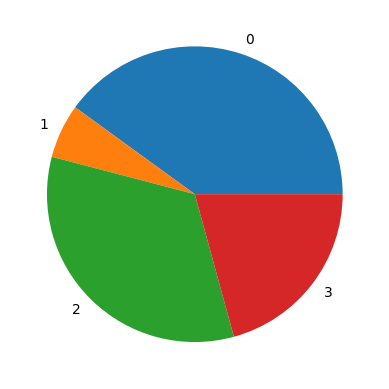

In [255]:
diagram = []
kmeans_clusters = list(kmeans_clusters)

for i in un_clust:
    diagram.append(kmeans_clusters.count(i))

plt.pie(diagram, labels=un_clust)
plt.show()

In [256]:
print("–°–∞–º—ã–µ —á–∞—Å—Ç—ã–µ —Å–ª–æ–≤–∞ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Ç–µ—Ä–∞:")
for i in un_clust:
    print(f"–ö–ª–∞—Å—Ç–µ—Ä {i}, —Å–∞–º—ã–µ —á–∞—Å—Ç—ã–µ —Å–ª–æ–≤–∞: {top_words[i]}.")

–°–∞–º—ã–µ —á–∞—Å—Ç—ã–µ —Å–ª–æ–≤–∞ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Ç–µ—Ä–∞:
–ö–ª–∞—Å—Ç–µ—Ä 0, —Å–∞–º—ã–µ —á–∞—Å—Ç—ã–µ —Å–ª–æ–≤–∞: ['–∞–Ω–≥–ª–∏–π—Å–∫–∏–π', '–ø—Ä–∞–∫—Ç–∏–∫–∞', '—Å–∏–ª—å–Ω—ã–π', '—Å–ª–æ–∂–Ω–æ', '—è–∑—ã–∫', '–∏—Å—Ç–æ—Ä–∏—è', '—É—á–∏—Ç–µ–ª—å', '–∑–∞–∫–æ–Ω—á–∏—Ç—å', '–Ω–∞–∑–∞–¥', '—Å–≤–æ–π'].
–ö–ª–∞—Å—Ç–µ—Ä 1, —Å–∞–º—ã–µ —á–∞—Å—Ç—ã–µ —Å–ª–æ–≤–∞: ['–≤–∏–¥–µ—Ç—å', '–ø–ª–æ—Ö–æ–π', '–∑–∞–æ—á–Ω—ã–π', '—Å—Ç—É–¥–µ–Ω—Ç', '—Å–º–µ–Ω–∏—Ç—å—Å—è', '–¥–æ—à–∫–æ–ª—å–Ω—ã–π', '–æ–±—ä—è—Å–Ω—è—Ç—å', '—Å—Ç–æ–∏—Ç—å', '–¥—É–º–∞—Ç—å', '—á–µ–ª–æ–≤–µ–∫'].
–ö–ª–∞—Å—Ç–µ—Ä 2, —Å–∞–º—ã–µ —á–∞—Å—Ç—ã–µ —Å–ª–æ–≤–∞: ['—Ä–∞–∑–Ω—ã–π', '–ø–æ–Ω—Ä–∞–≤–∏—Ç—å—Å—è', '–ø—Ä–æ—Ñ–µ—Å—Å–∏—è', '–∑–∞–≤–∏—Å–µ—Ç—å', '—Å–≤–æ–π', '–¥—É–º–∞—Ç—å', '–∫–∞—á–µ—Å—Ç–≤–æ', '—É—á–µ–±–∞', '–Ω–∞–∑–∞–¥', '–ø–ª–æ—Ö–æ–π'].
–ö–ª–∞—Å—Ç–µ—Ä 3, —Å–∞–º—ã–µ —á–∞—Å—Ç—ã–µ —Å–ª–æ–≤–∞: ['—É—á–µ–±–∞', '–ø—Ä–µ–¥–º–µ—Ç', '–∑–∞—á–µ—Ç', '–∏–¥—Ç–∏', '—è–∑—ã–∫', '–Ω–∞—à', '—ç–∫–∑–∞–º–µ–Ω', '–∑–∞–≤–∏—Å–µ—Ç—å', '—Ä–µ–∫–æ–º–µ–Ω–¥–æ–≤–∞—Ç—å', '–∏–Ω–æ—Å—Ç—Ä–∞–Ω–

In [100]:
positive_resp = defaultdict(int)
neutral_resp = defaultdict(int)
negative_resp = defaultdict(int)

dat_to_dat = {"—è–Ω–≤–∞—Ä—è": "01", "—Ñ–µ–≤—Ä–∞–ª—è": "02", "–º–∞—Ä—Ç–∞": "03", "–∞–ø—Ä–µ–ª—è": "04", "–º–∞—è": "05", "–∏—é–Ω—è": "06", "–∏—é–ª—è": "07", "–∞–≤–≥—É—Å—Ç–∞": "08",
              "—Å–µ–Ω—Ç–µ–±—Ä—è": "09", "–æ–∫—Ç—è–±—Ä—è": "10", "–Ω–æ—è–±—Ä—è": "11", "–¥–µ–∫–∞–±—Ä—è": "12"}

resp_count = len(response_dates)

for i in range(resp_count-1, -1, -1):
    date = response_dates[i].split()
    year_month = date[2] + '-' + dat_to_dat[date[1]]
    if int(response_values[i]) > 3:
        positive_resp[year_month] += 1
    elif int(response_values[i]) < 3:
        negative_resp[year_month] += 1
    else:
        neutral_resp[year_month] += 1


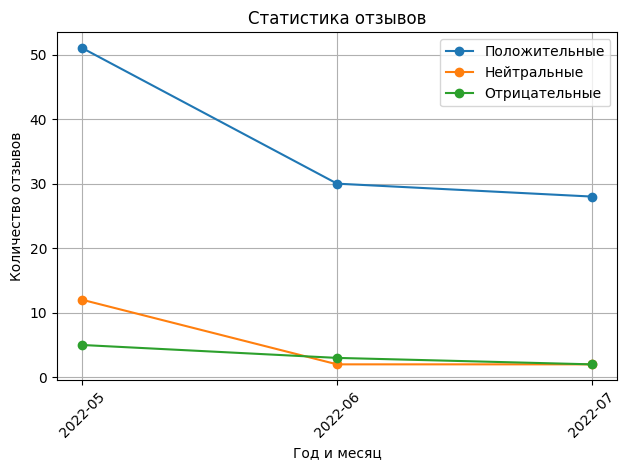

In [101]:
x = list(positive_resp.keys()) 
y_positive = list(positive_resp.values())
y_neutral = [neutral_resp[month] for month in x]
y_negative = [negative_resp[month] for month in x]

plt.plot(x, y_positive, label='–ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ', marker='o')
plt.plot(x, y_neutral, label='–ù–µ–π—Ç—Ä–∞–ª—å–Ω—ã–µ', marker='o')
plt.plot(x, y_negative, label='–û—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–µ', marker='o')

plt.xlabel('–ì–æ–¥ –∏ –º–µ—Å—è—Ü')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤')
plt.title('–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –æ—Ç–∑—ã–≤–æ–≤')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [99]:
positive_resp